In [5]:
import numpy as np
import math

def norm(x):
    return np.sqrt(np.sum(x**2))

def dist(x, y):
    return norm(x-y)

lww = 1

def OGMG(x0, L, N, f, g):
    if N == 0:
        N = 1
    Theta = np.ones(N+1)
    for i in range(N-1,0,-1):
        Theta[i] = (1+np.sqrt(1+4*Theta[i+1]**2))/2
    Theta[0] = (1+np.sqrt(1+8*Theta[1]**2))/2
    
    beta = np.zeros(N)
    gamma = np.zeros(N)
    
    x = np.zeros((N+1, len(x0)))
    y = np.zeros((N+1, len(x0)))
    
    x[0] = x0
    y[0] = x0
    
    for i in range(0,N):
        gamma[i] = (2*Theta[i+1]-1)/(2*Theta[i]-1)
        beta[i] = gamma[i]*(Theta[i]-1)/Theta[i]
        y[i+1] = x[i] - g(x[i])/L
        x[i+1] = y[i+1] + beta[i]*(y[i+1]-y[i]) + gamma[i]*(y[i+1]-x[i])
    return x[-1]

def OGMG_count(x0, L, mu, g, eps):
    x = x0
    G = norm(g(x))
    Nop = 0
    while G > eps:
        N = math.ceil(2*np.sqrt(2*L/mu))
        x_new = OGMG(x, L, N, f, g)
        Nop += N
        x = x_new
        G = norm(g(x))
    return Nop, x

def ACGM(x0, L, mu, g, eps, beta=4):
    x = x0
    G = norm(g(x))
    Nop = 0    
    #plt.scatter(x[0], x[1], lw=lww, color = 'green')
    plt.scatter(Nop, np.log(norm(x)), lw=lww, color = 'blue', marker='o')
    plt.scatter(Nop, np.log(norm(g(x))), lw=lww, color = 'green', marker='v')
    CH = True
    while G > eps:
        if CH:
            mu *= beta
        else:
            CH = True
        N = math.ceil(2*np.sqrt(2*L/mu))
        x_new = OGMG(x, L, N, f, g)
        Nop += N
        #print('ACGM', Nop, norm(g(x_new)))
        if norm(g(x_new)) <= G*0.5:
            x = x_new
            #plt.scatter(x[0], x[1], lw=lww/2, color = 'green')
            plt.scatter(Nop, np.log(norm(x)), lw=lww, color = 'blue', marker='o')
            plt.scatter(Nop, np.log(norm(g(x))), lw=lww, color = 'green', marker='v')
            G = norm(g(x))
        elif norm(g(x_new)) <= G:
            x = x_new
            #plt.scatter(x[0], x[1], lw=lww, color = 'green')
            plt.scatter(Nop, np.log(norm(x)), lw=lww, color = 'blue', marker='o')
            plt.scatter(Nop, np.log(norm(g(x))), lw=lww, color = 'green', marker='v')
            G = norm(g(x))
            mu /= beta
            CH = False
        else:
            mu /= beta
            #plt.scatter(x_new[0], x_new[1], lw=lww, color = 'red')
            plt.scatter(Nop, np.log(norm(x)), lw=lww, color = 'red', marker='o')
            plt.scatter(Nop, np.log(norm(g(x))), lw=lww, color = 'yellow', marker='v')
            #CH = False
    return Nop, x

In [6]:
coef = np.array([0.1,100])
x0 = np.array([10, 10])
mu = 0.1
L = 30100
def f(x):
    return np.dot(coef, x**2)/2 + np.dot(coef, x**4)/4

def g(x):
    return coef * (x + x**3) 

Text(0, 0.5, '$ln||x||$, $ln||\\nabla f({\\bf x})||$')

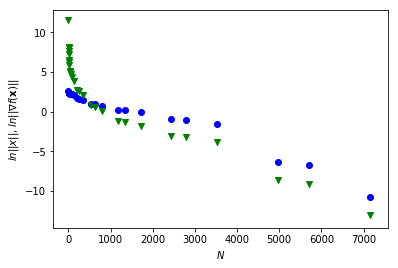

In [7]:
import matplotlib.pylab as plt
%matplotlib inline

x0 = np.array([10,10])
ACGM(x0, L, L, g, norm(g(x0))/(10**10), 4)
plt.xlabel('$N$')
plt.ylabel(r'$ln||x||$, $ln||\nabla f({\bf x})||$')
#plt.xlabel('$x_1$')
#plt.ylabel('$x_2$')

In [43]:
x0 = np.arange(1,11)
L = 1000
mu = 1
GF_E = np.arange(1,12)
BETA = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
adapt_beta = np.zeros((len(BETA),len(GF_E)))
for i in range(0, len(BETA)):
    for j in range(0, len(GF_E)):
        adapt_beta[i][j] = np.int(ACGM(x0, L, mu, g, norm(g(x0))/(10**GF_E[j]), BETA[i])[0])
print(adapt_beta)

[[ 64. 109. 109. 141. 164. 344. 453. 562. 671. 671. 671.]
 [ 52.  82.  82. 100. 226. 390. 554. 718. 882. 882. 882.]
 [ 45.  68.  80.  86. 265. 265. 400. 535. 535. 535. 535.]
 [ 40.  58.  66.  70. 232. 272. 362. 492. 532. 622. 622.]
 [ 37.  52.  59.  64. 216. 253. 343. 470. 597. 597. 597.]
 [ 34.  47.  52.  57. 199. 323. 323. 447. 571. 571. 571.]
 [ 32.  44.  48.  53. 191. 313. 313. 435. 557. 557. 557.]
 [ 30.  40.  44.  49. 183. 303. 303. 423. 543. 543. 543.]
 [ 29.  38.  42.  49. 177. 296. 325. 415. 534. 534. 534.]
 [ 27.  36.  40.  47. 173. 290. 317. 407. 524. 524. 524.]
 [ 26.  34.  38.  45. 169. 285. 311. 401. 517. 517. 517.]
 [ 25.  32.  37.  72. 194. 309. 334. 424. 539. 539. 539.]
 [ 24.  31.  36.  70. 191. 305. 329. 419. 533. 533. 533.]
 [ 24.  30.  35.  68. 188. 302. 326. 416. 530. 530. 530.]
 [ 23.  29.  34.  66. 185. 298. 321. 411. 524. 524. 524.]]


In [44]:
x0 = np.arange(1,11)
L = 1000
mu = 1000
GF_E = np.arange(1,12)
BETA = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
adapt_beta = np.zeros((len(BETA),len(GF_E)))
for i in range(0, len(BETA)):
    for j in range(0, len(GF_E)):
        adapt_beta[i][j] = np.int(ACGM(x0, L, mu, g, norm(g(x0))/(10**GF_E[j]), BETA[i])[0])
print(adapt_beta)

[[  4.  10.  33. 104. 285. 395. 505. 615. 725. 725. 725.]
 [  5.  11.  33. 107. 270. 315. 392. 514. 514. 559. 559.]
 [  5.  11.  41.  82. 254. 300. 391. 528. 574. 665. 574.]
 [  5.  11.  31. 100. 218. 321. 424. 527. 630. 630. 630.]
 [  5.  11.  31.  79. 299. 341. 485. 587. 731. 731. 731.]
 [  5.  11.  33.  81. 235. 381. 527. 693. 892. 892. 892.]
 [  6.  10.  33.  64. 174. 325. 412. 586. 673. 673. 673.]
 [  6.  10.  35.  61. 173. 276. 302. 379. 482. 482. 482.]
 [  6.  10.  35.  64. 192. 311. 311. 430. 549. 549. 549.]
 [  6.  10.  27.  69. 215. 351. 487. 623. 759. 759. 759.]
 [  6.  10.  27.  71. 233. 385. 537. 689. 841. 841. 841.]
 [  6.  10.  25.  76. 257. 427. 464. 597. 767. 767. 767.]
 [  6.  10.  25.  79. 330. 330. 519. 519. 708. 708. 708.]
 [  6.  10.  25.  82. 355. 355. 563. 563. 771. 771. 771.]
 [  6.  10.  26.  87. 203. 385. 613. 659. 841. 841. 841.]]


In [46]:
x0 = np.ones(10)*10
L = 1000
mu = 1
GF_E = np.arange(1,12)
BETA = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
adapt_beta = np.zeros((len(BETA),len(GF_E)))
for i in range(0, len(BETA)):
    for j in range(0, len(GF_E)):
        adapt_beta[i][j] = np.int(ACGM(x0, L, mu, g, norm(g(x0))/(10**GF_E[j]), BETA[i])[0])
print(adapt_beta)

[[  64.  109.  109.  141.  305.  414.  523.  632.  741.  786.  786.]
 [  52.   82.   82.  210.  374.  538.  702.  866.  978. 1030. 1030.]
 [  45.   68.   80.  256.  256.  391.  526.  526.  661.  661.  661.]
 [  40.   58.   66.  226.  266.  356.  486.  526.  616.  616.  616.]
 [  37.   52.   59.  211.  248.  338.  465.  592.  592.  592.  592.]
 [  34.   47.   52.  196.  320.  320.  444.  568.  602.  692.  602.]
 [  32.   44.   48.  188.  310.  310.  432.  554.  586.  676.  676.]
 [  30.   40.   44.  180.  300.  300.  420.  540.  660.  660.  660.]
 [  29.   38.   42.  173.  292.  292.  411.  530.  649.  649.  649.]
 [  27.   36.   40.  169.  286.  313.  403.  520.  637.  637.  637.]
 [  26.   34.   38.  165.  281.  307.  397.  513.  629.  629.  629.]
 [  25.   32.   37.  159.  274.  299.  389.  504.  619.  619.  619.]
 [  24.   31.   36.  157.  271.  385.  385.  499.  613.  613.  613.]
 [  24.   30.   41.  155.  269.  383.  383.  497.  611.  611.  611.]
 [  23.   29.   40.  153.  266.  3

In [152]:
x0 = np.array([10,10])#np.arange(1,11)
L = 1000
MU = 10.0**(np.arange(0,13)-2)
GF_E = np.arange(1,11)
simple = np.zeros((13,10))
adapt = np.zeros((13,10))
for i in range(0, 13):
    for j in range(0, 10):
        simple[i][j] = OGMG_count(x0, L, MU[i], g, norm(g(x0))/(10**GF_E[j]))[0]
        adapt[i][j] = ACGM(x0, L, MU[i], g, norm(g(x0))/(10**GF_E[j]))[0]
        print(i,j)

ValueError: operands could not be broadcast together with shapes (2,) (10,) 

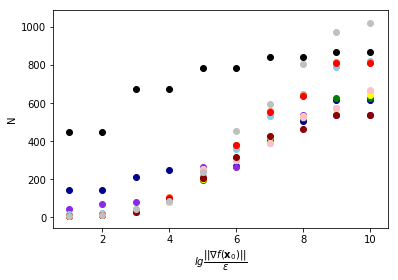

In [14]:
import matplotlib.pylab as plt
%matplotlib inline


for k in range(0, 10):
    plt.scatter(GF_E[k], adapt[0][k], lw=1, color = 'black')
    plt.scatter(GF_E[k], adapt[1][k], lw=1, color = 'darkblue')
    plt.scatter(GF_E[k], adapt[2][k], lw=1, color = 'blueviolet')
    plt.scatter(GF_E[k], adapt[3][k], lw=1, color = 'skyblue')
    plt.scatter(GF_E[k], adapt[4][k], lw=1, color = 'green')
    plt.scatter(GF_E[k], adapt[5][k], lw=1, color = 'lightgreen')
    plt.scatter(GF_E[k], adapt[6][k], lw=1, color = 'coral')
    plt.scatter(GF_E[k], adapt[7][k], lw=1, color = 'yellow')
    plt.scatter(GF_E[k], adapt[8][k], lw=1, color = 'pink')
    plt.scatter(GF_E[k], adapt[9][k], lw=1, color = 'red')
    plt.scatter(GF_E[k], adapt[10][k], lw=1, color = 'darkred')
    plt.scatter(GF_E[k], adapt[11][k], lw=1, color = 'silver')
    plt.xlabel(r'$lg\dfrac{||\nabla f({\bf x}_0)||}{\varepsilon}$')
    plt.ylabel('N')

In [17]:
print(adapt)

[[ 448.  448.  672.  672.  784.  784.  840.  840.  868.  868.]
 [ 142.  142.  213.  249.  249.  267.  401.  508.  615.  615.]
 [  45.   68.   80.   86.  265.  265.  400.  535.  535.  535.]
 [  15.   23.   29.   88.  218.  361.  533.  648.  791.  820.]
 [   8.   11.   30.   89.  197.  305.  413.  521.  629.  629.]
 [   5.   11.   41.   82.  254.  300.  391.  528.  574.  665.]
 [   4.   13.   39.  106.  208.  382.  556.  643.  817.  817.]
 [   4.   10.   28.   91.  201.  311.  421.  531.  568.  641.]
 [   4.   12.   39.   80.  253.  299.  391.  529.  575.  667.]
 [   4.   11.   35.  102.  204.  378.  552.  639.  813.  813.]
 [   4.   12.   30.   93.  204.  315.  426.  463.  537.  537.]
 [   4.   11.   44.   86.  240.  453.  595.  808.  974. 1021.]
 [   4.   11.   40.  108.  212.  390.  509.  657.  776.  835.]]


In [65]:
mu = 1
L = 1000
coef = np.array([1,100])
def f(x):
    return np.dot(coef, x**2)/2 + np.dot(coef, x**4)/4

def g(x):
    return coef * (x + x**3) 

x0 = np.array([10, 10])
GF_E = np.arange(1,12)
BETA = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
adapt_beta = np.zeros((len(BETA),len(GF_E)))
theorem = np.zeros((len(BETA),len(GF_E)))
for i in range(0, len(BETA)):
    for j in range(0, len(GF_E)):
        adapt_beta[i][j] = ACGM(x0, L, mu, g, norm(g(x0))/(10**GF_E[j]), BETA[i])[0]
        theorem[i][j] = np.sqrt(8)*BETA[i]/(np.sqrt(BETA[i]) - 1) * GF_E[j] * np.log2(10) * np.sqrt(L/mu)
        #print(i, j)
np.max(adapt_beta/theorem)

0.09453703868384408

2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10


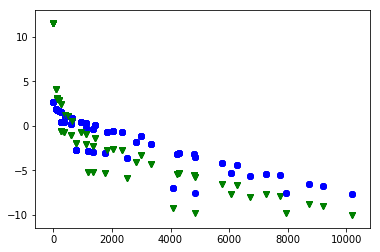

In [12]:
coef = np.array([0.1,100])
x0 = np.array([10, 10])
mu = 0.1
L = 30100
def f(x):
    return np.dot(coef, x**2)/2 + np.dot(coef, x**4)/4

def g(x):
    return coef * (x + x**3) 

GF_E = np.arange(1,12)
BETA = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
MU_0 = np.array([0.1, 1, 10])#, 100, 1000, 10000, 30100, 100000])
adapt_beta = np.zeros((len(BETA),len(GF_E),len(MU_0)))
simple = np.zeros((len(BETA),len(GF_E),len(MU_0)))
theorem = np.zeros((len(BETA),len(GF_E),len(MU_0)))
#for i in range(0, len(BETA)):
i = 2
for j in range(0, len(GF_E)):
    for m in range(0, len(MU_0)):
        adapt_beta[i][j][m] = int(ACGM(x0, L, MU_0[m], g, norm(g(x0))/(10**GF_E[j]), BETA[i])[0])
        simple[i][j][m] = int(OGMG_count(x0, L, MU_0[m], g, norm(g(x0))/(10**GF_E[j]))[0])
            #theorem[i][j][m] = int(np.sqrt(8)*BETA[i]/(np.sqrt(BETA[i]) - 1) * GF_E[j] * np.log2(10) * np.sqrt(L/mu))
    print(i, j)
#np.max(adapt_beta/theorem)

Text(0, 0.5, 'N')

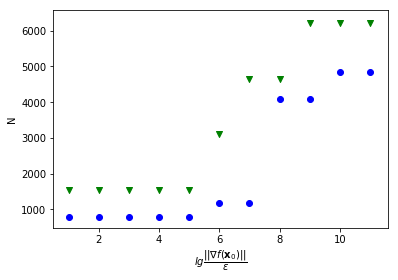

In [17]:
for k in range(0, len(GF_E)):
    plt.scatter(GF_E[k], adapt_beta[2][k][0], lw=1, color = 'blue', marker='o')
    plt.scatter(GF_E[k], simple[2][k][0], lw=1, color = 'green', marker='v')
plt.xlabel(r'$lg\dfrac{||\nabla f({\bf x}_0)||}{\varepsilon}$')
plt.ylabel('N')

Text(0,0.5,'N')

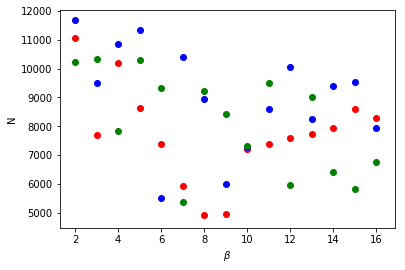

In [101]:
for i in range(0, len(BETA)):
    plt.scatter(BETA[i], adapt_beta[i][9][1], lw=1, color = 'red')
    plt.scatter(BETA[i], adapt_beta[i][9][4], lw=1, color = 'blue')
    plt.scatter(BETA[i], adapt_beta[i][9][7], lw=1, color = 'green')
plt.xlabel(r'$\beta$')
plt.ylabel('N')

In [107]:
np.log10(100)

2.0

Text(0, 0.5, 'N')

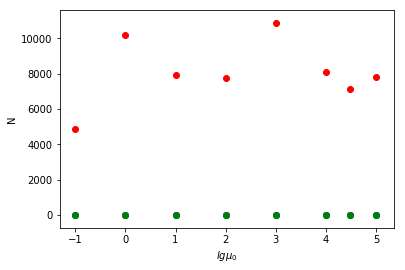

In [9]:
for i in range(0, len(MU_0)):
    plt.scatter(np.log10(MU_0[i]), adapt_beta[2][9][i], lw=1, color = 'red')
    plt.scatter(np.log10(MU_0[i]), adapt_beta[6][9][i], lw=1, color = 'blue')
    plt.scatter(np.log10(MU_0[i]), adapt_beta[14][9][i], lw=1, color = 'green')
plt.xlabel(r'$lg\mu_0$')
plt.ylabel('N')

In [168]:
simple[0]

array([[1.5520e+03, 4.9100e+02, 1.5600e+02, 5.0000e+01, 1.6000e+01,
        5.0000e+00, 3.0000e+00, 2.0000e+00],
       [1.5520e+03, 4.9100e+02, 1.5600e+02, 5.0000e+01, 1.6000e+01,
        5.0000e+00, 3.0000e+00, 1.4000e+01],
       [1.5520e+03, 4.9100e+02, 1.5600e+02, 5.0000e+01, 1.6000e+01,
        5.5000e+01, 1.0800e+02, 1.3400e+02],
       [1.5520e+03, 4.9100e+02, 3.1200e+02, 4.0000e+02, 1.0080e+03,
        2.1200e+03, 2.6880e+03, 3.1060e+03],
       [1.5520e+03, 4.9100e+02, 4.6800e+02, 2.2500e+03, 5.7920e+03,
        1.2300e+04, 1.5582e+04, 1.8000e+04],
       [3.1040e+03, 9.8200e+02, 3.7440e+03, 1.1900e+04, 3.0864e+04,
        6.5575e+04, 8.3082e+04, 9.5976e+04],
       [4.6560e+03, 9.8200e+02, 1.6380e+04, 4.8700e+04, 1.2600e+05,
        2.6760e+05, 3.3904e+05, 3.9166e+05],
       [4.6560e+03, 3.4370e+03, 3.3228e+04, 9.7150e+04, 2.5118e+05,
        5.3350e+05, 6.7591e+05, 7.8081e+05],
       [6.2080e+03, 8.3470e+03, 5.0076e+04, 1.4585e+05, 3.7718e+05,
        8.0108e+05, 1.0149e+

In [193]:
def ALGM(x0, L, mu, g, eps, beta=2.25, gamma=2.25):
    x = x0
    G = norm(g(x))
    Nop = 0    
    #plt.scatter(x[0], x[1], lw=lww, color = 'blue')
    #plt.scatter(Nop, np.log(norm(x)), lw=lww, color = 'blue')
    #plt.scatter(Nop, np.log(norm(g(x))), lw=lww, color = 'green')
    CHL = True
    while G > eps:      
        if CHL:
            L /= gamma
        else:
            CHL = True
        N = math.ceil(2*np.sqrt(2*L/mu))
        x_new = OGMG(x, L, N, f, g)
        Nop += N
        print(Nop, N, L, mu, norm(g(x_new)), 'L')
        if norm(g(x_new)) >= G*0.8:
            L *= gamma
            CHL = False
            continue
        Gm = G
        x = x_new
        G = norm(g(x_new))
        CHmu = True
        while G > Gm/2:
            if CHmu:
                mu *= beta
            else:
                CHmu = True
            N = math.ceil(2*np.sqrt(2*L/mu))
            x_new = OGMG(x, L, N, f, g)
            Nop += N
            print(Nop, N, L, mu, norm(g(x_new)), 'mu')
            if norm(g(x_new) > Gm):
                mu /= beta
                CHmu = False
            elif norm(g(x_new) > Gm/2):
                x = x_new
                Gm = norm(g(x))
                mu /= beta
                CHmu = False
            else:
                x = x_new
                Gm = norm(g(x))
    return Nop, x

In [195]:
x0 = np.array([10,10])
L = 1
mu = 1
eps = norm(g(x0))/10**10
ALGM(x0, L, mu, g, eps)

2 2 0.4444444444444444 1 1.4470263765139793e+60 L
5 3 1.0 1 inf L
10 5 2.25 1 inf L
17 7 5.0625 1 nan L


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in power
  if __name__ == '__main__':
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in subtract


(17, array([-inf,  nan]))

In [22]:
def UGM(x0, L, f, g, eps, delta, cut=100, beta=4):
    x = x0
    Nop_ = 0   
    plt.scatter(x[0], x[1], lw=lww, color = 'blue')
    #plt.scatter(Nop_, np.log(norm(x)), lw=lww, color = 'blue')
    #plt.scatter(Nop_, np.log(norm(g(x))), lw=lww, color = 'green')
    G = norm(g(x))
    CHL = True
    while G > eps:
        if CHL:
            L /= 2
        else:
            CHL = True
        gx = g(x)
        Nop_ += 1
        x_try = x - gx/L
        if f(x_try) <= f(x) + np.dot(gx, x_try - x) + L*np.sum((x_try-x)**2)/2 + delta:
            print('U', Nop_, L, norm(gx))
            N, x = ACGM(x, L*2, L*2, g, G/cut)
            plt.scatter(x[0], x[1], lw=lww, color = 'blue')
            Nop_ += N
            #plt.scatter(Nop_, np.log(norm(x)), lw=lww, color = 'blue')
            #plt.scatter(Nop_, np.log(norm(g(x))), lw=lww, color = 'green')
            G = norm(g(x))
            #x = x_try
            continue
        else:
            CHL = False
            L *= 2        
    return Nop_, x

Text(0.5,0,'N')

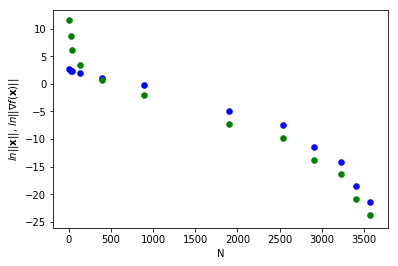

In [78]:
import matplotlib.pylab as plt
%matplotlib inline
x0 = np.array([10, 10])
L = 1
lww = 0.5
#print(norm(g(x0)))
eps = norm(g(x0))/(10**15)
delta = eps/2
aa = UGM(x0, L, f, g, eps, delta, 10)
#plt.xlabel('$x_1$')
#plt.ylabel('$x_2$')
#plt.xlabel(r'$lg\dfrac{||\nabla f({\bf x}_0)||}{\varepsilon}$')
#plt.ylabel('N')
plt.ylabel(r'$ln ||{\bf x}||$, $ln ||\nabla f({\bf x})||$')
plt.xlabel('N')

In [93]:
LL = [1, 100, 1000, 100000]
GF_E = np.arange(1,16)
results = np.zeros((len(LL), len(GF_E)))

In [190]:
def OGMG(x0, L, N, f, g):
def ACGM(x0, L, mu, g, eps, beta=4):

2.3333

In [119]:
LL = [30100, 100, 1000, 100000]
GF_E = np.arange(1,12)
results = np.zeros(len(GF_E))
acgm = np.zeros(len(GF_E))
#for i in range(0, len(LL)):
i = 0
for j in range(0, len(GF_E)):
    results [j] = UGM(x0, LL[i], f, g, norm(g(x0))/(10**GF_E[j]), norm(g(x0))/(10**GF_E[j])/2, 10)[0]
    acgm [j] = ACGM(x0, LL[i], LL[i], g, norm(g(x0))/(10**GF_E[j]))[0]
    print (j, results[j])

0 7.0
1 24.0
2 89.0
3 342.0
4 845.0
5 1847.0
6 1847.0
7 1847.0
8 1847.0
9 2486.0
10 2486.0


Text(0,0.5,'N')

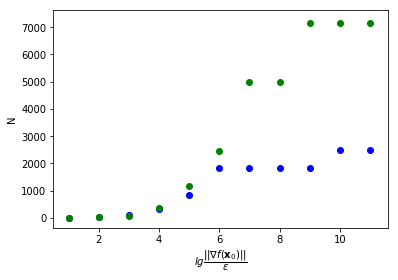

In [120]:
for k in range(0, len(GF_E)):
    plt.scatter(GF_E[k], results[k], lw=1, color = 'blue')
    plt.scatter(GF_E[k], acgm[k], lw=1, color = 'green')
    #plt.scatter(GF_E[k], results[2][k], lw=1, color = 'blue')
    #plt.scatter(GF_E[k], results[3][k], lw=1, color = 'green')
plt.xlabel(r'$lg\dfrac{||\nabla f({\bf x}_0)||}{\varepsilon}$')
plt.ylabel('N')

U 2 30100.0 101000.00000019802
ACGM 2 20452.28905739604
ACGM 3 15637.103642384722
ACGM 5 9591.604579747593
U 8 15050.0 9591.604579747593
ACGM 2 4804.685743172641
ACGM 5 2357.882026485891
ACGM 7 1794.967915353796
ACGM 10 1230.1928313374508
ACGM 16 587.1810285673712
U 25 7525.0 587.1810285673712
ACGM 2 478.5326308936591
ACGM 5 355.7226403370852
ACGM 11 192.71118059549605
ACGM 23 64.65676266138986
ACGM 29 53.043083893410675
U 55 3762.5 53.043083893410675
ACGM 2 49.22382714401207
ACGM 5 43.50335519163484
ACGM 11 31.574485376107408
ACGM 23 12.528893626004187
ACGM 29 9.80069231202043
ACGM 41 4.3197943818031135
U 97 1881.25 4.3197943818031135
ACGM 2 3.9211883207319627
ACGM 5 3.3119529797334915
ACGM 11 2.025492750522998
ACGM 23 0.33209542984537194
U 121 940.625 0.33209542984537194
ACGM 2 0.29445913169758725
ACGM 5 0.2495770893144791
ACGM 11 0.2018062159396861
ACGM 23 0.19292653035895865
ACGM 46 0.18632461503882278
ACGM 92 0.16537308707303208
ACGM 183 0.11296454696400711
ACGM 365 0.040636474569

ACGM 3490 2.404085039581302e-07
ACGM 3502 2.404085039581302e-07
ACGM 3514 2.404085039581302e-07
ACGM 3526 2.404085039581302e-07
ACGM 3538 2.404085039581302e-07
ACGM 3550 2.404085039581302e-07
ACGM 3562 2.404085039581302e-07
ACGM 3574 2.404085039581302e-07
ACGM 3586 2.404085039581302e-07
ACGM 3598 2.404085039581302e-07
ACGM 3610 2.404085039581302e-07
ACGM 3622 2.404085039581302e-07
ACGM 3634 2.404085039581302e-07
ACGM 3646 2.404085039581302e-07
ACGM 3658 2.404085039581302e-07
ACGM 3670 2.404085039581302e-07
ACGM 3682 2.404085039581302e-07
ACGM 3694 2.404085039581302e-07
ACGM 3706 2.404085039581302e-07
ACGM 3718 2.404085039581302e-07
ACGM 3730 2.404085039581302e-07
ACGM 3742 2.404085039581302e-07
ACGM 3754 2.404085039581302e-07
ACGM 3766 2.404085039581302e-07
ACGM 3778 2.404085039581302e-07
ACGM 3790 2.404085039581302e-07
ACGM 3802 2.404085039581302e-07
ACGM 3814 2.404085039581302e-07
ACGM 3826 2.404085039581302e-07
ACGM 3838 2.404085039581302e-07
ACGM 3850 2.404085039581302e-07
ACGM 386

ACGM 7978 2.404085039581302e-07
ACGM 7990 2.404085039581302e-07
ACGM 8002 2.404085039581302e-07
ACGM 8014 2.404085039581302e-07
ACGM 8026 2.404085039581302e-07
ACGM 8038 2.404085039581302e-07
ACGM 8050 2.404085039581302e-07
ACGM 8062 2.404085039581302e-07
ACGM 8074 2.404085039581302e-07
ACGM 8086 2.404085039581302e-07
ACGM 8098 2.404085039581302e-07
ACGM 8110 2.404085039581302e-07
ACGM 8122 2.404085039581302e-07
ACGM 8134 2.404085039581302e-07
ACGM 8146 2.404085039581302e-07
ACGM 8158 2.404085039581302e-07
ACGM 8170 2.404085039581302e-07
ACGM 8182 2.404085039581302e-07
ACGM 8194 2.404085039581302e-07
ACGM 8206 2.404085039581302e-07
ACGM 8218 2.404085039581302e-07
ACGM 8230 2.404085039581302e-07
ACGM 8242 2.404085039581302e-07
ACGM 8254 2.404085039581302e-07
ACGM 8266 2.404085039581302e-07
ACGM 8278 2.404085039581302e-07
ACGM 8290 2.404085039581302e-07
ACGM 8302 2.404085039581302e-07
ACGM 8314 2.404085039581302e-07
ACGM 8326 2.404085039581302e-07
ACGM 8338 2.404085039581302e-07
ACGM 835

ACGM 11974 2.404085039581302e-07
ACGM 11986 2.404085039581302e-07
ACGM 11998 2.404085039581302e-07
ACGM 12010 2.404085039581302e-07
ACGM 12022 2.404085039581302e-07
ACGM 12034 2.404085039581302e-07
ACGM 12046 2.404085039581302e-07
ACGM 12058 2.404085039581302e-07
ACGM 12070 2.404085039581302e-07
ACGM 12082 2.404085039581302e-07
ACGM 12094 2.404085039581302e-07
ACGM 12106 2.404085039581302e-07
ACGM 12118 2.404085039581302e-07
ACGM 12130 2.404085039581302e-07
ACGM 12142 2.404085039581302e-07
ACGM 12154 2.404085039581302e-07
ACGM 12166 2.404085039581302e-07
ACGM 12178 2.404085039581302e-07
ACGM 12190 2.404085039581302e-07
ACGM 12202 2.404085039581302e-07
ACGM 12214 2.404085039581302e-07
ACGM 12226 2.404085039581302e-07
ACGM 12238 2.404085039581302e-07
ACGM 12250 2.404085039581302e-07
ACGM 12262 2.404085039581302e-07
ACGM 12274 2.404085039581302e-07
ACGM 12286 2.404085039581302e-07
ACGM 12298 2.404085039581302e-07
ACGM 12310 2.404085039581302e-07
ACGM 12322 2.404085039581302e-07
ACGM 12334

ACGM 15970 2.404085039581302e-07
ACGM 15982 2.404085039581302e-07
ACGM 15994 2.404085039581302e-07
ACGM 16006 2.404085039581302e-07
ACGM 16018 2.404085039581302e-07
ACGM 16030 2.404085039581302e-07
ACGM 16042 2.404085039581302e-07
ACGM 16054 2.404085039581302e-07
ACGM 16066 2.404085039581302e-07
ACGM 16078 2.404085039581302e-07
ACGM 16090 2.404085039581302e-07
ACGM 16102 2.404085039581302e-07
ACGM 16114 2.404085039581302e-07
ACGM 16126 2.404085039581302e-07
ACGM 16138 2.404085039581302e-07
ACGM 16150 2.404085039581302e-07
ACGM 16162 2.404085039581302e-07
ACGM 16174 2.404085039581302e-07
ACGM 16186 2.404085039581302e-07
ACGM 16198 2.404085039581302e-07
ACGM 16210 2.404085039581302e-07
ACGM 16222 2.404085039581302e-07
ACGM 16234 2.404085039581302e-07
ACGM 16246 2.404085039581302e-07
ACGM 16258 2.404085039581302e-07
ACGM 16270 2.404085039581302e-07
ACGM 16282 2.404085039581302e-07
ACGM 16294 2.404085039581302e-07
ACGM 16306 2.404085039581302e-07
ACGM 16318 2.404085039581302e-07
ACGM 16330

ACGM 19966 2.404085039581302e-07
ACGM 19978 2.404085039581302e-07
ACGM 19990 2.404085039581302e-07
ACGM 20002 2.404085039581302e-07
ACGM 20014 2.404085039581302e-07
ACGM 20026 2.404085039581302e-07
ACGM 20038 2.404085039581302e-07
ACGM 20050 2.404085039581302e-07
ACGM 20062 2.404085039581302e-07
ACGM 20074 2.404085039581302e-07
ACGM 20086 2.404085039581302e-07
ACGM 20098 2.404085039581302e-07
ACGM 20110 2.404085039581302e-07
ACGM 20122 2.404085039581302e-07
ACGM 20134 2.404085039581302e-07
ACGM 20146 2.404085039581302e-07
ACGM 20158 2.404085039581302e-07
ACGM 20170 2.404085039581302e-07
ACGM 20182 2.404085039581302e-07
ACGM 20194 2.404085039581302e-07
ACGM 20206 2.404085039581302e-07
ACGM 20218 2.404085039581302e-07
ACGM 20230 2.404085039581302e-07
ACGM 20242 2.404085039581302e-07
ACGM 20254 2.404085039581302e-07
ACGM 20266 2.404085039581302e-07
ACGM 20278 2.404085039581302e-07
ACGM 20290 2.404085039581302e-07
ACGM 20302 2.404085039581302e-07
ACGM 20314 2.404085039581302e-07
ACGM 20326

ACGM 23962 2.404085039581302e-07
ACGM 23974 2.404085039581302e-07
ACGM 23986 2.404085039581302e-07
ACGM 23998 2.404085039581302e-07
ACGM 24010 2.404085039581302e-07
ACGM 24022 2.404085039581302e-07
ACGM 24034 2.404085039581302e-07
ACGM 24046 2.404085039581302e-07
ACGM 24058 2.404085039581302e-07
ACGM 24070 2.404085039581302e-07
ACGM 24082 2.404085039581302e-07
ACGM 24094 2.404085039581302e-07
ACGM 24106 2.404085039581302e-07
ACGM 24118 2.404085039581302e-07
ACGM 24130 2.404085039581302e-07
ACGM 24142 2.404085039581302e-07
ACGM 24154 2.404085039581302e-07
ACGM 24166 2.404085039581302e-07
ACGM 24178 2.404085039581302e-07
ACGM 24190 2.404085039581302e-07
ACGM 24202 2.404085039581302e-07
ACGM 24214 2.404085039581302e-07
ACGM 24226 2.404085039581302e-07
ACGM 24238 2.404085039581302e-07
ACGM 24250 2.404085039581302e-07
ACGM 24262 2.404085039581302e-07
ACGM 24274 2.404085039581302e-07
ACGM 24286 2.404085039581302e-07
ACGM 24298 2.404085039581302e-07
ACGM 24310 2.404085039581302e-07
ACGM 24322

ACGM 27958 2.404085039581302e-07
ACGM 27970 2.404085039581302e-07
ACGM 27982 2.404085039581302e-07
ACGM 27994 2.404085039581302e-07
ACGM 28006 2.404085039581302e-07
ACGM 28018 2.404085039581302e-07
ACGM 28030 2.404085039581302e-07
ACGM 28042 2.404085039581302e-07
ACGM 28054 2.404085039581302e-07
ACGM 28066 2.404085039581302e-07
ACGM 28078 2.404085039581302e-07
ACGM 28090 2.404085039581302e-07
ACGM 28102 2.404085039581302e-07
ACGM 28114 2.404085039581302e-07
ACGM 28126 2.404085039581302e-07
ACGM 28138 2.404085039581302e-07
ACGM 28150 2.404085039581302e-07
ACGM 28162 2.404085039581302e-07
ACGM 28174 2.404085039581302e-07
ACGM 28186 2.404085039581302e-07
ACGM 28198 2.404085039581302e-07
ACGM 28210 2.404085039581302e-07
ACGM 28222 2.404085039581302e-07
ACGM 28234 2.404085039581302e-07
ACGM 28246 2.404085039581302e-07
ACGM 28258 2.404085039581302e-07
ACGM 28270 2.404085039581302e-07
ACGM 28282 2.404085039581302e-07
ACGM 28294 2.404085039581302e-07
ACGM 28306 2.404085039581302e-07
ACGM 28318

ACGM 31954 2.404085039581302e-07
ACGM 31966 2.404085039581302e-07
ACGM 31978 2.404085039581302e-07
ACGM 31990 2.404085039581302e-07
ACGM 32002 2.404085039581302e-07
ACGM 32014 2.404085039581302e-07
ACGM 32026 2.404085039581302e-07
ACGM 32038 2.404085039581302e-07
ACGM 32050 2.404085039581302e-07
ACGM 32062 2.404085039581302e-07
ACGM 32074 2.404085039581302e-07
ACGM 32086 2.404085039581302e-07
ACGM 32098 2.404085039581302e-07
ACGM 32110 2.404085039581302e-07
ACGM 32122 2.404085039581302e-07
ACGM 32134 2.404085039581302e-07
ACGM 32146 2.404085039581302e-07
ACGM 32158 2.404085039581302e-07
ACGM 32170 2.404085039581302e-07
ACGM 32182 2.404085039581302e-07
ACGM 32194 2.404085039581302e-07
ACGM 32206 2.404085039581302e-07
ACGM 32218 2.404085039581302e-07
ACGM 32230 2.404085039581302e-07
ACGM 32242 2.404085039581302e-07
ACGM 32254 2.404085039581302e-07
ACGM 32266 2.404085039581302e-07
ACGM 32278 2.404085039581302e-07
ACGM 32290 2.404085039581302e-07
ACGM 32302 2.404085039581302e-07
ACGM 32314

ACGM 35950 2.404085039581302e-07
ACGM 35962 2.404085039581302e-07
ACGM 35974 2.404085039581302e-07
ACGM 35986 2.404085039581302e-07
ACGM 35998 2.404085039581302e-07
ACGM 36010 2.404085039581302e-07
ACGM 36022 2.404085039581302e-07
ACGM 36034 2.404085039581302e-07
ACGM 36046 2.404085039581302e-07
ACGM 36058 2.404085039581302e-07
ACGM 36070 2.404085039581302e-07
ACGM 36082 2.404085039581302e-07
ACGM 36094 2.404085039581302e-07
ACGM 36106 2.404085039581302e-07
ACGM 36118 2.404085039581302e-07
ACGM 36130 2.404085039581302e-07
ACGM 36142 2.404085039581302e-07
ACGM 36154 2.404085039581302e-07
ACGM 36166 2.404085039581302e-07
ACGM 36178 2.404085039581302e-07
ACGM 36190 2.404085039581302e-07
ACGM 36202 2.404085039581302e-07
ACGM 36214 2.404085039581302e-07
ACGM 36226 2.404085039581302e-07
ACGM 36238 2.404085039581302e-07
ACGM 36250 2.404085039581302e-07
ACGM 36262 2.404085039581302e-07
ACGM 36274 2.404085039581302e-07
ACGM 36286 2.404085039581302e-07
ACGM 36298 2.404085039581302e-07
ACGM 36310

ACGM 39946 2.404085039581302e-07
ACGM 39958 2.404085039581302e-07
ACGM 39970 2.404085039581302e-07
ACGM 39982 2.404085039581302e-07
ACGM 39994 2.404085039581302e-07
ACGM 40006 2.404085039581302e-07
ACGM 40018 2.404085039581302e-07
ACGM 40030 2.404085039581302e-07
ACGM 40042 2.404085039581302e-07
ACGM 40054 2.404085039581302e-07
ACGM 40066 2.404085039581302e-07
ACGM 40078 2.404085039581302e-07
ACGM 40090 2.404085039581302e-07
ACGM 40102 2.404085039581302e-07
ACGM 40114 2.404085039581302e-07
ACGM 40126 2.404085039581302e-07
ACGM 40138 2.404085039581302e-07
ACGM 40150 2.404085039581302e-07
ACGM 40162 2.404085039581302e-07
ACGM 40174 2.404085039581302e-07
ACGM 40186 2.404085039581302e-07
ACGM 40198 2.404085039581302e-07
ACGM 40210 2.404085039581302e-07
ACGM 40222 2.404085039581302e-07
ACGM 40234 2.404085039581302e-07
ACGM 40246 2.404085039581302e-07
ACGM 40258 2.404085039581302e-07
ACGM 40270 2.404085039581302e-07
ACGM 40282 2.404085039581302e-07
ACGM 40294 2.404085039581302e-07
ACGM 40306

ACGM 43942 2.404085039581302e-07
ACGM 43954 2.404085039581302e-07
ACGM 43966 2.404085039581302e-07
ACGM 43978 2.404085039581302e-07
ACGM 43990 2.404085039581302e-07
ACGM 44002 2.404085039581302e-07
ACGM 44014 2.404085039581302e-07
ACGM 44026 2.404085039581302e-07
ACGM 44038 2.404085039581302e-07
ACGM 44050 2.404085039581302e-07
ACGM 44062 2.404085039581302e-07
ACGM 44074 2.404085039581302e-07
ACGM 44086 2.404085039581302e-07
ACGM 44098 2.404085039581302e-07
ACGM 44110 2.404085039581302e-07
ACGM 44122 2.404085039581302e-07
ACGM 44134 2.404085039581302e-07
ACGM 44146 2.404085039581302e-07
ACGM 44158 2.404085039581302e-07
ACGM 44170 2.404085039581302e-07
ACGM 44182 2.404085039581302e-07
ACGM 44194 2.404085039581302e-07
ACGM 44206 2.404085039581302e-07
ACGM 44218 2.404085039581302e-07
ACGM 44230 2.404085039581302e-07
ACGM 44242 2.404085039581302e-07
ACGM 44254 2.404085039581302e-07
ACGM 44266 2.404085039581302e-07
ACGM 44278 2.404085039581302e-07
ACGM 44290 2.404085039581302e-07
ACGM 44302

ACGM 47938 2.404085039581302e-07
ACGM 47950 2.404085039581302e-07
ACGM 47962 2.404085039581302e-07
ACGM 47974 2.404085039581302e-07
ACGM 47986 2.404085039581302e-07
ACGM 47998 2.404085039581302e-07
ACGM 48010 2.404085039581302e-07
ACGM 48022 2.404085039581302e-07
ACGM 48034 2.404085039581302e-07
ACGM 48046 2.404085039581302e-07
ACGM 48058 2.404085039581302e-07
ACGM 48070 2.404085039581302e-07
ACGM 48082 2.404085039581302e-07
ACGM 48094 2.404085039581302e-07
ACGM 48106 2.404085039581302e-07
ACGM 48118 2.404085039581302e-07
ACGM 48130 2.404085039581302e-07
ACGM 48142 2.404085039581302e-07
ACGM 48154 2.404085039581302e-07
ACGM 48166 2.404085039581302e-07
ACGM 48178 2.404085039581302e-07
ACGM 48190 2.404085039581302e-07
ACGM 48202 2.404085039581302e-07
ACGM 48214 2.404085039581302e-07
ACGM 48226 2.404085039581302e-07
ACGM 48238 2.404085039581302e-07
ACGM 48250 2.404085039581302e-07
ACGM 48262 2.404085039581302e-07
ACGM 48274 2.404085039581302e-07
ACGM 48286 2.404085039581302e-07
ACGM 48298

ACGM 51934 2.404085039581302e-07
ACGM 51946 2.404085039581302e-07
ACGM 51958 2.404085039581302e-07
ACGM 51970 2.404085039581302e-07
ACGM 51982 2.404085039581302e-07
ACGM 51994 2.404085039581302e-07
ACGM 52006 2.404085039581302e-07
ACGM 52018 2.404085039581302e-07
ACGM 52030 2.404085039581302e-07
ACGM 52042 2.404085039581302e-07
ACGM 52054 2.404085039581302e-07
ACGM 52066 2.404085039581302e-07
ACGM 52078 2.404085039581302e-07
ACGM 52090 2.404085039581302e-07
ACGM 52102 2.404085039581302e-07
ACGM 52114 2.404085039581302e-07
ACGM 52126 2.404085039581302e-07
ACGM 52138 2.404085039581302e-07
ACGM 52150 2.404085039581302e-07
ACGM 52162 2.404085039581302e-07
ACGM 52174 2.404085039581302e-07
ACGM 52186 2.404085039581302e-07
ACGM 52198 2.404085039581302e-07
ACGM 52210 2.404085039581302e-07
ACGM 52222 2.404085039581302e-07
ACGM 52234 2.404085039581302e-07
ACGM 52246 2.404085039581302e-07
ACGM 52258 2.404085039581302e-07
ACGM 52270 2.404085039581302e-07
ACGM 52282 2.404085039581302e-07
ACGM 52294

ACGM 55930 2.404085039581302e-07
ACGM 55942 2.404085039581302e-07
ACGM 55954 2.404085039581302e-07
ACGM 55966 2.404085039581302e-07
ACGM 55978 2.404085039581302e-07
ACGM 55990 2.404085039581302e-07
ACGM 56002 2.404085039581302e-07
ACGM 56014 2.404085039581302e-07
ACGM 56026 2.404085039581302e-07
ACGM 56038 2.404085039581302e-07
ACGM 56050 2.404085039581302e-07
ACGM 56062 2.404085039581302e-07
ACGM 56074 2.404085039581302e-07
ACGM 56086 2.404085039581302e-07
ACGM 56098 2.404085039581302e-07
ACGM 56110 2.404085039581302e-07
ACGM 56122 2.404085039581302e-07
ACGM 56134 2.404085039581302e-07
ACGM 56146 2.404085039581302e-07
ACGM 56158 2.404085039581302e-07
ACGM 56170 2.404085039581302e-07
ACGM 56182 2.404085039581302e-07
ACGM 56194 2.404085039581302e-07
ACGM 56206 2.404085039581302e-07
ACGM 56218 2.404085039581302e-07
ACGM 56230 2.404085039581302e-07
ACGM 56242 2.404085039581302e-07
ACGM 56254 2.404085039581302e-07
ACGM 56266 2.404085039581302e-07
ACGM 56278 2.404085039581302e-07
ACGM 56290

ACGM 59926 2.404085039581302e-07
ACGM 59938 2.404085039581302e-07
ACGM 59950 2.404085039581302e-07
ACGM 59962 2.404085039581302e-07
ACGM 59974 2.404085039581302e-07
ACGM 59986 2.404085039581302e-07
ACGM 59998 2.404085039581302e-07
ACGM 60010 2.404085039581302e-07
ACGM 60022 2.404085039581302e-07
ACGM 60034 2.404085039581302e-07
ACGM 60046 2.404085039581302e-07
ACGM 60058 2.404085039581302e-07
ACGM 60070 2.404085039581302e-07
ACGM 60082 2.404085039581302e-07
ACGM 60094 2.404085039581302e-07
ACGM 60106 2.404085039581302e-07
ACGM 60118 2.404085039581302e-07
ACGM 60130 2.404085039581302e-07
ACGM 60142 2.404085039581302e-07
ACGM 60154 2.404085039581302e-07
ACGM 60166 2.404085039581302e-07
ACGM 60178 2.404085039581302e-07
ACGM 60190 2.404085039581302e-07
ACGM 60202 2.404085039581302e-07
ACGM 60214 2.404085039581302e-07
ACGM 60226 2.404085039581302e-07
ACGM 60238 2.404085039581302e-07
ACGM 60250 2.404085039581302e-07
ACGM 60262 2.404085039581302e-07
ACGM 60274 2.404085039581302e-07
ACGM 60286

ACGM 63802 2.404085039581302e-07
ACGM 63814 2.404085039581302e-07
ACGM 63826 2.404085039581302e-07
ACGM 63838 2.404085039581302e-07
ACGM 63850 2.404085039581302e-07
ACGM 63862 2.404085039581302e-07
ACGM 63874 2.404085039581302e-07
ACGM 63886 2.404085039581302e-07
ACGM 63898 2.404085039581302e-07
ACGM 63910 2.404085039581302e-07
ACGM 63922 2.404085039581302e-07
ACGM 63934 2.404085039581302e-07
ACGM 63946 2.404085039581302e-07
ACGM 63958 2.404085039581302e-07
ACGM 63970 2.404085039581302e-07
ACGM 63982 2.404085039581302e-07
ACGM 63994 2.404085039581302e-07
ACGM 64006 2.404085039581302e-07
ACGM 64018 2.404085039581302e-07
ACGM 64030 2.404085039581302e-07
ACGM 64042 2.404085039581302e-07
ACGM 64054 2.404085039581302e-07
ACGM 64066 2.404085039581302e-07
ACGM 64078 2.404085039581302e-07
ACGM 64090 2.404085039581302e-07
ACGM 64102 2.404085039581302e-07
ACGM 64114 2.404085039581302e-07
ACGM 64126 2.404085039581302e-07
ACGM 64138 2.404085039581302e-07
ACGM 64150 2.404085039581302e-07
ACGM 64162

ACGM 67906 2.404085039581302e-07
ACGM 67918 2.404085039581302e-07
ACGM 67930 2.404085039581302e-07
ACGM 67942 2.404085039581302e-07
ACGM 67954 2.404085039581302e-07
ACGM 67966 2.404085039581302e-07
ACGM 67978 2.404085039581302e-07
ACGM 67990 2.404085039581302e-07
ACGM 68002 2.404085039581302e-07
ACGM 68014 2.404085039581302e-07
ACGM 68026 2.404085039581302e-07
ACGM 68038 2.404085039581302e-07
ACGM 68050 2.404085039581302e-07
ACGM 68062 2.404085039581302e-07
ACGM 68074 2.404085039581302e-07
ACGM 68086 2.404085039581302e-07
ACGM 68098 2.404085039581302e-07
ACGM 68110 2.404085039581302e-07
ACGM 68122 2.404085039581302e-07
ACGM 68134 2.404085039581302e-07
ACGM 68146 2.404085039581302e-07
ACGM 68158 2.404085039581302e-07
ACGM 68170 2.404085039581302e-07
ACGM 68182 2.404085039581302e-07
ACGM 68194 2.404085039581302e-07
ACGM 68206 2.404085039581302e-07
ACGM 68218 2.404085039581302e-07
ACGM 68230 2.404085039581302e-07
ACGM 68242 2.404085039581302e-07
ACGM 68254 2.404085039581302e-07
ACGM 68266

ACGM 71902 2.404085039581302e-07
ACGM 71914 2.404085039581302e-07
ACGM 71926 2.404085039581302e-07
ACGM 71938 2.404085039581302e-07
ACGM 71950 2.404085039581302e-07
ACGM 71962 2.404085039581302e-07
ACGM 71974 2.404085039581302e-07
ACGM 71986 2.404085039581302e-07
ACGM 71998 2.404085039581302e-07
ACGM 72010 2.404085039581302e-07
ACGM 72022 2.404085039581302e-07
ACGM 72034 2.404085039581302e-07
ACGM 72046 2.404085039581302e-07
ACGM 72058 2.404085039581302e-07
ACGM 72070 2.404085039581302e-07
ACGM 72082 2.404085039581302e-07
ACGM 72094 2.404085039581302e-07
ACGM 72106 2.404085039581302e-07
ACGM 72118 2.404085039581302e-07
ACGM 72130 2.404085039581302e-07
ACGM 72142 2.404085039581302e-07
ACGM 72154 2.404085039581302e-07
ACGM 72166 2.404085039581302e-07
ACGM 72178 2.404085039581302e-07
ACGM 72190 2.404085039581302e-07
ACGM 72202 2.404085039581302e-07
ACGM 72214 2.404085039581302e-07
ACGM 72226 2.404085039581302e-07
ACGM 72238 2.404085039581302e-07
ACGM 72250 2.404085039581302e-07
ACGM 72262

ACGM 75898 2.404085039581302e-07
ACGM 75910 2.404085039581302e-07
ACGM 75922 2.404085039581302e-07
ACGM 75934 2.404085039581302e-07
ACGM 75946 2.404085039581302e-07
ACGM 75958 2.404085039581302e-07
ACGM 75970 2.404085039581302e-07
ACGM 75982 2.404085039581302e-07
ACGM 75994 2.404085039581302e-07
ACGM 76006 2.404085039581302e-07
ACGM 76018 2.404085039581302e-07
ACGM 76030 2.404085039581302e-07
ACGM 76042 2.404085039581302e-07
ACGM 76054 2.404085039581302e-07
ACGM 76066 2.404085039581302e-07
ACGM 76078 2.404085039581302e-07
ACGM 76090 2.404085039581302e-07
ACGM 76102 2.404085039581302e-07
ACGM 76114 2.404085039581302e-07
ACGM 76126 2.404085039581302e-07
ACGM 76138 2.404085039581302e-07
ACGM 76150 2.404085039581302e-07
ACGM 76162 2.404085039581302e-07
ACGM 76174 2.404085039581302e-07
ACGM 76186 2.404085039581302e-07
ACGM 76198 2.404085039581302e-07
ACGM 76210 2.404085039581302e-07
ACGM 76222 2.404085039581302e-07
ACGM 76234 2.404085039581302e-07
ACGM 76246 2.404085039581302e-07
ACGM 76258

ACGM 79894 2.404085039581302e-07
ACGM 79906 2.404085039581302e-07
ACGM 79918 2.404085039581302e-07
ACGM 79930 2.404085039581302e-07
ACGM 79942 2.404085039581302e-07
ACGM 79954 2.404085039581302e-07
ACGM 79966 2.404085039581302e-07
ACGM 79978 2.404085039581302e-07
ACGM 79990 2.404085039581302e-07
ACGM 80002 2.404085039581302e-07
ACGM 80014 2.404085039581302e-07
ACGM 80026 2.404085039581302e-07
ACGM 80038 2.404085039581302e-07
ACGM 80050 2.404085039581302e-07
ACGM 80062 2.404085039581302e-07
ACGM 80074 2.404085039581302e-07
ACGM 80086 2.404085039581302e-07
ACGM 80098 2.404085039581302e-07
ACGM 80110 2.404085039581302e-07
ACGM 80122 2.404085039581302e-07
ACGM 80134 2.404085039581302e-07
ACGM 80146 2.404085039581302e-07
ACGM 80158 2.404085039581302e-07
ACGM 80170 2.404085039581302e-07
ACGM 80182 2.404085039581302e-07
ACGM 80194 2.404085039581302e-07
ACGM 80206 2.404085039581302e-07
ACGM 80218 2.404085039581302e-07
ACGM 80230 2.404085039581302e-07
ACGM 80242 2.404085039581302e-07
ACGM 80254

ACGM 83890 2.404085039581302e-07
ACGM 83902 2.404085039581302e-07
ACGM 83914 2.404085039581302e-07
ACGM 83926 2.404085039581302e-07
ACGM 83938 2.404085039581302e-07
ACGM 83950 2.404085039581302e-07
ACGM 83962 2.404085039581302e-07
ACGM 83974 2.404085039581302e-07
ACGM 83986 2.404085039581302e-07
ACGM 83998 2.404085039581302e-07
ACGM 84010 2.404085039581302e-07
ACGM 84022 2.404085039581302e-07
ACGM 84034 2.404085039581302e-07
ACGM 84046 2.404085039581302e-07
ACGM 84058 2.404085039581302e-07
ACGM 84070 2.404085039581302e-07
ACGM 84082 2.404085039581302e-07
ACGM 84094 2.404085039581302e-07
ACGM 84106 2.404085039581302e-07
ACGM 84118 2.404085039581302e-07
ACGM 84130 2.404085039581302e-07
ACGM 84142 2.404085039581302e-07
ACGM 84154 2.404085039581302e-07
ACGM 84166 2.404085039581302e-07
ACGM 84178 2.404085039581302e-07
ACGM 84190 2.404085039581302e-07
ACGM 84202 2.404085039581302e-07
ACGM 84214 2.404085039581302e-07
ACGM 84226 2.404085039581302e-07
ACGM 84238 2.404085039581302e-07
ACGM 84250

ACGM 87886 2.404085039581302e-07
ACGM 87898 2.404085039581302e-07
ACGM 87910 2.404085039581302e-07
ACGM 87922 2.404085039581302e-07
ACGM 87934 2.404085039581302e-07
ACGM 87946 2.404085039581302e-07
ACGM 87958 2.404085039581302e-07
ACGM 87970 2.404085039581302e-07
ACGM 87982 2.404085039581302e-07
ACGM 87994 2.404085039581302e-07
ACGM 88006 2.404085039581302e-07
ACGM 88018 2.404085039581302e-07
ACGM 88030 2.404085039581302e-07
ACGM 88042 2.404085039581302e-07
ACGM 88054 2.404085039581302e-07
ACGM 88066 2.404085039581302e-07
ACGM 88078 2.404085039581302e-07
ACGM 88090 2.404085039581302e-07
ACGM 88102 2.404085039581302e-07
ACGM 88114 2.404085039581302e-07
ACGM 88126 2.404085039581302e-07
ACGM 88138 2.404085039581302e-07
ACGM 88150 2.404085039581302e-07
ACGM 88162 2.404085039581302e-07
ACGM 88174 2.404085039581302e-07
ACGM 88186 2.404085039581302e-07
ACGM 88198 2.404085039581302e-07
ACGM 88210 2.404085039581302e-07
ACGM 88222 2.404085039581302e-07
ACGM 88234 2.404085039581302e-07
ACGM 88246

ACGM 91882 2.404085039581302e-07
ACGM 91894 2.404085039581302e-07
ACGM 91906 2.404085039581302e-07
ACGM 91918 2.404085039581302e-07
ACGM 91930 2.404085039581302e-07
ACGM 91942 2.404085039581302e-07
ACGM 91954 2.404085039581302e-07
ACGM 91966 2.404085039581302e-07
ACGM 91978 2.404085039581302e-07
ACGM 91990 2.404085039581302e-07
ACGM 92002 2.404085039581302e-07
ACGM 92014 2.404085039581302e-07
ACGM 92026 2.404085039581302e-07
ACGM 92038 2.404085039581302e-07
ACGM 92050 2.404085039581302e-07
ACGM 92062 2.404085039581302e-07
ACGM 92074 2.404085039581302e-07
ACGM 92086 2.404085039581302e-07
ACGM 92098 2.404085039581302e-07
ACGM 92110 2.404085039581302e-07
ACGM 92122 2.404085039581302e-07
ACGM 92134 2.404085039581302e-07
ACGM 92146 2.404085039581302e-07
ACGM 92158 2.404085039581302e-07
ACGM 92170 2.404085039581302e-07
ACGM 92182 2.404085039581302e-07
ACGM 92194 2.404085039581302e-07
ACGM 92206 2.404085039581302e-07
ACGM 92218 2.404085039581302e-07
ACGM 92230 2.404085039581302e-07
ACGM 92242

ACGM 95878 2.404085039581302e-07
ACGM 95890 2.404085039581302e-07
ACGM 95902 2.404085039581302e-07
ACGM 95914 2.404085039581302e-07
ACGM 95926 2.404085039581302e-07
ACGM 95938 2.404085039581302e-07
ACGM 95950 2.404085039581302e-07
ACGM 95962 2.404085039581302e-07
ACGM 95974 2.404085039581302e-07
ACGM 95986 2.404085039581302e-07
ACGM 95998 2.404085039581302e-07
ACGM 96010 2.404085039581302e-07
ACGM 96022 2.404085039581302e-07
ACGM 96034 2.404085039581302e-07
ACGM 96046 2.404085039581302e-07
ACGM 96058 2.404085039581302e-07
ACGM 96070 2.404085039581302e-07
ACGM 96082 2.404085039581302e-07
ACGM 96094 2.404085039581302e-07
ACGM 96106 2.404085039581302e-07
ACGM 96118 2.404085039581302e-07
ACGM 96130 2.404085039581302e-07
ACGM 96142 2.404085039581302e-07
ACGM 96154 2.404085039581302e-07
ACGM 96166 2.404085039581302e-07
ACGM 96178 2.404085039581302e-07
ACGM 96190 2.404085039581302e-07
ACGM 96202 2.404085039581302e-07
ACGM 96214 2.404085039581302e-07
ACGM 96226 2.404085039581302e-07
ACGM 96238

ACGM 99874 2.404085039581302e-07
ACGM 99886 2.404085039581302e-07
ACGM 99898 2.404085039581302e-07
ACGM 99910 2.404085039581302e-07
ACGM 99922 2.404085039581302e-07
ACGM 99934 2.404085039581302e-07
ACGM 99946 2.404085039581302e-07
ACGM 99958 2.404085039581302e-07
ACGM 99970 2.404085039581302e-07
ACGM 99982 2.404085039581302e-07
ACGM 99994 2.404085039581302e-07
ACGM 100006 2.404085039581302e-07
ACGM 100018 2.404085039581302e-07
ACGM 100030 2.404085039581302e-07
ACGM 100042 2.404085039581302e-07
ACGM 100054 2.404085039581302e-07
ACGM 100066 2.404085039581302e-07
ACGM 100078 2.404085039581302e-07
ACGM 100090 2.404085039581302e-07
ACGM 100102 2.404085039581302e-07
ACGM 100114 2.404085039581302e-07
ACGM 100126 2.404085039581302e-07
ACGM 100138 2.404085039581302e-07
ACGM 100150 2.404085039581302e-07
ACGM 100162 2.404085039581302e-07
ACGM 100174 2.404085039581302e-07
ACGM 100186 2.404085039581302e-07
ACGM 100198 2.404085039581302e-07
ACGM 100210 2.404085039581302e-07
ACGM 100222 2.40408503958

ACGM 103870 2.404085039581302e-07
ACGM 103882 2.404085039581302e-07
ACGM 103894 2.404085039581302e-07
ACGM 103906 2.404085039581302e-07
ACGM 103918 2.404085039581302e-07
ACGM 103930 2.404085039581302e-07
ACGM 103942 2.404085039581302e-07
ACGM 103954 2.404085039581302e-07
ACGM 103966 2.404085039581302e-07
ACGM 103978 2.404085039581302e-07
ACGM 103990 2.404085039581302e-07
ACGM 104002 2.404085039581302e-07
ACGM 104014 2.404085039581302e-07
ACGM 104026 2.404085039581302e-07
ACGM 104038 2.404085039581302e-07
ACGM 104050 2.404085039581302e-07
ACGM 104062 2.404085039581302e-07
ACGM 104074 2.404085039581302e-07
ACGM 104086 2.404085039581302e-07
ACGM 104098 2.404085039581302e-07
ACGM 104110 2.404085039581302e-07
ACGM 104122 2.404085039581302e-07
ACGM 104134 2.404085039581302e-07
ACGM 104146 2.404085039581302e-07
ACGM 104158 2.404085039581302e-07
ACGM 104170 2.404085039581302e-07
ACGM 104182 2.404085039581302e-07
ACGM 104194 2.404085039581302e-07
ACGM 104206 2.404085039581302e-07
ACGM 104218 2.

ACGM 107866 2.404085039581302e-07
ACGM 107878 2.404085039581302e-07
ACGM 107890 2.404085039581302e-07
ACGM 107902 2.404085039581302e-07
ACGM 107914 2.404085039581302e-07
ACGM 107926 2.404085039581302e-07
ACGM 107938 2.404085039581302e-07
ACGM 107950 2.404085039581302e-07
ACGM 107962 2.404085039581302e-07
ACGM 107974 2.404085039581302e-07
ACGM 107986 2.404085039581302e-07
ACGM 107998 2.404085039581302e-07
ACGM 108010 2.404085039581302e-07
ACGM 108022 2.404085039581302e-07
ACGM 108034 2.404085039581302e-07
ACGM 108046 2.404085039581302e-07
ACGM 108058 2.404085039581302e-07
ACGM 108070 2.404085039581302e-07
ACGM 108082 2.404085039581302e-07
ACGM 108094 2.404085039581302e-07
ACGM 108106 2.404085039581302e-07
ACGM 108118 2.404085039581302e-07
ACGM 108130 2.404085039581302e-07
ACGM 108142 2.404085039581302e-07
ACGM 108154 2.404085039581302e-07
ACGM 108166 2.404085039581302e-07
ACGM 108178 2.404085039581302e-07
ACGM 108190 2.404085039581302e-07
ACGM 108202 2.404085039581302e-07
ACGM 108214 2.

ACGM 111862 2.404085039581302e-07
ACGM 111874 2.404085039581302e-07
ACGM 111886 2.404085039581302e-07
ACGM 111898 2.404085039581302e-07
ACGM 111910 2.404085039581302e-07
ACGM 111922 2.404085039581302e-07
ACGM 111934 2.404085039581302e-07
ACGM 111946 2.404085039581302e-07
ACGM 111958 2.404085039581302e-07
ACGM 111970 2.404085039581302e-07
ACGM 111982 2.404085039581302e-07
ACGM 111994 2.404085039581302e-07
ACGM 112006 2.404085039581302e-07
ACGM 112018 2.404085039581302e-07
ACGM 112030 2.404085039581302e-07
ACGM 112042 2.404085039581302e-07
ACGM 112054 2.404085039581302e-07
ACGM 112066 2.404085039581302e-07
ACGM 112078 2.404085039581302e-07
ACGM 112090 2.404085039581302e-07
ACGM 112102 2.404085039581302e-07
ACGM 112114 2.404085039581302e-07
ACGM 112126 2.404085039581302e-07
ACGM 112138 2.404085039581302e-07
ACGM 112150 2.404085039581302e-07
ACGM 112162 2.404085039581302e-07
ACGM 112174 2.404085039581302e-07
ACGM 112186 2.404085039581302e-07
ACGM 112198 2.404085039581302e-07
ACGM 112210 2.

ACGM 115858 2.404085039581302e-07
ACGM 115870 2.404085039581302e-07
ACGM 115882 2.404085039581302e-07
ACGM 115894 2.404085039581302e-07
ACGM 115906 2.404085039581302e-07
ACGM 115918 2.404085039581302e-07
ACGM 115930 2.404085039581302e-07
ACGM 115942 2.404085039581302e-07
ACGM 115954 2.404085039581302e-07
ACGM 115966 2.404085039581302e-07
ACGM 115978 2.404085039581302e-07
ACGM 115990 2.404085039581302e-07
ACGM 116002 2.404085039581302e-07
ACGM 116014 2.404085039581302e-07
ACGM 116026 2.404085039581302e-07
ACGM 116038 2.404085039581302e-07
ACGM 116050 2.404085039581302e-07
ACGM 116062 2.404085039581302e-07
ACGM 116074 2.404085039581302e-07
ACGM 116086 2.404085039581302e-07
ACGM 116098 2.404085039581302e-07
ACGM 116110 2.404085039581302e-07
ACGM 116122 2.404085039581302e-07
ACGM 116134 2.404085039581302e-07
ACGM 116146 2.404085039581302e-07
ACGM 116158 2.404085039581302e-07
ACGM 116170 2.404085039581302e-07
ACGM 116182 2.404085039581302e-07
ACGM 116194 2.404085039581302e-07
ACGM 116206 2.

ACGM 119854 2.404085039581302e-07
ACGM 119866 2.404085039581302e-07
ACGM 119878 2.404085039581302e-07
ACGM 119890 2.404085039581302e-07
ACGM 119902 2.404085039581302e-07
ACGM 119914 2.404085039581302e-07
ACGM 119926 2.404085039581302e-07
ACGM 119938 2.404085039581302e-07
ACGM 119950 2.404085039581302e-07
ACGM 119962 2.404085039581302e-07
ACGM 119974 2.404085039581302e-07
ACGM 119986 2.404085039581302e-07
ACGM 119998 2.404085039581302e-07
ACGM 120010 2.404085039581302e-07
ACGM 120022 2.404085039581302e-07
ACGM 120034 2.404085039581302e-07
ACGM 120046 2.404085039581302e-07
ACGM 120058 2.404085039581302e-07
ACGM 120070 2.404085039581302e-07
ACGM 120082 2.404085039581302e-07
ACGM 120094 2.404085039581302e-07
ACGM 120106 2.404085039581302e-07
ACGM 120118 2.404085039581302e-07
ACGM 120130 2.404085039581302e-07
ACGM 120142 2.404085039581302e-07
ACGM 120154 2.404085039581302e-07
ACGM 120166 2.404085039581302e-07
ACGM 120178 2.404085039581302e-07
ACGM 120190 2.404085039581302e-07
ACGM 120202 2.

ACGM 123850 2.404085039581302e-07
ACGM 123862 2.404085039581302e-07
ACGM 123874 2.404085039581302e-07
ACGM 123886 2.404085039581302e-07
ACGM 123898 2.404085039581302e-07
ACGM 123910 2.404085039581302e-07
ACGM 123922 2.404085039581302e-07
ACGM 123934 2.404085039581302e-07
ACGM 123946 2.404085039581302e-07
ACGM 123958 2.404085039581302e-07
ACGM 123970 2.404085039581302e-07
ACGM 123982 2.404085039581302e-07
ACGM 123994 2.404085039581302e-07
ACGM 124006 2.404085039581302e-07
ACGM 124018 2.404085039581302e-07
ACGM 124030 2.404085039581302e-07
ACGM 124042 2.404085039581302e-07
ACGM 124054 2.404085039581302e-07
ACGM 124066 2.404085039581302e-07
ACGM 124078 2.404085039581302e-07
ACGM 124090 2.404085039581302e-07
ACGM 124102 2.404085039581302e-07
ACGM 124114 2.404085039581302e-07
ACGM 124126 2.404085039581302e-07
ACGM 124138 2.404085039581302e-07
ACGM 124150 2.404085039581302e-07
ACGM 124162 2.404085039581302e-07
ACGM 124174 2.404085039581302e-07
ACGM 124186 2.404085039581302e-07
ACGM 124198 2.

ACGM 127846 2.404085039581302e-07
ACGM 127858 2.404085039581302e-07
ACGM 127870 2.404085039581302e-07
ACGM 127882 2.404085039581302e-07
ACGM 127894 2.404085039581302e-07
ACGM 127906 2.404085039581302e-07
ACGM 127918 2.404085039581302e-07
ACGM 127930 2.404085039581302e-07
ACGM 127942 2.404085039581302e-07
ACGM 127954 2.404085039581302e-07
ACGM 127966 2.404085039581302e-07
ACGM 127978 2.404085039581302e-07
ACGM 127990 2.404085039581302e-07
ACGM 128002 2.404085039581302e-07
ACGM 128014 2.404085039581302e-07
ACGM 128026 2.404085039581302e-07
ACGM 128038 2.404085039581302e-07
ACGM 128050 2.404085039581302e-07
ACGM 128062 2.404085039581302e-07
ACGM 128074 2.404085039581302e-07
ACGM 128086 2.404085039581302e-07
ACGM 128098 2.404085039581302e-07
ACGM 128110 2.404085039581302e-07
ACGM 128122 2.404085039581302e-07
ACGM 128134 2.404085039581302e-07
ACGM 128146 2.404085039581302e-07
ACGM 128158 2.404085039581302e-07
ACGM 128170 2.404085039581302e-07
ACGM 128182 2.404085039581302e-07
ACGM 128194 2.

ACGM 131842 2.404085039581302e-07
ACGM 131854 2.404085039581302e-07
ACGM 131866 2.404085039581302e-07
ACGM 131878 2.404085039581302e-07
ACGM 131890 2.404085039581302e-07
ACGM 131902 2.404085039581302e-07
ACGM 131914 2.404085039581302e-07
ACGM 131926 2.404085039581302e-07
ACGM 131938 2.404085039581302e-07
ACGM 131950 2.404085039581302e-07
ACGM 131962 2.404085039581302e-07
ACGM 131974 2.404085039581302e-07
ACGM 131986 2.404085039581302e-07
ACGM 131998 2.404085039581302e-07
ACGM 132010 2.404085039581302e-07
ACGM 132022 2.404085039581302e-07
ACGM 132034 2.404085039581302e-07
ACGM 132046 2.404085039581302e-07
ACGM 132058 2.404085039581302e-07
ACGM 132070 2.404085039581302e-07
ACGM 132082 2.404085039581302e-07
ACGM 132094 2.404085039581302e-07
ACGM 132106 2.404085039581302e-07
ACGM 132118 2.404085039581302e-07
ACGM 132130 2.404085039581302e-07
ACGM 132142 2.404085039581302e-07
ACGM 132154 2.404085039581302e-07
ACGM 132166 2.404085039581302e-07
ACGM 132178 2.404085039581302e-07
ACGM 132190 2.

ACGM 135838 2.404085039581302e-07
ACGM 135850 2.404085039581302e-07
ACGM 135862 2.404085039581302e-07
ACGM 135874 2.404085039581302e-07
ACGM 135886 2.404085039581302e-07
ACGM 135898 2.404085039581302e-07
ACGM 135910 2.404085039581302e-07
ACGM 135922 2.404085039581302e-07
ACGM 135934 2.404085039581302e-07
ACGM 135946 2.404085039581302e-07
ACGM 135958 2.404085039581302e-07
ACGM 135970 2.404085039581302e-07
ACGM 135982 2.404085039581302e-07
ACGM 135994 2.404085039581302e-07
ACGM 136006 2.404085039581302e-07
ACGM 136018 2.404085039581302e-07
ACGM 136030 2.404085039581302e-07
ACGM 136042 2.404085039581302e-07
ACGM 136054 2.404085039581302e-07
ACGM 136066 2.404085039581302e-07
ACGM 136078 2.404085039581302e-07
ACGM 136090 2.404085039581302e-07
ACGM 136102 2.404085039581302e-07
ACGM 136114 2.404085039581302e-07
ACGM 136126 2.404085039581302e-07
ACGM 136138 2.404085039581302e-07
ACGM 136150 2.404085039581302e-07
ACGM 136162 2.404085039581302e-07
ACGM 136174 2.404085039581302e-07
ACGM 136186 2.

ACGM 139834 2.404085039581302e-07
ACGM 139846 2.404085039581302e-07
ACGM 139858 2.404085039581302e-07
ACGM 139870 2.404085039581302e-07
ACGM 139882 2.404085039581302e-07
ACGM 139894 2.404085039581302e-07
ACGM 139906 2.404085039581302e-07
ACGM 139918 2.404085039581302e-07
ACGM 139930 2.404085039581302e-07
ACGM 139942 2.404085039581302e-07
ACGM 139954 2.404085039581302e-07
ACGM 139966 2.404085039581302e-07
ACGM 139978 2.404085039581302e-07
ACGM 139990 2.404085039581302e-07
ACGM 140002 2.404085039581302e-07
ACGM 140014 2.404085039581302e-07
ACGM 140026 2.404085039581302e-07
ACGM 140038 2.404085039581302e-07
ACGM 140050 2.404085039581302e-07
ACGM 140062 2.404085039581302e-07
ACGM 140074 2.404085039581302e-07
ACGM 140086 2.404085039581302e-07
ACGM 140098 2.404085039581302e-07
ACGM 140110 2.404085039581302e-07
ACGM 140122 2.404085039581302e-07
ACGM 140134 2.404085039581302e-07
ACGM 140146 2.404085039581302e-07
ACGM 140158 2.404085039581302e-07
ACGM 140170 2.404085039581302e-07
ACGM 140182 2.

ACGM 143830 2.404085039581302e-07
ACGM 143842 2.404085039581302e-07
ACGM 143854 2.404085039581302e-07
ACGM 143866 2.404085039581302e-07
ACGM 143878 2.404085039581302e-07
ACGM 143890 2.404085039581302e-07
ACGM 143902 2.404085039581302e-07
ACGM 143914 2.404085039581302e-07
ACGM 143926 2.404085039581302e-07
ACGM 143938 2.404085039581302e-07
ACGM 143950 2.404085039581302e-07
ACGM 143962 2.404085039581302e-07
ACGM 143974 2.404085039581302e-07
ACGM 143986 2.404085039581302e-07
ACGM 143998 2.404085039581302e-07
ACGM 144010 2.404085039581302e-07
ACGM 144022 2.404085039581302e-07
ACGM 144034 2.404085039581302e-07
ACGM 144046 2.404085039581302e-07
ACGM 144058 2.404085039581302e-07
ACGM 144070 2.404085039581302e-07
ACGM 144082 2.404085039581302e-07
ACGM 144094 2.404085039581302e-07
ACGM 144106 2.404085039581302e-07
ACGM 144118 2.404085039581302e-07
ACGM 144130 2.404085039581302e-07
ACGM 144142 2.404085039581302e-07
ACGM 144154 2.404085039581302e-07
ACGM 144166 2.404085039581302e-07
ACGM 144178 2.

ACGM 147826 2.404085039581302e-07
ACGM 147838 2.404085039581302e-07
ACGM 147850 2.404085039581302e-07
ACGM 147862 2.404085039581302e-07
ACGM 147874 2.404085039581302e-07
ACGM 147886 2.404085039581302e-07
ACGM 147898 2.404085039581302e-07
ACGM 147910 2.404085039581302e-07
ACGM 147922 2.404085039581302e-07
ACGM 147934 2.404085039581302e-07
ACGM 147946 2.404085039581302e-07
ACGM 147958 2.404085039581302e-07
ACGM 147970 2.404085039581302e-07
ACGM 147982 2.404085039581302e-07
ACGM 147994 2.404085039581302e-07
ACGM 148006 2.404085039581302e-07
ACGM 148018 2.404085039581302e-07
ACGM 148030 2.404085039581302e-07
ACGM 148042 2.404085039581302e-07
ACGM 148054 2.404085039581302e-07
ACGM 148066 2.404085039581302e-07
ACGM 148078 2.404085039581302e-07
ACGM 148090 2.404085039581302e-07
ACGM 148102 2.404085039581302e-07
ACGM 148114 2.404085039581302e-07
ACGM 148126 2.404085039581302e-07
ACGM 148138 2.404085039581302e-07
ACGM 148150 2.404085039581302e-07
ACGM 148162 2.404085039581302e-07
ACGM 148174 2.

ACGM 151822 2.404085039581302e-07
ACGM 151834 2.404085039581302e-07
ACGM 151846 2.404085039581302e-07
ACGM 151858 2.404085039581302e-07
ACGM 151870 2.404085039581302e-07
ACGM 151882 2.404085039581302e-07
ACGM 151894 2.404085039581302e-07
ACGM 151906 2.404085039581302e-07
ACGM 151918 2.404085039581302e-07
ACGM 151930 2.404085039581302e-07
ACGM 151942 2.404085039581302e-07
ACGM 151954 2.404085039581302e-07
ACGM 151966 2.404085039581302e-07
ACGM 151978 2.404085039581302e-07
ACGM 151990 2.404085039581302e-07
ACGM 152002 2.404085039581302e-07
ACGM 152014 2.404085039581302e-07
ACGM 152026 2.404085039581302e-07
ACGM 152038 2.404085039581302e-07
ACGM 152050 2.404085039581302e-07
ACGM 152062 2.404085039581302e-07
ACGM 152074 2.404085039581302e-07
ACGM 152086 2.404085039581302e-07
ACGM 152098 2.404085039581302e-07
ACGM 152110 2.404085039581302e-07
ACGM 152122 2.404085039581302e-07
ACGM 152134 2.404085039581302e-07
ACGM 152146 2.404085039581302e-07
ACGM 152158 2.404085039581302e-07
ACGM 152170 2.

ACGM 155818 2.404085039581302e-07
ACGM 155830 2.404085039581302e-07
ACGM 155842 2.404085039581302e-07
ACGM 155854 2.404085039581302e-07
ACGM 155866 2.404085039581302e-07
ACGM 155878 2.404085039581302e-07
ACGM 155890 2.404085039581302e-07
ACGM 155902 2.404085039581302e-07
ACGM 155914 2.404085039581302e-07
ACGM 155926 2.404085039581302e-07
ACGM 155938 2.404085039581302e-07
ACGM 155950 2.404085039581302e-07
ACGM 155962 2.404085039581302e-07
ACGM 155974 2.404085039581302e-07
ACGM 155986 2.404085039581302e-07
ACGM 155998 2.404085039581302e-07
ACGM 156010 2.404085039581302e-07
ACGM 156022 2.404085039581302e-07
ACGM 156034 2.404085039581302e-07
ACGM 156046 2.404085039581302e-07
ACGM 156058 2.404085039581302e-07
ACGM 156070 2.404085039581302e-07
ACGM 156082 2.404085039581302e-07
ACGM 156094 2.404085039581302e-07
ACGM 156106 2.404085039581302e-07
ACGM 156118 2.404085039581302e-07
ACGM 156130 2.404085039581302e-07
ACGM 156142 2.404085039581302e-07
ACGM 156154 2.404085039581302e-07
ACGM 156166 2.

ACGM 159814 2.404085039581302e-07
ACGM 159826 2.404085039581302e-07
ACGM 159838 2.404085039581302e-07
ACGM 159850 2.404085039581302e-07
ACGM 159862 2.404085039581302e-07
ACGM 159874 2.404085039581302e-07
ACGM 159886 2.404085039581302e-07
ACGM 159898 2.404085039581302e-07
ACGM 159910 2.404085039581302e-07
ACGM 159922 2.404085039581302e-07
ACGM 159934 2.404085039581302e-07
ACGM 159946 2.404085039581302e-07
ACGM 159958 2.404085039581302e-07
ACGM 159970 2.404085039581302e-07
ACGM 159982 2.404085039581302e-07
ACGM 159994 2.404085039581302e-07
ACGM 160006 2.404085039581302e-07
ACGM 160018 2.404085039581302e-07
ACGM 160030 2.404085039581302e-07
ACGM 160042 2.404085039581302e-07
ACGM 160054 2.404085039581302e-07
ACGM 160066 2.404085039581302e-07
ACGM 160078 2.404085039581302e-07
ACGM 160090 2.404085039581302e-07
ACGM 160102 2.404085039581302e-07
ACGM 160114 2.404085039581302e-07
ACGM 160126 2.404085039581302e-07
ACGM 160138 2.404085039581302e-07
ACGM 160150 2.404085039581302e-07
ACGM 160162 2.

ACGM 163810 2.404085039581302e-07
ACGM 163822 2.404085039581302e-07
ACGM 163834 2.404085039581302e-07
ACGM 163846 2.404085039581302e-07
ACGM 163858 2.404085039581302e-07
ACGM 163870 2.404085039581302e-07
ACGM 163882 2.404085039581302e-07
ACGM 163894 2.404085039581302e-07
ACGM 163906 2.404085039581302e-07
ACGM 163918 2.404085039581302e-07
ACGM 163930 2.404085039581302e-07
ACGM 163942 2.404085039581302e-07
ACGM 163954 2.404085039581302e-07
ACGM 163966 2.404085039581302e-07
ACGM 163978 2.404085039581302e-07
ACGM 163990 2.404085039581302e-07
ACGM 164002 2.404085039581302e-07
ACGM 164014 2.404085039581302e-07
ACGM 164026 2.404085039581302e-07
ACGM 164038 2.404085039581302e-07
ACGM 164050 2.404085039581302e-07
ACGM 164062 2.404085039581302e-07
ACGM 164074 2.404085039581302e-07
ACGM 164086 2.404085039581302e-07
ACGM 164098 2.404085039581302e-07
ACGM 164110 2.404085039581302e-07
ACGM 164122 2.404085039581302e-07
ACGM 164134 2.404085039581302e-07
ACGM 164146 2.404085039581302e-07
ACGM 164158 2.

ACGM 167806 2.404085039581302e-07
ACGM 167818 2.404085039581302e-07
ACGM 167830 2.404085039581302e-07
ACGM 167842 2.404085039581302e-07
ACGM 167854 2.404085039581302e-07
ACGM 167866 2.404085039581302e-07
ACGM 167878 2.404085039581302e-07
ACGM 167890 2.404085039581302e-07
ACGM 167902 2.404085039581302e-07
ACGM 167914 2.404085039581302e-07
ACGM 167926 2.404085039581302e-07
ACGM 167938 2.404085039581302e-07
ACGM 167950 2.404085039581302e-07
ACGM 167962 2.404085039581302e-07
ACGM 167974 2.404085039581302e-07
ACGM 167986 2.404085039581302e-07
ACGM 167998 2.404085039581302e-07
ACGM 168010 2.404085039581302e-07
ACGM 168022 2.404085039581302e-07
ACGM 168034 2.404085039581302e-07
ACGM 168046 2.404085039581302e-07
ACGM 168058 2.404085039581302e-07
ACGM 168070 2.404085039581302e-07
ACGM 168082 2.404085039581302e-07
ACGM 168094 2.404085039581302e-07
ACGM 168106 2.404085039581302e-07
ACGM 168118 2.404085039581302e-07
ACGM 168130 2.404085039581302e-07
ACGM 168142 2.404085039581302e-07
ACGM 168154 2.

ACGM 171802 2.404085039581302e-07
ACGM 171814 2.404085039581302e-07
ACGM 171826 2.404085039581302e-07
ACGM 171838 2.404085039581302e-07
ACGM 171850 2.404085039581302e-07
ACGM 171862 2.404085039581302e-07
ACGM 171874 2.404085039581302e-07
ACGM 171886 2.404085039581302e-07
ACGM 171898 2.404085039581302e-07
ACGM 171910 2.404085039581302e-07
ACGM 171922 2.404085039581302e-07
ACGM 171934 2.404085039581302e-07
ACGM 171946 2.404085039581302e-07
ACGM 171958 2.404085039581302e-07
ACGM 171970 2.404085039581302e-07
ACGM 171982 2.404085039581302e-07
ACGM 171994 2.404085039581302e-07
ACGM 172006 2.404085039581302e-07
ACGM 172018 2.404085039581302e-07
ACGM 172030 2.404085039581302e-07
ACGM 172042 2.404085039581302e-07
ACGM 172054 2.404085039581302e-07
ACGM 172066 2.404085039581302e-07
ACGM 172078 2.404085039581302e-07
ACGM 172090 2.404085039581302e-07
ACGM 172102 2.404085039581302e-07
ACGM 172114 2.404085039581302e-07
ACGM 172126 2.404085039581302e-07
ACGM 172138 2.404085039581302e-07
ACGM 172150 2.

ACGM 175798 2.404085039581302e-07
ACGM 175810 2.404085039581302e-07
ACGM 175822 2.404085039581302e-07
ACGM 175834 2.404085039581302e-07
ACGM 175846 2.404085039581302e-07
ACGM 175858 2.404085039581302e-07
ACGM 175870 2.404085039581302e-07
ACGM 175882 2.404085039581302e-07
ACGM 175894 2.404085039581302e-07
ACGM 175906 2.404085039581302e-07
ACGM 175918 2.404085039581302e-07
ACGM 175930 2.404085039581302e-07
ACGM 175942 2.404085039581302e-07
ACGM 175954 2.404085039581302e-07
ACGM 175966 2.404085039581302e-07
ACGM 175978 2.404085039581302e-07
ACGM 175990 2.404085039581302e-07
ACGM 176002 2.404085039581302e-07
ACGM 176014 2.404085039581302e-07
ACGM 176026 2.404085039581302e-07
ACGM 176038 2.404085039581302e-07
ACGM 176050 2.404085039581302e-07
ACGM 176062 2.404085039581302e-07
ACGM 176074 2.404085039581302e-07
ACGM 176086 2.404085039581302e-07
ACGM 176098 2.404085039581302e-07
ACGM 176110 2.404085039581302e-07
ACGM 176122 2.404085039581302e-07
ACGM 176134 2.404085039581302e-07
ACGM 176146 2.

ACGM 179794 2.404085039581302e-07
ACGM 179806 2.404085039581302e-07
ACGM 179818 2.404085039581302e-07
ACGM 179830 2.404085039581302e-07
ACGM 179842 2.404085039581302e-07
ACGM 179854 2.404085039581302e-07
ACGM 179866 2.404085039581302e-07
ACGM 179878 2.404085039581302e-07
ACGM 179890 2.404085039581302e-07
ACGM 179902 2.404085039581302e-07
ACGM 179914 2.404085039581302e-07
ACGM 179926 2.404085039581302e-07
ACGM 179938 2.404085039581302e-07
ACGM 179950 2.404085039581302e-07
ACGM 179962 2.404085039581302e-07
ACGM 179974 2.404085039581302e-07
ACGM 179986 2.404085039581302e-07
ACGM 179998 2.404085039581302e-07
ACGM 180010 2.404085039581302e-07
ACGM 180022 2.404085039581302e-07
ACGM 180034 2.404085039581302e-07
ACGM 180046 2.404085039581302e-07
ACGM 180058 2.404085039581302e-07
ACGM 180070 2.404085039581302e-07
ACGM 180082 2.404085039581302e-07
ACGM 180094 2.404085039581302e-07
ACGM 180106 2.404085039581302e-07
ACGM 180118 2.404085039581302e-07
ACGM 180130 2.404085039581302e-07
ACGM 180142 2.

ACGM 183790 2.404085039581302e-07
ACGM 183802 2.404085039581302e-07
ACGM 183814 2.404085039581302e-07
ACGM 183826 2.404085039581302e-07
ACGM 183838 2.404085039581302e-07
ACGM 183850 2.404085039581302e-07
ACGM 183862 2.404085039581302e-07
ACGM 183874 2.404085039581302e-07
ACGM 183886 2.404085039581302e-07
ACGM 183898 2.404085039581302e-07
ACGM 183910 2.404085039581302e-07
ACGM 183922 2.404085039581302e-07
ACGM 183934 2.404085039581302e-07
ACGM 183946 2.404085039581302e-07
ACGM 183958 2.404085039581302e-07
ACGM 183970 2.404085039581302e-07
ACGM 183982 2.404085039581302e-07
ACGM 183994 2.404085039581302e-07
ACGM 184006 2.404085039581302e-07
ACGM 184018 2.404085039581302e-07
ACGM 184030 2.404085039581302e-07
ACGM 184042 2.404085039581302e-07
ACGM 184054 2.404085039581302e-07
ACGM 184066 2.404085039581302e-07
ACGM 184078 2.404085039581302e-07
ACGM 184090 2.404085039581302e-07
ACGM 184102 2.404085039581302e-07
ACGM 184114 2.404085039581302e-07
ACGM 184126 2.404085039581302e-07
ACGM 184138 2.

ACGM 187810 2.404085039581302e-07
ACGM 187822 2.404085039581302e-07
ACGM 187834 2.404085039581302e-07
ACGM 187846 2.404085039581302e-07
ACGM 187858 2.404085039581302e-07
ACGM 187870 2.404085039581302e-07
ACGM 187882 2.404085039581302e-07
ACGM 187894 2.404085039581302e-07
ACGM 187906 2.404085039581302e-07
ACGM 187918 2.404085039581302e-07
ACGM 187930 2.404085039581302e-07
ACGM 187942 2.404085039581302e-07
ACGM 187954 2.404085039581302e-07
ACGM 187966 2.404085039581302e-07
ACGM 187978 2.404085039581302e-07
ACGM 187990 2.404085039581302e-07
ACGM 188002 2.404085039581302e-07
ACGM 188014 2.404085039581302e-07
ACGM 188026 2.404085039581302e-07
ACGM 188038 2.404085039581302e-07
ACGM 188050 2.404085039581302e-07
ACGM 188062 2.404085039581302e-07
ACGM 188074 2.404085039581302e-07
ACGM 188086 2.404085039581302e-07
ACGM 188098 2.404085039581302e-07
ACGM 188110 2.404085039581302e-07
ACGM 188122 2.404085039581302e-07
ACGM 188134 2.404085039581302e-07
ACGM 188146 2.404085039581302e-07
ACGM 188158 2.

ACGM 191782 2.404085039581302e-07
ACGM 191794 2.404085039581302e-07
ACGM 191806 2.404085039581302e-07
ACGM 191818 2.404085039581302e-07
ACGM 191830 2.404085039581302e-07
ACGM 191842 2.404085039581302e-07
ACGM 191854 2.404085039581302e-07
ACGM 191866 2.404085039581302e-07
ACGM 191878 2.404085039581302e-07
ACGM 191890 2.404085039581302e-07
ACGM 191902 2.404085039581302e-07
ACGM 191914 2.404085039581302e-07
ACGM 191926 2.404085039581302e-07
ACGM 191938 2.404085039581302e-07
ACGM 191950 2.404085039581302e-07
ACGM 191962 2.404085039581302e-07
ACGM 191974 2.404085039581302e-07
ACGM 191986 2.404085039581302e-07
ACGM 191998 2.404085039581302e-07
ACGM 192010 2.404085039581302e-07
ACGM 192022 2.404085039581302e-07
ACGM 192034 2.404085039581302e-07
ACGM 192046 2.404085039581302e-07
ACGM 192058 2.404085039581302e-07
ACGM 192070 2.404085039581302e-07
ACGM 192082 2.404085039581302e-07
ACGM 192094 2.404085039581302e-07
ACGM 192106 2.404085039581302e-07
ACGM 192118 2.404085039581302e-07
ACGM 192130 2.

ACGM 195778 2.404085039581302e-07
ACGM 195790 2.404085039581302e-07
ACGM 195802 2.404085039581302e-07
ACGM 195814 2.404085039581302e-07
ACGM 195826 2.404085039581302e-07
ACGM 195838 2.404085039581302e-07
ACGM 195850 2.404085039581302e-07
ACGM 195862 2.404085039581302e-07
ACGM 195874 2.404085039581302e-07
ACGM 195886 2.404085039581302e-07
ACGM 195898 2.404085039581302e-07
ACGM 195910 2.404085039581302e-07
ACGM 195922 2.404085039581302e-07
ACGM 195934 2.404085039581302e-07
ACGM 195946 2.404085039581302e-07
ACGM 195958 2.404085039581302e-07
ACGM 195970 2.404085039581302e-07
ACGM 195982 2.404085039581302e-07
ACGM 195994 2.404085039581302e-07
ACGM 196006 2.404085039581302e-07
ACGM 196018 2.404085039581302e-07
ACGM 196030 2.404085039581302e-07
ACGM 196042 2.404085039581302e-07
ACGM 196054 2.404085039581302e-07
ACGM 196066 2.404085039581302e-07
ACGM 196078 2.404085039581302e-07
ACGM 196090 2.404085039581302e-07
ACGM 196102 2.404085039581302e-07
ACGM 196114 2.404085039581302e-07
ACGM 196126 2.

ACGM 199774 2.404085039581302e-07
ACGM 199786 2.404085039581302e-07
ACGM 199798 2.404085039581302e-07
ACGM 199810 2.404085039581302e-07
ACGM 199822 2.404085039581302e-07
ACGM 199834 2.404085039581302e-07
ACGM 199846 2.404085039581302e-07
ACGM 199858 2.404085039581302e-07
ACGM 199870 2.404085039581302e-07
ACGM 199882 2.404085039581302e-07
ACGM 199894 2.404085039581302e-07
ACGM 199906 2.404085039581302e-07
ACGM 199918 2.404085039581302e-07
ACGM 199930 2.404085039581302e-07
ACGM 199942 2.404085039581302e-07
ACGM 199954 2.404085039581302e-07
ACGM 199966 2.404085039581302e-07
ACGM 199978 2.404085039581302e-07
ACGM 199990 2.404085039581302e-07
ACGM 200002 2.404085039581302e-07
ACGM 200014 2.404085039581302e-07
ACGM 200026 2.404085039581302e-07
ACGM 200038 2.404085039581302e-07
ACGM 200050 2.404085039581302e-07
ACGM 200062 2.404085039581302e-07
ACGM 200074 2.404085039581302e-07
ACGM 200086 2.404085039581302e-07
ACGM 200098 2.404085039581302e-07
ACGM 200110 2.404085039581302e-07
ACGM 200122 2.

ACGM 204106 2.404085039581302e-07
ACGM 204118 2.404085039581302e-07
ACGM 204130 2.404085039581302e-07
ACGM 204142 2.404085039581302e-07
ACGM 204154 2.404085039581302e-07
ACGM 204166 2.404085039581302e-07
ACGM 204178 2.404085039581302e-07
ACGM 204190 2.404085039581302e-07
ACGM 204202 2.404085039581302e-07
ACGM 204214 2.404085039581302e-07
ACGM 204226 2.404085039581302e-07
ACGM 204238 2.404085039581302e-07
ACGM 204250 2.404085039581302e-07
ACGM 204262 2.404085039581302e-07
ACGM 204274 2.404085039581302e-07
ACGM 204286 2.404085039581302e-07
ACGM 204298 2.404085039581302e-07
ACGM 204310 2.404085039581302e-07
ACGM 204322 2.404085039581302e-07
ACGM 204334 2.404085039581302e-07
ACGM 204346 2.404085039581302e-07
ACGM 204358 2.404085039581302e-07
ACGM 204370 2.404085039581302e-07
ACGM 204382 2.404085039581302e-07
ACGM 204394 2.404085039581302e-07
ACGM 204406 2.404085039581302e-07
ACGM 204418 2.404085039581302e-07
ACGM 204430 2.404085039581302e-07
ACGM 204442 2.404085039581302e-07
ACGM 204454 2.

ACGM 207766 2.404085039581302e-07
ACGM 207778 2.404085039581302e-07
ACGM 207790 2.404085039581302e-07
ACGM 207802 2.404085039581302e-07
ACGM 207814 2.404085039581302e-07
ACGM 207826 2.404085039581302e-07
ACGM 207838 2.404085039581302e-07
ACGM 207850 2.404085039581302e-07
ACGM 207862 2.404085039581302e-07
ACGM 207874 2.404085039581302e-07
ACGM 207886 2.404085039581302e-07
ACGM 207898 2.404085039581302e-07
ACGM 207910 2.404085039581302e-07
ACGM 207922 2.404085039581302e-07
ACGM 207934 2.404085039581302e-07
ACGM 207946 2.404085039581302e-07
ACGM 207958 2.404085039581302e-07
ACGM 207970 2.404085039581302e-07
ACGM 207982 2.404085039581302e-07
ACGM 207994 2.404085039581302e-07
ACGM 208006 2.404085039581302e-07
ACGM 208018 2.404085039581302e-07
ACGM 208030 2.404085039581302e-07
ACGM 208042 2.404085039581302e-07
ACGM 208054 2.404085039581302e-07
ACGM 208066 2.404085039581302e-07
ACGM 208078 2.404085039581302e-07
ACGM 208090 2.404085039581302e-07
ACGM 208102 2.404085039581302e-07
ACGM 208114 2.

ACGM 211762 2.404085039581302e-07
ACGM 211774 2.404085039581302e-07
ACGM 211786 2.404085039581302e-07
ACGM 211798 2.404085039581302e-07
ACGM 211810 2.404085039581302e-07
ACGM 211822 2.404085039581302e-07
ACGM 211834 2.404085039581302e-07
ACGM 211846 2.404085039581302e-07
ACGM 211858 2.404085039581302e-07
ACGM 211870 2.404085039581302e-07
ACGM 211882 2.404085039581302e-07
ACGM 211894 2.404085039581302e-07
ACGM 211906 2.404085039581302e-07
ACGM 211918 2.404085039581302e-07
ACGM 211930 2.404085039581302e-07
ACGM 211942 2.404085039581302e-07
ACGM 211954 2.404085039581302e-07
ACGM 211966 2.404085039581302e-07
ACGM 211978 2.404085039581302e-07
ACGM 211990 2.404085039581302e-07
ACGM 212002 2.404085039581302e-07
ACGM 212014 2.404085039581302e-07
ACGM 212026 2.404085039581302e-07
ACGM 212038 2.404085039581302e-07
ACGM 212050 2.404085039581302e-07
ACGM 212062 2.404085039581302e-07
ACGM 212074 2.404085039581302e-07
ACGM 212086 2.404085039581302e-07
ACGM 212098 2.404085039581302e-07
ACGM 212110 2.

ACGM 215758 2.404085039581302e-07
ACGM 215770 2.404085039581302e-07
ACGM 215782 2.404085039581302e-07
ACGM 215794 2.404085039581302e-07
ACGM 215806 2.404085039581302e-07
ACGM 215818 2.404085039581302e-07
ACGM 215830 2.404085039581302e-07
ACGM 215842 2.404085039581302e-07
ACGM 215854 2.404085039581302e-07
ACGM 215866 2.404085039581302e-07
ACGM 215878 2.404085039581302e-07
ACGM 215890 2.404085039581302e-07
ACGM 215902 2.404085039581302e-07
ACGM 215914 2.404085039581302e-07
ACGM 215926 2.404085039581302e-07
ACGM 215938 2.404085039581302e-07
ACGM 215950 2.404085039581302e-07
ACGM 215962 2.404085039581302e-07
ACGM 215974 2.404085039581302e-07
ACGM 215986 2.404085039581302e-07
ACGM 215998 2.404085039581302e-07
ACGM 216010 2.404085039581302e-07
ACGM 216022 2.404085039581302e-07
ACGM 216034 2.404085039581302e-07
ACGM 216046 2.404085039581302e-07
ACGM 216058 2.404085039581302e-07
ACGM 216070 2.404085039581302e-07
ACGM 216082 2.404085039581302e-07
ACGM 216094 2.404085039581302e-07
ACGM 216106 2.

ACGM 221758 2.404085039581302e-07
ACGM 221770 2.404085039581302e-07
ACGM 221782 2.404085039581302e-07
ACGM 221794 2.404085039581302e-07
ACGM 221806 2.404085039581302e-07
ACGM 221818 2.404085039581302e-07
ACGM 221830 2.404085039581302e-07
ACGM 221842 2.404085039581302e-07
ACGM 221854 2.404085039581302e-07
ACGM 221866 2.404085039581302e-07
ACGM 221878 2.404085039581302e-07
ACGM 221890 2.404085039581302e-07
ACGM 221902 2.404085039581302e-07
ACGM 221914 2.404085039581302e-07
ACGM 221926 2.404085039581302e-07
ACGM 221938 2.404085039581302e-07
ACGM 221950 2.404085039581302e-07
ACGM 221962 2.404085039581302e-07
ACGM 221974 2.404085039581302e-07
ACGM 221986 2.404085039581302e-07
ACGM 221998 2.404085039581302e-07
ACGM 222010 2.404085039581302e-07
ACGM 222022 2.404085039581302e-07
ACGM 222034 2.404085039581302e-07
ACGM 222046 2.404085039581302e-07
ACGM 222058 2.404085039581302e-07
ACGM 222070 2.404085039581302e-07
ACGM 222082 2.404085039581302e-07
ACGM 222094 2.404085039581302e-07
ACGM 222106 2.

ACGM 225754 2.404085039581302e-07
ACGM 225766 2.404085039581302e-07
ACGM 225778 2.404085039581302e-07
ACGM 225790 2.404085039581302e-07
ACGM 225802 2.404085039581302e-07
ACGM 225814 2.404085039581302e-07
ACGM 225826 2.404085039581302e-07
ACGM 225838 2.404085039581302e-07
ACGM 225850 2.404085039581302e-07
ACGM 225862 2.404085039581302e-07
ACGM 225874 2.404085039581302e-07
ACGM 225886 2.404085039581302e-07
ACGM 225898 2.404085039581302e-07
ACGM 225910 2.404085039581302e-07
ACGM 225922 2.404085039581302e-07
ACGM 225934 2.404085039581302e-07
ACGM 225946 2.404085039581302e-07
ACGM 225958 2.404085039581302e-07
ACGM 225970 2.404085039581302e-07
ACGM 225982 2.404085039581302e-07
ACGM 225994 2.404085039581302e-07
ACGM 226006 2.404085039581302e-07
ACGM 226018 2.404085039581302e-07
ACGM 226030 2.404085039581302e-07
ACGM 226042 2.404085039581302e-07
ACGM 226054 2.404085039581302e-07
ACGM 226066 2.404085039581302e-07
ACGM 226078 2.404085039581302e-07
ACGM 226090 2.404085039581302e-07
ACGM 226102 2.

ACGM 229750 2.404085039581302e-07
ACGM 229762 2.404085039581302e-07
ACGM 229774 2.404085039581302e-07
ACGM 229786 2.404085039581302e-07
ACGM 229798 2.404085039581302e-07
ACGM 229810 2.404085039581302e-07
ACGM 229822 2.404085039581302e-07
ACGM 229834 2.404085039581302e-07
ACGM 229846 2.404085039581302e-07
ACGM 229858 2.404085039581302e-07
ACGM 229870 2.404085039581302e-07
ACGM 229882 2.404085039581302e-07
ACGM 229894 2.404085039581302e-07
ACGM 229906 2.404085039581302e-07
ACGM 229918 2.404085039581302e-07
ACGM 229930 2.404085039581302e-07
ACGM 229942 2.404085039581302e-07
ACGM 229954 2.404085039581302e-07
ACGM 229966 2.404085039581302e-07
ACGM 229978 2.404085039581302e-07
ACGM 229990 2.404085039581302e-07
ACGM 230002 2.404085039581302e-07
ACGM 230014 2.404085039581302e-07
ACGM 230026 2.404085039581302e-07
ACGM 230038 2.404085039581302e-07
ACGM 230050 2.404085039581302e-07
ACGM 230062 2.404085039581302e-07
ACGM 230074 2.404085039581302e-07
ACGM 230086 2.404085039581302e-07
ACGM 230098 2.

ACGM 233746 2.404085039581302e-07
ACGM 233758 2.404085039581302e-07
ACGM 233770 2.404085039581302e-07
ACGM 233782 2.404085039581302e-07
ACGM 233794 2.404085039581302e-07
ACGM 233806 2.404085039581302e-07
ACGM 233818 2.404085039581302e-07
ACGM 233830 2.404085039581302e-07
ACGM 233842 2.404085039581302e-07
ACGM 233854 2.404085039581302e-07
ACGM 233866 2.404085039581302e-07
ACGM 233878 2.404085039581302e-07
ACGM 233890 2.404085039581302e-07
ACGM 233902 2.404085039581302e-07
ACGM 233914 2.404085039581302e-07
ACGM 233926 2.404085039581302e-07
ACGM 233938 2.404085039581302e-07
ACGM 233950 2.404085039581302e-07
ACGM 233962 2.404085039581302e-07
ACGM 233974 2.404085039581302e-07
ACGM 233986 2.404085039581302e-07
ACGM 233998 2.404085039581302e-07
ACGM 234010 2.404085039581302e-07
ACGM 234022 2.404085039581302e-07
ACGM 234034 2.404085039581302e-07
ACGM 234046 2.404085039581302e-07
ACGM 234058 2.404085039581302e-07
ACGM 234070 2.404085039581302e-07
ACGM 234082 2.404085039581302e-07
ACGM 234094 2.

ACGM 237742 2.404085039581302e-07
ACGM 237754 2.404085039581302e-07
ACGM 237766 2.404085039581302e-07
ACGM 237778 2.404085039581302e-07
ACGM 237790 2.404085039581302e-07
ACGM 237802 2.404085039581302e-07
ACGM 237814 2.404085039581302e-07
ACGM 237826 2.404085039581302e-07
ACGM 237838 2.404085039581302e-07
ACGM 237850 2.404085039581302e-07
ACGM 237862 2.404085039581302e-07
ACGM 237874 2.404085039581302e-07
ACGM 237886 2.404085039581302e-07
ACGM 237898 2.404085039581302e-07
ACGM 237910 2.404085039581302e-07
ACGM 237922 2.404085039581302e-07
ACGM 237934 2.404085039581302e-07
ACGM 237946 2.404085039581302e-07
ACGM 237958 2.404085039581302e-07
ACGM 237970 2.404085039581302e-07
ACGM 237982 2.404085039581302e-07
ACGM 237994 2.404085039581302e-07
ACGM 238006 2.404085039581302e-07
ACGM 238018 2.404085039581302e-07
ACGM 238030 2.404085039581302e-07
ACGM 238042 2.404085039581302e-07
ACGM 238054 2.404085039581302e-07
ACGM 238066 2.404085039581302e-07
ACGM 238078 2.404085039581302e-07
ACGM 238090 2.

ACGM 241738 2.404085039581302e-07
ACGM 241750 2.404085039581302e-07
ACGM 241762 2.404085039581302e-07
ACGM 241774 2.404085039581302e-07
ACGM 241786 2.404085039581302e-07
ACGM 241798 2.404085039581302e-07
ACGM 241810 2.404085039581302e-07
ACGM 241822 2.404085039581302e-07
ACGM 241834 2.404085039581302e-07
ACGM 241846 2.404085039581302e-07
ACGM 241858 2.404085039581302e-07
ACGM 241870 2.404085039581302e-07
ACGM 241882 2.404085039581302e-07
ACGM 241894 2.404085039581302e-07
ACGM 241906 2.404085039581302e-07
ACGM 241918 2.404085039581302e-07
ACGM 241930 2.404085039581302e-07
ACGM 241942 2.404085039581302e-07
ACGM 241954 2.404085039581302e-07
ACGM 241966 2.404085039581302e-07
ACGM 241978 2.404085039581302e-07
ACGM 241990 2.404085039581302e-07
ACGM 242002 2.404085039581302e-07
ACGM 242014 2.404085039581302e-07
ACGM 242026 2.404085039581302e-07
ACGM 242038 2.404085039581302e-07
ACGM 242050 2.404085039581302e-07
ACGM 242062 2.404085039581302e-07
ACGM 242074 2.404085039581302e-07
ACGM 242086 2.

ACGM 245734 2.404085039581302e-07
ACGM 245746 2.404085039581302e-07
ACGM 245758 2.404085039581302e-07
ACGM 245770 2.404085039581302e-07
ACGM 245782 2.404085039581302e-07
ACGM 245794 2.404085039581302e-07
ACGM 245806 2.404085039581302e-07
ACGM 245818 2.404085039581302e-07
ACGM 245830 2.404085039581302e-07
ACGM 245842 2.404085039581302e-07
ACGM 245854 2.404085039581302e-07
ACGM 245866 2.404085039581302e-07
ACGM 245878 2.404085039581302e-07
ACGM 245890 2.404085039581302e-07
ACGM 245902 2.404085039581302e-07
ACGM 245914 2.404085039581302e-07
ACGM 245926 2.404085039581302e-07
ACGM 245938 2.404085039581302e-07
ACGM 245950 2.404085039581302e-07
ACGM 245962 2.404085039581302e-07
ACGM 245974 2.404085039581302e-07
ACGM 245986 2.404085039581302e-07
ACGM 245998 2.404085039581302e-07
ACGM 246010 2.404085039581302e-07
ACGM 246022 2.404085039581302e-07
ACGM 246034 2.404085039581302e-07
ACGM 246046 2.404085039581302e-07
ACGM 246058 2.404085039581302e-07
ACGM 246070 2.404085039581302e-07
ACGM 246082 2.

ACGM 249730 2.404085039581302e-07
ACGM 249742 2.404085039581302e-07
ACGM 249754 2.404085039581302e-07
ACGM 249766 2.404085039581302e-07
ACGM 249778 2.404085039581302e-07
ACGM 249790 2.404085039581302e-07
ACGM 249802 2.404085039581302e-07
ACGM 249814 2.404085039581302e-07
ACGM 249826 2.404085039581302e-07
ACGM 249838 2.404085039581302e-07
ACGM 249850 2.404085039581302e-07
ACGM 249862 2.404085039581302e-07
ACGM 249874 2.404085039581302e-07
ACGM 249886 2.404085039581302e-07
ACGM 249898 2.404085039581302e-07
ACGM 249910 2.404085039581302e-07
ACGM 249922 2.404085039581302e-07
ACGM 249934 2.404085039581302e-07
ACGM 249946 2.404085039581302e-07
ACGM 249958 2.404085039581302e-07
ACGM 249970 2.404085039581302e-07
ACGM 249982 2.404085039581302e-07
ACGM 249994 2.404085039581302e-07
ACGM 250006 2.404085039581302e-07
ACGM 250018 2.404085039581302e-07
ACGM 250030 2.404085039581302e-07
ACGM 250042 2.404085039581302e-07
ACGM 250054 2.404085039581302e-07
ACGM 250066 2.404085039581302e-07
ACGM 250078 2.

ACGM 253726 2.404085039581302e-07
ACGM 253738 2.404085039581302e-07
ACGM 253750 2.404085039581302e-07
ACGM 253762 2.404085039581302e-07
ACGM 253774 2.404085039581302e-07
ACGM 253786 2.404085039581302e-07
ACGM 253798 2.404085039581302e-07
ACGM 253810 2.404085039581302e-07
ACGM 253822 2.404085039581302e-07
ACGM 253834 2.404085039581302e-07
ACGM 253846 2.404085039581302e-07
ACGM 253858 2.404085039581302e-07
ACGM 253870 2.404085039581302e-07
ACGM 253882 2.404085039581302e-07
ACGM 253894 2.404085039581302e-07
ACGM 253906 2.404085039581302e-07
ACGM 253918 2.404085039581302e-07
ACGM 253930 2.404085039581302e-07
ACGM 253942 2.404085039581302e-07
ACGM 253954 2.404085039581302e-07
ACGM 253966 2.404085039581302e-07
ACGM 253978 2.404085039581302e-07
ACGM 253990 2.404085039581302e-07
ACGM 254002 2.404085039581302e-07
ACGM 254014 2.404085039581302e-07
ACGM 254026 2.404085039581302e-07
ACGM 254038 2.404085039581302e-07
ACGM 254050 2.404085039581302e-07
ACGM 254062 2.404085039581302e-07
ACGM 254074 2.

ACGM 258538 2.404085039581302e-07
ACGM 258550 2.404085039581302e-07
ACGM 258562 2.404085039581302e-07
ACGM 258574 2.404085039581302e-07
ACGM 258586 2.404085039581302e-07
ACGM 258598 2.404085039581302e-07
ACGM 258610 2.404085039581302e-07
ACGM 258622 2.404085039581302e-07
ACGM 258634 2.404085039581302e-07
ACGM 258646 2.404085039581302e-07
ACGM 258658 2.404085039581302e-07
ACGM 258670 2.404085039581302e-07
ACGM 258682 2.404085039581302e-07
ACGM 258694 2.404085039581302e-07
ACGM 258706 2.404085039581302e-07
ACGM 258718 2.404085039581302e-07
ACGM 258730 2.404085039581302e-07
ACGM 258742 2.404085039581302e-07
ACGM 258754 2.404085039581302e-07
ACGM 258766 2.404085039581302e-07
ACGM 258778 2.404085039581302e-07
ACGM 258790 2.404085039581302e-07
ACGM 258802 2.404085039581302e-07
ACGM 258814 2.404085039581302e-07
ACGM 258826 2.404085039581302e-07
ACGM 258838 2.404085039581302e-07
ACGM 258850 2.404085039581302e-07
ACGM 258862 2.404085039581302e-07
ACGM 258874 2.404085039581302e-07
ACGM 258886 2.

ACGM 263722 2.404085039581302e-07
ACGM 263734 2.404085039581302e-07
ACGM 263746 2.404085039581302e-07
ACGM 263758 2.404085039581302e-07
ACGM 263770 2.404085039581302e-07
ACGM 263782 2.404085039581302e-07
ACGM 263794 2.404085039581302e-07
ACGM 263806 2.404085039581302e-07
ACGM 263818 2.404085039581302e-07
ACGM 263830 2.404085039581302e-07
ACGM 263842 2.404085039581302e-07
ACGM 263854 2.404085039581302e-07
ACGM 263866 2.404085039581302e-07
ACGM 263878 2.404085039581302e-07
ACGM 263890 2.404085039581302e-07
ACGM 263902 2.404085039581302e-07
ACGM 263914 2.404085039581302e-07
ACGM 263926 2.404085039581302e-07
ACGM 263938 2.404085039581302e-07
ACGM 263950 2.404085039581302e-07
ACGM 263962 2.404085039581302e-07
ACGM 263974 2.404085039581302e-07
ACGM 263986 2.404085039581302e-07
ACGM 263998 2.404085039581302e-07
ACGM 264010 2.404085039581302e-07
ACGM 264022 2.404085039581302e-07
ACGM 264034 2.404085039581302e-07
ACGM 264046 2.404085039581302e-07
ACGM 264058 2.404085039581302e-07
ACGM 264070 2.

ACGM 267718 2.404085039581302e-07
ACGM 267730 2.404085039581302e-07
ACGM 267742 2.404085039581302e-07
ACGM 267754 2.404085039581302e-07
ACGM 267766 2.404085039581302e-07
ACGM 267778 2.404085039581302e-07
ACGM 267790 2.404085039581302e-07
ACGM 267802 2.404085039581302e-07
ACGM 267814 2.404085039581302e-07
ACGM 267826 2.404085039581302e-07
ACGM 267838 2.404085039581302e-07
ACGM 267850 2.404085039581302e-07
ACGM 267862 2.404085039581302e-07
ACGM 267874 2.404085039581302e-07
ACGM 267886 2.404085039581302e-07
ACGM 267898 2.404085039581302e-07
ACGM 267910 2.404085039581302e-07
ACGM 267922 2.404085039581302e-07
ACGM 267934 2.404085039581302e-07
ACGM 267946 2.404085039581302e-07
ACGM 267958 2.404085039581302e-07
ACGM 267970 2.404085039581302e-07
ACGM 267982 2.404085039581302e-07
ACGM 267994 2.404085039581302e-07
ACGM 268006 2.404085039581302e-07
ACGM 268018 2.404085039581302e-07
ACGM 268030 2.404085039581302e-07
ACGM 268042 2.404085039581302e-07
ACGM 268054 2.404085039581302e-07
ACGM 268066 2.

ACGM 271714 2.404085039581302e-07
ACGM 271726 2.404085039581302e-07
ACGM 271738 2.404085039581302e-07
ACGM 271750 2.404085039581302e-07
ACGM 271762 2.404085039581302e-07
ACGM 271774 2.404085039581302e-07
ACGM 271786 2.404085039581302e-07
ACGM 271798 2.404085039581302e-07
ACGM 271810 2.404085039581302e-07
ACGM 271822 2.404085039581302e-07
ACGM 271834 2.404085039581302e-07
ACGM 271846 2.404085039581302e-07
ACGM 271858 2.404085039581302e-07
ACGM 271870 2.404085039581302e-07
ACGM 271882 2.404085039581302e-07
ACGM 271894 2.404085039581302e-07
ACGM 271906 2.404085039581302e-07
ACGM 271918 2.404085039581302e-07
ACGM 271930 2.404085039581302e-07
ACGM 271942 2.404085039581302e-07
ACGM 271954 2.404085039581302e-07
ACGM 271966 2.404085039581302e-07
ACGM 271978 2.404085039581302e-07
ACGM 271990 2.404085039581302e-07
ACGM 272002 2.404085039581302e-07
ACGM 272014 2.404085039581302e-07
ACGM 272026 2.404085039581302e-07
ACGM 272038 2.404085039581302e-07
ACGM 272050 2.404085039581302e-07
ACGM 272062 2.

ACGM 277702 2.404085039581302e-07
ACGM 277714 2.404085039581302e-07
ACGM 277726 2.404085039581302e-07
ACGM 277738 2.404085039581302e-07
ACGM 277750 2.404085039581302e-07
ACGM 277762 2.404085039581302e-07
ACGM 277774 2.404085039581302e-07
ACGM 277786 2.404085039581302e-07
ACGM 277798 2.404085039581302e-07
ACGM 277810 2.404085039581302e-07
ACGM 277822 2.404085039581302e-07
ACGM 277834 2.404085039581302e-07
ACGM 277846 2.404085039581302e-07
ACGM 277858 2.404085039581302e-07
ACGM 277870 2.404085039581302e-07
ACGM 277882 2.404085039581302e-07
ACGM 277894 2.404085039581302e-07
ACGM 277906 2.404085039581302e-07
ACGM 277918 2.404085039581302e-07
ACGM 277930 2.404085039581302e-07
ACGM 277942 2.404085039581302e-07
ACGM 277954 2.404085039581302e-07
ACGM 277966 2.404085039581302e-07
ACGM 277978 2.404085039581302e-07
ACGM 277990 2.404085039581302e-07
ACGM 278002 2.404085039581302e-07
ACGM 278014 2.404085039581302e-07
ACGM 278026 2.404085039581302e-07
ACGM 278038 2.404085039581302e-07
ACGM 278050 2.

ACGM 281698 2.404085039581302e-07
ACGM 281710 2.404085039581302e-07
ACGM 281722 2.404085039581302e-07
ACGM 281734 2.404085039581302e-07
ACGM 281746 2.404085039581302e-07
ACGM 281758 2.404085039581302e-07
ACGM 281770 2.404085039581302e-07
ACGM 281782 2.404085039581302e-07
ACGM 281794 2.404085039581302e-07
ACGM 281806 2.404085039581302e-07
ACGM 281818 2.404085039581302e-07
ACGM 281830 2.404085039581302e-07
ACGM 281842 2.404085039581302e-07
ACGM 281854 2.404085039581302e-07
ACGM 281866 2.404085039581302e-07
ACGM 281878 2.404085039581302e-07
ACGM 281890 2.404085039581302e-07
ACGM 281902 2.404085039581302e-07
ACGM 281914 2.404085039581302e-07
ACGM 281926 2.404085039581302e-07
ACGM 281938 2.404085039581302e-07
ACGM 281950 2.404085039581302e-07
ACGM 281962 2.404085039581302e-07
ACGM 281974 2.404085039581302e-07
ACGM 281986 2.404085039581302e-07
ACGM 281998 2.404085039581302e-07
ACGM 282010 2.404085039581302e-07
ACGM 282022 2.404085039581302e-07
ACGM 282034 2.404085039581302e-07
ACGM 282046 2.

ACGM 284638 2.404085039581302e-07
ACGM 284650 2.404085039581302e-07
ACGM 284662 2.404085039581302e-07
ACGM 284674 2.404085039581302e-07
ACGM 284686 2.404085039581302e-07
ACGM 284698 2.404085039581302e-07
ACGM 284710 2.404085039581302e-07
ACGM 284722 2.404085039581302e-07
ACGM 284734 2.404085039581302e-07
ACGM 284746 2.404085039581302e-07
ACGM 284758 2.404085039581302e-07
ACGM 284770 2.404085039581302e-07
ACGM 284782 2.404085039581302e-07
ACGM 284794 2.404085039581302e-07
ACGM 284806 2.404085039581302e-07
ACGM 284818 2.404085039581302e-07
ACGM 284830 2.404085039581302e-07
ACGM 284842 2.404085039581302e-07
ACGM 284854 2.404085039581302e-07
ACGM 284866 2.404085039581302e-07
ACGM 284878 2.404085039581302e-07
ACGM 284890 2.404085039581302e-07
ACGM 284902 2.404085039581302e-07
ACGM 284914 2.404085039581302e-07
ACGM 284926 2.404085039581302e-07
ACGM 284938 2.404085039581302e-07
ACGM 284950 2.404085039581302e-07
ACGM 284962 2.404085039581302e-07
ACGM 284974 2.404085039581302e-07
ACGM 284986 2.

ACGM 287698 2.404085039581302e-07
ACGM 287710 2.404085039581302e-07
ACGM 287722 2.404085039581302e-07
ACGM 287734 2.404085039581302e-07
ACGM 287746 2.404085039581302e-07
ACGM 287758 2.404085039581302e-07
ACGM 287770 2.404085039581302e-07
ACGM 287782 2.404085039581302e-07
ACGM 287794 2.404085039581302e-07
ACGM 287806 2.404085039581302e-07
ACGM 287818 2.404085039581302e-07
ACGM 287830 2.404085039581302e-07
ACGM 287842 2.404085039581302e-07
ACGM 287854 2.404085039581302e-07
ACGM 287866 2.404085039581302e-07
ACGM 287878 2.404085039581302e-07
ACGM 287890 2.404085039581302e-07
ACGM 287902 2.404085039581302e-07
ACGM 287914 2.404085039581302e-07
ACGM 287926 2.404085039581302e-07
ACGM 287938 2.404085039581302e-07
ACGM 287950 2.404085039581302e-07
ACGM 287962 2.404085039581302e-07
ACGM 287974 2.404085039581302e-07
ACGM 287986 2.404085039581302e-07
ACGM 287998 2.404085039581302e-07
ACGM 288010 2.404085039581302e-07
ACGM 288022 2.404085039581302e-07
ACGM 288034 2.404085039581302e-07
ACGM 288046 2.

ACGM 291694 2.404085039581302e-07
ACGM 291706 2.404085039581302e-07
ACGM 291718 2.404085039581302e-07
ACGM 291730 2.404085039581302e-07
ACGM 291742 2.404085039581302e-07
ACGM 291754 2.404085039581302e-07
ACGM 291766 2.404085039581302e-07
ACGM 291778 2.404085039581302e-07
ACGM 291790 2.404085039581302e-07
ACGM 291802 2.404085039581302e-07
ACGM 291814 2.404085039581302e-07
ACGM 291826 2.404085039581302e-07
ACGM 291838 2.404085039581302e-07
ACGM 291850 2.404085039581302e-07
ACGM 291862 2.404085039581302e-07
ACGM 291874 2.404085039581302e-07
ACGM 291886 2.404085039581302e-07
ACGM 291898 2.404085039581302e-07
ACGM 291910 2.404085039581302e-07
ACGM 291922 2.404085039581302e-07
ACGM 291934 2.404085039581302e-07
ACGM 291946 2.404085039581302e-07
ACGM 291958 2.404085039581302e-07
ACGM 291970 2.404085039581302e-07
ACGM 291982 2.404085039581302e-07
ACGM 291994 2.404085039581302e-07
ACGM 292006 2.404085039581302e-07
ACGM 292018 2.404085039581302e-07
ACGM 292030 2.404085039581302e-07
ACGM 292042 2.

ACGM 295690 2.404085039581302e-07
ACGM 295702 2.404085039581302e-07
ACGM 295714 2.404085039581302e-07
ACGM 295726 2.404085039581302e-07
ACGM 295738 2.404085039581302e-07
ACGM 295750 2.404085039581302e-07
ACGM 295762 2.404085039581302e-07
ACGM 295774 2.404085039581302e-07
ACGM 295786 2.404085039581302e-07
ACGM 295798 2.404085039581302e-07
ACGM 295810 2.404085039581302e-07
ACGM 295822 2.404085039581302e-07
ACGM 295834 2.404085039581302e-07
ACGM 295846 2.404085039581302e-07
ACGM 295858 2.404085039581302e-07
ACGM 295870 2.404085039581302e-07
ACGM 295882 2.404085039581302e-07
ACGM 295894 2.404085039581302e-07
ACGM 295906 2.404085039581302e-07
ACGM 295918 2.404085039581302e-07
ACGM 295930 2.404085039581302e-07
ACGM 295942 2.404085039581302e-07
ACGM 295954 2.404085039581302e-07
ACGM 295966 2.404085039581302e-07
ACGM 295978 2.404085039581302e-07
ACGM 295990 2.404085039581302e-07
ACGM 296002 2.404085039581302e-07
ACGM 296014 2.404085039581302e-07
ACGM 296026 2.404085039581302e-07
ACGM 296038 2.

ACGM 300910 2.404085039581302e-07
ACGM 300922 2.404085039581302e-07
ACGM 300934 2.404085039581302e-07
ACGM 300946 2.404085039581302e-07
ACGM 300958 2.404085039581302e-07
ACGM 300970 2.404085039581302e-07
ACGM 300982 2.404085039581302e-07
ACGM 300994 2.404085039581302e-07
ACGM 301006 2.404085039581302e-07
ACGM 301018 2.404085039581302e-07
ACGM 301030 2.404085039581302e-07
ACGM 301042 2.404085039581302e-07
ACGM 301054 2.404085039581302e-07
ACGM 301066 2.404085039581302e-07
ACGM 301078 2.404085039581302e-07
ACGM 301090 2.404085039581302e-07
ACGM 301102 2.404085039581302e-07
ACGM 301114 2.404085039581302e-07
ACGM 301126 2.404085039581302e-07
ACGM 301138 2.404085039581302e-07
ACGM 301150 2.404085039581302e-07
ACGM 301162 2.404085039581302e-07
ACGM 301174 2.404085039581302e-07
ACGM 301186 2.404085039581302e-07
ACGM 301198 2.404085039581302e-07
ACGM 301210 2.404085039581302e-07
ACGM 301222 2.404085039581302e-07
ACGM 301234 2.404085039581302e-07
ACGM 301246 2.404085039581302e-07
ACGM 301258 2.

ACGM 305686 2.404085039581302e-07
ACGM 305698 2.404085039581302e-07
ACGM 305710 2.404085039581302e-07
ACGM 305722 2.404085039581302e-07
ACGM 305734 2.404085039581302e-07
ACGM 305746 2.404085039581302e-07
ACGM 305758 2.404085039581302e-07
ACGM 305770 2.404085039581302e-07
ACGM 305782 2.404085039581302e-07
ACGM 305794 2.404085039581302e-07
ACGM 305806 2.404085039581302e-07
ACGM 305818 2.404085039581302e-07
ACGM 305830 2.404085039581302e-07
ACGM 305842 2.404085039581302e-07
ACGM 305854 2.404085039581302e-07
ACGM 305866 2.404085039581302e-07
ACGM 305878 2.404085039581302e-07
ACGM 305890 2.404085039581302e-07
ACGM 305902 2.404085039581302e-07
ACGM 305914 2.404085039581302e-07
ACGM 305926 2.404085039581302e-07
ACGM 305938 2.404085039581302e-07
ACGM 305950 2.404085039581302e-07
ACGM 305962 2.404085039581302e-07
ACGM 305974 2.404085039581302e-07
ACGM 305986 2.404085039581302e-07
ACGM 305998 2.404085039581302e-07
ACGM 306010 2.404085039581302e-07
ACGM 306022 2.404085039581302e-07
ACGM 306034 2.

ACGM 309682 2.404085039581302e-07
ACGM 309694 2.404085039581302e-07
ACGM 309706 2.404085039581302e-07
ACGM 309718 2.404085039581302e-07
ACGM 309730 2.404085039581302e-07
ACGM 309742 2.404085039581302e-07
ACGM 309754 2.404085039581302e-07
ACGM 309766 2.404085039581302e-07
ACGM 309778 2.404085039581302e-07
ACGM 309790 2.404085039581302e-07
ACGM 309802 2.404085039581302e-07
ACGM 309814 2.404085039581302e-07
ACGM 309826 2.404085039581302e-07
ACGM 309838 2.404085039581302e-07
ACGM 309850 2.404085039581302e-07
ACGM 309862 2.404085039581302e-07
ACGM 309874 2.404085039581302e-07
ACGM 309886 2.404085039581302e-07
ACGM 309898 2.404085039581302e-07
ACGM 309910 2.404085039581302e-07
ACGM 309922 2.404085039581302e-07
ACGM 309934 2.404085039581302e-07
ACGM 309946 2.404085039581302e-07
ACGM 309958 2.404085039581302e-07
ACGM 309970 2.404085039581302e-07
ACGM 309982 2.404085039581302e-07
ACGM 309994 2.404085039581302e-07
ACGM 310006 2.404085039581302e-07
ACGM 310018 2.404085039581302e-07
ACGM 310030 2.

ACGM 313678 2.404085039581302e-07
ACGM 313690 2.404085039581302e-07
ACGM 313702 2.404085039581302e-07
ACGM 313714 2.404085039581302e-07
ACGM 313726 2.404085039581302e-07
ACGM 313738 2.404085039581302e-07
ACGM 313750 2.404085039581302e-07
ACGM 313762 2.404085039581302e-07
ACGM 313774 2.404085039581302e-07
ACGM 313786 2.404085039581302e-07
ACGM 313798 2.404085039581302e-07
ACGM 313810 2.404085039581302e-07
ACGM 313822 2.404085039581302e-07
ACGM 313834 2.404085039581302e-07
ACGM 313846 2.404085039581302e-07
ACGM 313858 2.404085039581302e-07
ACGM 313870 2.404085039581302e-07
ACGM 313882 2.404085039581302e-07
ACGM 313894 2.404085039581302e-07
ACGM 313906 2.404085039581302e-07
ACGM 313918 2.404085039581302e-07
ACGM 313930 2.404085039581302e-07
ACGM 313942 2.404085039581302e-07
ACGM 313954 2.404085039581302e-07
ACGM 313966 2.404085039581302e-07
ACGM 313978 2.404085039581302e-07
ACGM 313990 2.404085039581302e-07
ACGM 314002 2.404085039581302e-07
ACGM 314014 2.404085039581302e-07
ACGM 314026 2.

ACGM 317674 2.404085039581302e-07
ACGM 317686 2.404085039581302e-07
ACGM 317698 2.404085039581302e-07
ACGM 317710 2.404085039581302e-07
ACGM 317722 2.404085039581302e-07
ACGM 317734 2.404085039581302e-07
ACGM 317746 2.404085039581302e-07
ACGM 317758 2.404085039581302e-07
ACGM 317770 2.404085039581302e-07
ACGM 317782 2.404085039581302e-07
ACGM 317794 2.404085039581302e-07
ACGM 317806 2.404085039581302e-07
ACGM 317818 2.404085039581302e-07
ACGM 317830 2.404085039581302e-07
ACGM 317842 2.404085039581302e-07
ACGM 317854 2.404085039581302e-07
ACGM 317866 2.404085039581302e-07
ACGM 317878 2.404085039581302e-07
ACGM 317890 2.404085039581302e-07
ACGM 317902 2.404085039581302e-07
ACGM 317914 2.404085039581302e-07
ACGM 317926 2.404085039581302e-07
ACGM 317938 2.404085039581302e-07
ACGM 317950 2.404085039581302e-07
ACGM 317962 2.404085039581302e-07
ACGM 317974 2.404085039581302e-07
ACGM 317986 2.404085039581302e-07
ACGM 317998 2.404085039581302e-07
ACGM 318010 2.404085039581302e-07
ACGM 318022 2.

ACGM 321670 2.404085039581302e-07
ACGM 321682 2.404085039581302e-07
ACGM 321694 2.404085039581302e-07
ACGM 321706 2.404085039581302e-07
ACGM 321718 2.404085039581302e-07
ACGM 321730 2.404085039581302e-07
ACGM 321742 2.404085039581302e-07
ACGM 321754 2.404085039581302e-07
ACGM 321766 2.404085039581302e-07
ACGM 321778 2.404085039581302e-07
ACGM 321790 2.404085039581302e-07
ACGM 321802 2.404085039581302e-07
ACGM 321814 2.404085039581302e-07
ACGM 321826 2.404085039581302e-07
ACGM 321838 2.404085039581302e-07
ACGM 321850 2.404085039581302e-07
ACGM 321862 2.404085039581302e-07
ACGM 321874 2.404085039581302e-07
ACGM 321886 2.404085039581302e-07
ACGM 321898 2.404085039581302e-07
ACGM 321910 2.404085039581302e-07
ACGM 321922 2.404085039581302e-07
ACGM 321934 2.404085039581302e-07
ACGM 321946 2.404085039581302e-07
ACGM 321958 2.404085039581302e-07
ACGM 321970 2.404085039581302e-07
ACGM 321982 2.404085039581302e-07
ACGM 321994 2.404085039581302e-07
ACGM 322006 2.404085039581302e-07
ACGM 322018 2.

ACGM 325666 2.404085039581302e-07
ACGM 325678 2.404085039581302e-07
ACGM 325690 2.404085039581302e-07
ACGM 325702 2.404085039581302e-07
ACGM 325714 2.404085039581302e-07
ACGM 325726 2.404085039581302e-07
ACGM 325738 2.404085039581302e-07
ACGM 325750 2.404085039581302e-07
ACGM 325762 2.404085039581302e-07
ACGM 325774 2.404085039581302e-07
ACGM 325786 2.404085039581302e-07
ACGM 325798 2.404085039581302e-07
ACGM 325810 2.404085039581302e-07
ACGM 325822 2.404085039581302e-07
ACGM 325834 2.404085039581302e-07
ACGM 325846 2.404085039581302e-07
ACGM 325858 2.404085039581302e-07
ACGM 325870 2.404085039581302e-07
ACGM 325882 2.404085039581302e-07
ACGM 325894 2.404085039581302e-07
ACGM 325906 2.404085039581302e-07
ACGM 325918 2.404085039581302e-07
ACGM 325930 2.404085039581302e-07
ACGM 325942 2.404085039581302e-07
ACGM 325954 2.404085039581302e-07
ACGM 325966 2.404085039581302e-07
ACGM 325978 2.404085039581302e-07
ACGM 325990 2.404085039581302e-07
ACGM 326002 2.404085039581302e-07
ACGM 326014 2.

ACGM 329662 2.404085039581302e-07
ACGM 329674 2.404085039581302e-07
ACGM 329686 2.404085039581302e-07
ACGM 329698 2.404085039581302e-07
ACGM 329710 2.404085039581302e-07
ACGM 329722 2.404085039581302e-07
ACGM 329734 2.404085039581302e-07
ACGM 329746 2.404085039581302e-07
ACGM 329758 2.404085039581302e-07
ACGM 329770 2.404085039581302e-07
ACGM 329782 2.404085039581302e-07
ACGM 329794 2.404085039581302e-07
ACGM 329806 2.404085039581302e-07
ACGM 329818 2.404085039581302e-07
ACGM 329830 2.404085039581302e-07
ACGM 329842 2.404085039581302e-07
ACGM 329854 2.404085039581302e-07
ACGM 329866 2.404085039581302e-07
ACGM 329878 2.404085039581302e-07
ACGM 329890 2.404085039581302e-07
ACGM 329902 2.404085039581302e-07
ACGM 329914 2.404085039581302e-07
ACGM 329926 2.404085039581302e-07
ACGM 329938 2.404085039581302e-07
ACGM 329950 2.404085039581302e-07
ACGM 329962 2.404085039581302e-07
ACGM 329974 2.404085039581302e-07
ACGM 329986 2.404085039581302e-07
ACGM 329998 2.404085039581302e-07
ACGM 330010 2.

ACGM 335662 2.404085039581302e-07
ACGM 335674 2.404085039581302e-07
ACGM 335686 2.404085039581302e-07
ACGM 335698 2.404085039581302e-07
ACGM 335710 2.404085039581302e-07
ACGM 335722 2.404085039581302e-07
ACGM 335734 2.404085039581302e-07
ACGM 335746 2.404085039581302e-07
ACGM 335758 2.404085039581302e-07
ACGM 335770 2.404085039581302e-07
ACGM 335782 2.404085039581302e-07
ACGM 335794 2.404085039581302e-07
ACGM 335806 2.404085039581302e-07
ACGM 335818 2.404085039581302e-07
ACGM 335830 2.404085039581302e-07
ACGM 335842 2.404085039581302e-07
ACGM 335854 2.404085039581302e-07
ACGM 335866 2.404085039581302e-07
ACGM 335878 2.404085039581302e-07
ACGM 335890 2.404085039581302e-07
ACGM 335902 2.404085039581302e-07
ACGM 335914 2.404085039581302e-07
ACGM 335926 2.404085039581302e-07
ACGM 335938 2.404085039581302e-07
ACGM 335950 2.404085039581302e-07
ACGM 335962 2.404085039581302e-07
ACGM 335974 2.404085039581302e-07
ACGM 335986 2.404085039581302e-07
ACGM 335998 2.404085039581302e-07
ACGM 336010 2.

ACGM 341650 2.404085039581302e-07
ACGM 341662 2.404085039581302e-07
ACGM 341674 2.404085039581302e-07
ACGM 341686 2.404085039581302e-07
ACGM 341698 2.404085039581302e-07
ACGM 341710 2.404085039581302e-07
ACGM 341722 2.404085039581302e-07
ACGM 341734 2.404085039581302e-07
ACGM 341746 2.404085039581302e-07
ACGM 341758 2.404085039581302e-07
ACGM 341770 2.404085039581302e-07
ACGM 341782 2.404085039581302e-07
ACGM 341794 2.404085039581302e-07
ACGM 341806 2.404085039581302e-07
ACGM 341818 2.404085039581302e-07
ACGM 341830 2.404085039581302e-07
ACGM 341842 2.404085039581302e-07
ACGM 341854 2.404085039581302e-07
ACGM 341866 2.404085039581302e-07
ACGM 341878 2.404085039581302e-07
ACGM 341890 2.404085039581302e-07
ACGM 341902 2.404085039581302e-07
ACGM 341914 2.404085039581302e-07
ACGM 341926 2.404085039581302e-07
ACGM 341938 2.404085039581302e-07
ACGM 341950 2.404085039581302e-07
ACGM 341962 2.404085039581302e-07
ACGM 341974 2.404085039581302e-07
ACGM 341986 2.404085039581302e-07
ACGM 341998 2.

ACGM 347650 2.404085039581302e-07
ACGM 347662 2.404085039581302e-07
ACGM 347674 2.404085039581302e-07
ACGM 347686 2.404085039581302e-07
ACGM 347698 2.404085039581302e-07
ACGM 347710 2.404085039581302e-07
ACGM 347722 2.404085039581302e-07
ACGM 347734 2.404085039581302e-07
ACGM 347746 2.404085039581302e-07
ACGM 347758 2.404085039581302e-07
ACGM 347770 2.404085039581302e-07
ACGM 347782 2.404085039581302e-07
ACGM 347794 2.404085039581302e-07
ACGM 347806 2.404085039581302e-07
ACGM 347818 2.404085039581302e-07
ACGM 347830 2.404085039581302e-07
ACGM 347842 2.404085039581302e-07
ACGM 347854 2.404085039581302e-07
ACGM 347866 2.404085039581302e-07
ACGM 347878 2.404085039581302e-07
ACGM 347890 2.404085039581302e-07
ACGM 347902 2.404085039581302e-07
ACGM 347914 2.404085039581302e-07
ACGM 347926 2.404085039581302e-07
ACGM 347938 2.404085039581302e-07
ACGM 347950 2.404085039581302e-07
ACGM 347962 2.404085039581302e-07
ACGM 347974 2.404085039581302e-07
ACGM 347986 2.404085039581302e-07
ACGM 347998 2.

ACGM 353650 2.404085039581302e-07
ACGM 353662 2.404085039581302e-07
ACGM 353674 2.404085039581302e-07
ACGM 353686 2.404085039581302e-07
ACGM 353698 2.404085039581302e-07
ACGM 353710 2.404085039581302e-07
ACGM 353722 2.404085039581302e-07
ACGM 353734 2.404085039581302e-07
ACGM 353746 2.404085039581302e-07
ACGM 353758 2.404085039581302e-07
ACGM 353770 2.404085039581302e-07
ACGM 353782 2.404085039581302e-07
ACGM 353794 2.404085039581302e-07
ACGM 353806 2.404085039581302e-07
ACGM 353818 2.404085039581302e-07
ACGM 353830 2.404085039581302e-07
ACGM 353842 2.404085039581302e-07
ACGM 353854 2.404085039581302e-07
ACGM 353866 2.404085039581302e-07
ACGM 353878 2.404085039581302e-07
ACGM 353890 2.404085039581302e-07
ACGM 353902 2.404085039581302e-07
ACGM 353914 2.404085039581302e-07
ACGM 353926 2.404085039581302e-07
ACGM 353938 2.404085039581302e-07
ACGM 353950 2.404085039581302e-07
ACGM 353962 2.404085039581302e-07
ACGM 353974 2.404085039581302e-07
ACGM 353986 2.404085039581302e-07
ACGM 353998 2.

ACGM 357646 2.404085039581302e-07
ACGM 357658 2.404085039581302e-07
ACGM 357670 2.404085039581302e-07
ACGM 357682 2.404085039581302e-07
ACGM 357694 2.404085039581302e-07
ACGM 357706 2.404085039581302e-07
ACGM 357718 2.404085039581302e-07
ACGM 357730 2.404085039581302e-07
ACGM 357742 2.404085039581302e-07
ACGM 357754 2.404085039581302e-07
ACGM 357766 2.404085039581302e-07
ACGM 357778 2.404085039581302e-07
ACGM 357790 2.404085039581302e-07
ACGM 357802 2.404085039581302e-07
ACGM 357814 2.404085039581302e-07
ACGM 357826 2.404085039581302e-07
ACGM 357838 2.404085039581302e-07
ACGM 357850 2.404085039581302e-07
ACGM 357862 2.404085039581302e-07
ACGM 357874 2.404085039581302e-07
ACGM 357886 2.404085039581302e-07
ACGM 357898 2.404085039581302e-07
ACGM 357910 2.404085039581302e-07
ACGM 357922 2.404085039581302e-07
ACGM 357934 2.404085039581302e-07
ACGM 357946 2.404085039581302e-07
ACGM 357958 2.404085039581302e-07
ACGM 357970 2.404085039581302e-07
ACGM 357982 2.404085039581302e-07
ACGM 357994 2.

ACGM 361642 2.404085039581302e-07
ACGM 361654 2.404085039581302e-07
ACGM 361666 2.404085039581302e-07
ACGM 361678 2.404085039581302e-07
ACGM 361690 2.404085039581302e-07
ACGM 361702 2.404085039581302e-07
ACGM 361714 2.404085039581302e-07
ACGM 361726 2.404085039581302e-07
ACGM 361738 2.404085039581302e-07
ACGM 361750 2.404085039581302e-07
ACGM 361762 2.404085039581302e-07
ACGM 361774 2.404085039581302e-07
ACGM 361786 2.404085039581302e-07
ACGM 361798 2.404085039581302e-07
ACGM 361810 2.404085039581302e-07
ACGM 361822 2.404085039581302e-07
ACGM 361834 2.404085039581302e-07
ACGM 361846 2.404085039581302e-07
ACGM 361858 2.404085039581302e-07
ACGM 361870 2.404085039581302e-07
ACGM 361882 2.404085039581302e-07
ACGM 361894 2.404085039581302e-07
ACGM 361906 2.404085039581302e-07
ACGM 361918 2.404085039581302e-07
ACGM 361930 2.404085039581302e-07
ACGM 361942 2.404085039581302e-07
ACGM 361954 2.404085039581302e-07
ACGM 361966 2.404085039581302e-07
ACGM 361978 2.404085039581302e-07
ACGM 361990 2.

ACGM 365638 2.404085039581302e-07
ACGM 365650 2.404085039581302e-07
ACGM 365662 2.404085039581302e-07
ACGM 365674 2.404085039581302e-07
ACGM 365686 2.404085039581302e-07
ACGM 365698 2.404085039581302e-07
ACGM 365710 2.404085039581302e-07
ACGM 365722 2.404085039581302e-07
ACGM 365734 2.404085039581302e-07
ACGM 365746 2.404085039581302e-07
ACGM 365758 2.404085039581302e-07
ACGM 365770 2.404085039581302e-07
ACGM 365782 2.404085039581302e-07
ACGM 365794 2.404085039581302e-07
ACGM 365806 2.404085039581302e-07
ACGM 365818 2.404085039581302e-07
ACGM 365830 2.404085039581302e-07
ACGM 365842 2.404085039581302e-07
ACGM 365854 2.404085039581302e-07
ACGM 365866 2.404085039581302e-07
ACGM 365878 2.404085039581302e-07
ACGM 365890 2.404085039581302e-07
ACGM 365902 2.404085039581302e-07
ACGM 365914 2.404085039581302e-07
ACGM 365926 2.404085039581302e-07
ACGM 365938 2.404085039581302e-07
ACGM 365950 2.404085039581302e-07
ACGM 365962 2.404085039581302e-07
ACGM 365974 2.404085039581302e-07
ACGM 365986 2.

ACGM 369634 2.404085039581302e-07
ACGM 369646 2.404085039581302e-07
ACGM 369658 2.404085039581302e-07
ACGM 369670 2.404085039581302e-07
ACGM 369682 2.404085039581302e-07
ACGM 369694 2.404085039581302e-07
ACGM 369706 2.404085039581302e-07
ACGM 369718 2.404085039581302e-07
ACGM 369730 2.404085039581302e-07
ACGM 369742 2.404085039581302e-07
ACGM 369754 2.404085039581302e-07
ACGM 369766 2.404085039581302e-07
ACGM 369778 2.404085039581302e-07
ACGM 369790 2.404085039581302e-07
ACGM 369802 2.404085039581302e-07
ACGM 369814 2.404085039581302e-07
ACGM 369826 2.404085039581302e-07
ACGM 369838 2.404085039581302e-07
ACGM 369850 2.404085039581302e-07
ACGM 369862 2.404085039581302e-07
ACGM 369874 2.404085039581302e-07
ACGM 369886 2.404085039581302e-07
ACGM 369898 2.404085039581302e-07
ACGM 369910 2.404085039581302e-07
ACGM 369922 2.404085039581302e-07
ACGM 369934 2.404085039581302e-07
ACGM 369946 2.404085039581302e-07
ACGM 369958 2.404085039581302e-07
ACGM 369970 2.404085039581302e-07
ACGM 369982 2.

ACGM 373630 2.404085039581302e-07
ACGM 373642 2.404085039581302e-07
ACGM 373654 2.404085039581302e-07
ACGM 373666 2.404085039581302e-07
ACGM 373678 2.404085039581302e-07
ACGM 373690 2.404085039581302e-07
ACGM 373702 2.404085039581302e-07
ACGM 373714 2.404085039581302e-07
ACGM 373726 2.404085039581302e-07
ACGM 373738 2.404085039581302e-07
ACGM 373750 2.404085039581302e-07
ACGM 373762 2.404085039581302e-07
ACGM 373774 2.404085039581302e-07
ACGM 373786 2.404085039581302e-07
ACGM 373798 2.404085039581302e-07
ACGM 373810 2.404085039581302e-07
ACGM 373822 2.404085039581302e-07
ACGM 373834 2.404085039581302e-07
ACGM 373846 2.404085039581302e-07
ACGM 373858 2.404085039581302e-07
ACGM 373870 2.404085039581302e-07
ACGM 373882 2.404085039581302e-07
ACGM 373894 2.404085039581302e-07
ACGM 373906 2.404085039581302e-07
ACGM 373918 2.404085039581302e-07
ACGM 373930 2.404085039581302e-07
ACGM 373942 2.404085039581302e-07
ACGM 373954 2.404085039581302e-07
ACGM 373966 2.404085039581302e-07
ACGM 373978 2.

ACGM 377626 2.404085039581302e-07
ACGM 377638 2.404085039581302e-07
ACGM 377650 2.404085039581302e-07
ACGM 377662 2.404085039581302e-07
ACGM 377674 2.404085039581302e-07
ACGM 377686 2.404085039581302e-07
ACGM 377698 2.404085039581302e-07
ACGM 377710 2.404085039581302e-07
ACGM 377722 2.404085039581302e-07
ACGM 377734 2.404085039581302e-07
ACGM 377746 2.404085039581302e-07
ACGM 377758 2.404085039581302e-07
ACGM 377770 2.404085039581302e-07
ACGM 377782 2.404085039581302e-07
ACGM 377794 2.404085039581302e-07
ACGM 377806 2.404085039581302e-07
ACGM 377818 2.404085039581302e-07
ACGM 377830 2.404085039581302e-07
ACGM 377842 2.404085039581302e-07
ACGM 377854 2.404085039581302e-07
ACGM 377866 2.404085039581302e-07
ACGM 377878 2.404085039581302e-07
ACGM 377890 2.404085039581302e-07
ACGM 377902 2.404085039581302e-07
ACGM 377914 2.404085039581302e-07
ACGM 377926 2.404085039581302e-07
ACGM 377938 2.404085039581302e-07
ACGM 377950 2.404085039581302e-07
ACGM 377962 2.404085039581302e-07
ACGM 377974 2.

ACGM 381622 2.404085039581302e-07
ACGM 381634 2.404085039581302e-07
ACGM 381646 2.404085039581302e-07
ACGM 381658 2.404085039581302e-07
ACGM 381670 2.404085039581302e-07
ACGM 381682 2.404085039581302e-07
ACGM 381694 2.404085039581302e-07
ACGM 381706 2.404085039581302e-07
ACGM 381718 2.404085039581302e-07
ACGM 381730 2.404085039581302e-07
ACGM 381742 2.404085039581302e-07
ACGM 381754 2.404085039581302e-07
ACGM 381766 2.404085039581302e-07
ACGM 381778 2.404085039581302e-07
ACGM 381790 2.404085039581302e-07
ACGM 381802 2.404085039581302e-07
ACGM 381814 2.404085039581302e-07
ACGM 381826 2.404085039581302e-07
ACGM 381838 2.404085039581302e-07
ACGM 381850 2.404085039581302e-07
ACGM 381862 2.404085039581302e-07
ACGM 381874 2.404085039581302e-07
ACGM 381886 2.404085039581302e-07
ACGM 381898 2.404085039581302e-07
ACGM 381910 2.404085039581302e-07
ACGM 381922 2.404085039581302e-07
ACGM 381934 2.404085039581302e-07
ACGM 381946 2.404085039581302e-07
ACGM 381958 2.404085039581302e-07
ACGM 381970 2.

ACGM 386842 2.404085039581302e-07
ACGM 386854 2.404085039581302e-07
ACGM 386866 2.404085039581302e-07
ACGM 386878 2.404085039581302e-07
ACGM 386890 2.404085039581302e-07
ACGM 386902 2.404085039581302e-07
ACGM 386914 2.404085039581302e-07
ACGM 386926 2.404085039581302e-07
ACGM 386938 2.404085039581302e-07
ACGM 386950 2.404085039581302e-07
ACGM 386962 2.404085039581302e-07
ACGM 386974 2.404085039581302e-07
ACGM 386986 2.404085039581302e-07
ACGM 386998 2.404085039581302e-07
ACGM 387010 2.404085039581302e-07
ACGM 387022 2.404085039581302e-07
ACGM 387034 2.404085039581302e-07
ACGM 387046 2.404085039581302e-07
ACGM 387058 2.404085039581302e-07
ACGM 387070 2.404085039581302e-07
ACGM 387082 2.404085039581302e-07
ACGM 387094 2.404085039581302e-07
ACGM 387106 2.404085039581302e-07
ACGM 387118 2.404085039581302e-07
ACGM 387130 2.404085039581302e-07
ACGM 387142 2.404085039581302e-07
ACGM 387154 2.404085039581302e-07
ACGM 387166 2.404085039581302e-07
ACGM 387178 2.404085039581302e-07
ACGM 387190 2.

ACGM 391618 2.404085039581302e-07
ACGM 391630 2.404085039581302e-07
ACGM 391642 2.404085039581302e-07
ACGM 391654 2.404085039581302e-07
ACGM 391666 2.404085039581302e-07
ACGM 391678 2.404085039581302e-07
ACGM 391690 2.404085039581302e-07
ACGM 391702 2.404085039581302e-07
ACGM 391714 2.404085039581302e-07
ACGM 391726 2.404085039581302e-07
ACGM 391738 2.404085039581302e-07
ACGM 391750 2.404085039581302e-07
ACGM 391762 2.404085039581302e-07
ACGM 391774 2.404085039581302e-07
ACGM 391786 2.404085039581302e-07
ACGM 391798 2.404085039581302e-07
ACGM 391810 2.404085039581302e-07
ACGM 391822 2.404085039581302e-07
ACGM 391834 2.404085039581302e-07
ACGM 391846 2.404085039581302e-07
ACGM 391858 2.404085039581302e-07
ACGM 391870 2.404085039581302e-07
ACGM 391882 2.404085039581302e-07
ACGM 391894 2.404085039581302e-07
ACGM 391906 2.404085039581302e-07
ACGM 391918 2.404085039581302e-07
ACGM 391930 2.404085039581302e-07
ACGM 391942 2.404085039581302e-07
ACGM 391954 2.404085039581302e-07
ACGM 391966 2.

ACGM 397618 2.404085039581302e-07
ACGM 397630 2.404085039581302e-07
ACGM 397642 2.404085039581302e-07
ACGM 397654 2.404085039581302e-07
ACGM 397666 2.404085039581302e-07
ACGM 397678 2.404085039581302e-07
ACGM 397690 2.404085039581302e-07
ACGM 397702 2.404085039581302e-07
ACGM 397714 2.404085039581302e-07
ACGM 397726 2.404085039581302e-07
ACGM 397738 2.404085039581302e-07
ACGM 397750 2.404085039581302e-07
ACGM 397762 2.404085039581302e-07
ACGM 397774 2.404085039581302e-07
ACGM 397786 2.404085039581302e-07
ACGM 397798 2.404085039581302e-07
ACGM 397810 2.404085039581302e-07
ACGM 397822 2.404085039581302e-07
ACGM 397834 2.404085039581302e-07
ACGM 397846 2.404085039581302e-07
ACGM 397858 2.404085039581302e-07
ACGM 397870 2.404085039581302e-07
ACGM 397882 2.404085039581302e-07
ACGM 397894 2.404085039581302e-07
ACGM 397906 2.404085039581302e-07
ACGM 397918 2.404085039581302e-07
ACGM 397930 2.404085039581302e-07
ACGM 397942 2.404085039581302e-07
ACGM 397954 2.404085039581302e-07
ACGM 397966 2.

ACGM 401614 2.404085039581302e-07
ACGM 401626 2.404085039581302e-07
ACGM 401638 2.404085039581302e-07
ACGM 401650 2.404085039581302e-07
ACGM 401662 2.404085039581302e-07
ACGM 401674 2.404085039581302e-07
ACGM 401686 2.404085039581302e-07
ACGM 401698 2.404085039581302e-07
ACGM 401710 2.404085039581302e-07
ACGM 401722 2.404085039581302e-07
ACGM 401734 2.404085039581302e-07
ACGM 401746 2.404085039581302e-07
ACGM 401758 2.404085039581302e-07
ACGM 401770 2.404085039581302e-07
ACGM 401782 2.404085039581302e-07
ACGM 401794 2.404085039581302e-07
ACGM 401806 2.404085039581302e-07
ACGM 401818 2.404085039581302e-07
ACGM 401830 2.404085039581302e-07
ACGM 401842 2.404085039581302e-07
ACGM 401854 2.404085039581302e-07
ACGM 401866 2.404085039581302e-07
ACGM 401878 2.404085039581302e-07
ACGM 401890 2.404085039581302e-07
ACGM 401902 2.404085039581302e-07
ACGM 401914 2.404085039581302e-07
ACGM 401926 2.404085039581302e-07
ACGM 401938 2.404085039581302e-07
ACGM 401950 2.404085039581302e-07
ACGM 401962 2.

ACGM 405610 2.404085039581302e-07
ACGM 405622 2.404085039581302e-07
ACGM 405634 2.404085039581302e-07
ACGM 405646 2.404085039581302e-07
ACGM 405658 2.404085039581302e-07
ACGM 405670 2.404085039581302e-07
ACGM 405682 2.404085039581302e-07
ACGM 405694 2.404085039581302e-07
ACGM 405706 2.404085039581302e-07
ACGM 405718 2.404085039581302e-07
ACGM 405730 2.404085039581302e-07
ACGM 405742 2.404085039581302e-07
ACGM 405754 2.404085039581302e-07
ACGM 405766 2.404085039581302e-07
ACGM 405778 2.404085039581302e-07
ACGM 405790 2.404085039581302e-07
ACGM 405802 2.404085039581302e-07
ACGM 405814 2.404085039581302e-07
ACGM 405826 2.404085039581302e-07
ACGM 405838 2.404085039581302e-07
ACGM 405850 2.404085039581302e-07
ACGM 405862 2.404085039581302e-07
ACGM 405874 2.404085039581302e-07
ACGM 405886 2.404085039581302e-07
ACGM 405898 2.404085039581302e-07
ACGM 405910 2.404085039581302e-07
ACGM 405922 2.404085039581302e-07
ACGM 405934 2.404085039581302e-07
ACGM 405946 2.404085039581302e-07
ACGM 405958 2.

ACGM 409090 2.404085039581302e-07
ACGM 409102 2.404085039581302e-07
ACGM 409114 2.404085039581302e-07
ACGM 409126 2.404085039581302e-07
ACGM 409138 2.404085039581302e-07
ACGM 409150 2.404085039581302e-07
ACGM 409162 2.404085039581302e-07
ACGM 409174 2.404085039581302e-07
ACGM 409186 2.404085039581302e-07
ACGM 409198 2.404085039581302e-07
ACGM 409210 2.404085039581302e-07
ACGM 409222 2.404085039581302e-07
ACGM 409234 2.404085039581302e-07
ACGM 409246 2.404085039581302e-07
ACGM 409258 2.404085039581302e-07
ACGM 409270 2.404085039581302e-07
ACGM 409282 2.404085039581302e-07
ACGM 409294 2.404085039581302e-07
ACGM 409306 2.404085039581302e-07
ACGM 409318 2.404085039581302e-07
ACGM 409330 2.404085039581302e-07
ACGM 409342 2.404085039581302e-07
ACGM 409354 2.404085039581302e-07
ACGM 409366 2.404085039581302e-07
ACGM 409378 2.404085039581302e-07
ACGM 409390 2.404085039581302e-07
ACGM 409402 2.404085039581302e-07
ACGM 409414 2.404085039581302e-07
ACGM 409426 2.404085039581302e-07
ACGM 409438 2.

ACGM 413602 2.404085039581302e-07
ACGM 413614 2.404085039581302e-07
ACGM 413626 2.404085039581302e-07
ACGM 413638 2.404085039581302e-07
ACGM 413650 2.404085039581302e-07
ACGM 413662 2.404085039581302e-07
ACGM 413674 2.404085039581302e-07
ACGM 413686 2.404085039581302e-07
ACGM 413698 2.404085039581302e-07
ACGM 413710 2.404085039581302e-07
ACGM 413722 2.404085039581302e-07
ACGM 413734 2.404085039581302e-07
ACGM 413746 2.404085039581302e-07
ACGM 413758 2.404085039581302e-07
ACGM 413770 2.404085039581302e-07
ACGM 413782 2.404085039581302e-07
ACGM 413794 2.404085039581302e-07
ACGM 413806 2.404085039581302e-07
ACGM 413818 2.404085039581302e-07
ACGM 413830 2.404085039581302e-07
ACGM 413842 2.404085039581302e-07
ACGM 413854 2.404085039581302e-07
ACGM 413866 2.404085039581302e-07
ACGM 413878 2.404085039581302e-07
ACGM 413890 2.404085039581302e-07
ACGM 413902 2.404085039581302e-07
ACGM 413914 2.404085039581302e-07
ACGM 413926 2.404085039581302e-07
ACGM 413938 2.404085039581302e-07
ACGM 413950 2.

ACGM 419590 2.404085039581302e-07
ACGM 419602 2.404085039581302e-07
ACGM 419614 2.404085039581302e-07
ACGM 419626 2.404085039581302e-07
ACGM 419638 2.404085039581302e-07
ACGM 419650 2.404085039581302e-07
ACGM 419662 2.404085039581302e-07
ACGM 419674 2.404085039581302e-07
ACGM 419686 2.404085039581302e-07
ACGM 419698 2.404085039581302e-07
ACGM 419710 2.404085039581302e-07
ACGM 419722 2.404085039581302e-07
ACGM 419734 2.404085039581302e-07
ACGM 419746 2.404085039581302e-07
ACGM 419758 2.404085039581302e-07
ACGM 419770 2.404085039581302e-07
ACGM 419782 2.404085039581302e-07
ACGM 419794 2.404085039581302e-07
ACGM 419806 2.404085039581302e-07
ACGM 419818 2.404085039581302e-07
ACGM 419830 2.404085039581302e-07
ACGM 419842 2.404085039581302e-07
ACGM 419854 2.404085039581302e-07
ACGM 419866 2.404085039581302e-07
ACGM 419878 2.404085039581302e-07
ACGM 419890 2.404085039581302e-07
ACGM 419902 2.404085039581302e-07
ACGM 419914 2.404085039581302e-07
ACGM 419926 2.404085039581302e-07
ACGM 419938 2.

ACGM 425590 2.404085039581302e-07
ACGM 425602 2.404085039581302e-07
ACGM 425614 2.404085039581302e-07
ACGM 425626 2.404085039581302e-07
ACGM 425638 2.404085039581302e-07
ACGM 425650 2.404085039581302e-07
ACGM 425662 2.404085039581302e-07
ACGM 425674 2.404085039581302e-07
ACGM 425686 2.404085039581302e-07
ACGM 425698 2.404085039581302e-07
ACGM 425710 2.404085039581302e-07
ACGM 425722 2.404085039581302e-07
ACGM 425734 2.404085039581302e-07
ACGM 425746 2.404085039581302e-07
ACGM 425758 2.404085039581302e-07
ACGM 425770 2.404085039581302e-07
ACGM 425782 2.404085039581302e-07
ACGM 425794 2.404085039581302e-07
ACGM 425806 2.404085039581302e-07
ACGM 425818 2.404085039581302e-07
ACGM 425830 2.404085039581302e-07
ACGM 425842 2.404085039581302e-07
ACGM 425854 2.404085039581302e-07
ACGM 425866 2.404085039581302e-07
ACGM 425878 2.404085039581302e-07
ACGM 425890 2.404085039581302e-07
ACGM 425902 2.404085039581302e-07
ACGM 425914 2.404085039581302e-07
ACGM 425926 2.404085039581302e-07
ACGM 425938 2.

ACGM 431590 2.404085039581302e-07
ACGM 431602 2.404085039581302e-07
ACGM 431614 2.404085039581302e-07
ACGM 431626 2.404085039581302e-07
ACGM 431638 2.404085039581302e-07
ACGM 431650 2.404085039581302e-07
ACGM 431662 2.404085039581302e-07
ACGM 431674 2.404085039581302e-07
ACGM 431686 2.404085039581302e-07
ACGM 431698 2.404085039581302e-07
ACGM 431710 2.404085039581302e-07
ACGM 431722 2.404085039581302e-07
ACGM 431734 2.404085039581302e-07
ACGM 431746 2.404085039581302e-07
ACGM 431758 2.404085039581302e-07
ACGM 431770 2.404085039581302e-07
ACGM 431782 2.404085039581302e-07
ACGM 431794 2.404085039581302e-07
ACGM 431806 2.404085039581302e-07
ACGM 431818 2.404085039581302e-07
ACGM 431830 2.404085039581302e-07
ACGM 431842 2.404085039581302e-07
ACGM 431854 2.404085039581302e-07
ACGM 431866 2.404085039581302e-07
ACGM 431878 2.404085039581302e-07
ACGM 431890 2.404085039581302e-07
ACGM 431902 2.404085039581302e-07
ACGM 431914 2.404085039581302e-07
ACGM 431926 2.404085039581302e-07
ACGM 431938 2.

ACGM 436138 2.404085039581302e-07
ACGM 436150 2.404085039581302e-07
ACGM 436162 2.404085039581302e-07
ACGM 436174 2.404085039581302e-07
ACGM 436186 2.404085039581302e-07
ACGM 436198 2.404085039581302e-07
ACGM 436210 2.404085039581302e-07
ACGM 436222 2.404085039581302e-07
ACGM 436234 2.404085039581302e-07
ACGM 436246 2.404085039581302e-07
ACGM 436258 2.404085039581302e-07
ACGM 436270 2.404085039581302e-07
ACGM 436282 2.404085039581302e-07
ACGM 436294 2.404085039581302e-07
ACGM 436306 2.404085039581302e-07
ACGM 436318 2.404085039581302e-07
ACGM 436330 2.404085039581302e-07
ACGM 436342 2.404085039581302e-07
ACGM 436354 2.404085039581302e-07
ACGM 436366 2.404085039581302e-07
ACGM 436378 2.404085039581302e-07
ACGM 436390 2.404085039581302e-07
ACGM 436402 2.404085039581302e-07
ACGM 436414 2.404085039581302e-07
ACGM 436426 2.404085039581302e-07
ACGM 436438 2.404085039581302e-07
ACGM 436450 2.404085039581302e-07
ACGM 436462 2.404085039581302e-07
ACGM 436474 2.404085039581302e-07
ACGM 436486 2.

ACGM 440590 2.404085039581302e-07
ACGM 440602 2.404085039581302e-07
ACGM 440614 2.404085039581302e-07
ACGM 440626 2.404085039581302e-07
ACGM 440638 2.404085039581302e-07
ACGM 440650 2.404085039581302e-07
ACGM 440662 2.404085039581302e-07
ACGM 440674 2.404085039581302e-07
ACGM 440686 2.404085039581302e-07
ACGM 440698 2.404085039581302e-07
ACGM 440710 2.404085039581302e-07
ACGM 440722 2.404085039581302e-07
ACGM 440734 2.404085039581302e-07
ACGM 440746 2.404085039581302e-07
ACGM 440758 2.404085039581302e-07
ACGM 440770 2.404085039581302e-07
ACGM 440782 2.404085039581302e-07
ACGM 440794 2.404085039581302e-07
ACGM 440806 2.404085039581302e-07
ACGM 440818 2.404085039581302e-07
ACGM 440830 2.404085039581302e-07
ACGM 440842 2.404085039581302e-07
ACGM 440854 2.404085039581302e-07
ACGM 440866 2.404085039581302e-07
ACGM 440878 2.404085039581302e-07
ACGM 440890 2.404085039581302e-07
ACGM 440902 2.404085039581302e-07
ACGM 440914 2.404085039581302e-07
ACGM 440926 2.404085039581302e-07
ACGM 440938 2.

ACGM 443578 2.404085039581302e-07
ACGM 443590 2.404085039581302e-07
ACGM 443602 2.404085039581302e-07
ACGM 443614 2.404085039581302e-07
ACGM 443626 2.404085039581302e-07
ACGM 443638 2.404085039581302e-07
ACGM 443650 2.404085039581302e-07
ACGM 443662 2.404085039581302e-07
ACGM 443674 2.404085039581302e-07
ACGM 443686 2.404085039581302e-07
ACGM 443698 2.404085039581302e-07
ACGM 443710 2.404085039581302e-07
ACGM 443722 2.404085039581302e-07
ACGM 443734 2.404085039581302e-07
ACGM 443746 2.404085039581302e-07
ACGM 443758 2.404085039581302e-07
ACGM 443770 2.404085039581302e-07
ACGM 443782 2.404085039581302e-07
ACGM 443794 2.404085039581302e-07
ACGM 443806 2.404085039581302e-07
ACGM 443818 2.404085039581302e-07
ACGM 443830 2.404085039581302e-07
ACGM 443842 2.404085039581302e-07
ACGM 443854 2.404085039581302e-07
ACGM 443866 2.404085039581302e-07
ACGM 443878 2.404085039581302e-07
ACGM 443890 2.404085039581302e-07
ACGM 443902 2.404085039581302e-07
ACGM 443914 2.404085039581302e-07
ACGM 443926 2.

ACGM 447574 2.404085039581302e-07
ACGM 447586 2.404085039581302e-07
ACGM 447598 2.404085039581302e-07
ACGM 447610 2.404085039581302e-07
ACGM 447622 2.404085039581302e-07
ACGM 447634 2.404085039581302e-07
ACGM 447646 2.404085039581302e-07
ACGM 447658 2.404085039581302e-07
ACGM 447670 2.404085039581302e-07
ACGM 447682 2.404085039581302e-07
ACGM 447694 2.404085039581302e-07
ACGM 447706 2.404085039581302e-07
ACGM 447718 2.404085039581302e-07
ACGM 447730 2.404085039581302e-07
ACGM 447742 2.404085039581302e-07
ACGM 447754 2.404085039581302e-07
ACGM 447766 2.404085039581302e-07
ACGM 447778 2.404085039581302e-07
ACGM 447790 2.404085039581302e-07
ACGM 447802 2.404085039581302e-07
ACGM 447814 2.404085039581302e-07
ACGM 447826 2.404085039581302e-07
ACGM 447838 2.404085039581302e-07
ACGM 447850 2.404085039581302e-07
ACGM 447862 2.404085039581302e-07
ACGM 447874 2.404085039581302e-07
ACGM 447886 2.404085039581302e-07
ACGM 447898 2.404085039581302e-07
ACGM 447910 2.404085039581302e-07
ACGM 447922 2.

ACGM 451570 2.404085039581302e-07
ACGM 451582 2.404085039581302e-07
ACGM 451594 2.404085039581302e-07
ACGM 451606 2.404085039581302e-07
ACGM 451618 2.404085039581302e-07
ACGM 451630 2.404085039581302e-07
ACGM 451642 2.404085039581302e-07
ACGM 451654 2.404085039581302e-07
ACGM 451666 2.404085039581302e-07
ACGM 451678 2.404085039581302e-07
ACGM 451690 2.404085039581302e-07
ACGM 451702 2.404085039581302e-07
ACGM 451714 2.404085039581302e-07
ACGM 451726 2.404085039581302e-07
ACGM 451738 2.404085039581302e-07
ACGM 451750 2.404085039581302e-07
ACGM 451762 2.404085039581302e-07
ACGM 451774 2.404085039581302e-07
ACGM 451786 2.404085039581302e-07
ACGM 451798 2.404085039581302e-07
ACGM 451810 2.404085039581302e-07
ACGM 451822 2.404085039581302e-07
ACGM 451834 2.404085039581302e-07
ACGM 451846 2.404085039581302e-07
ACGM 451858 2.404085039581302e-07
ACGM 451870 2.404085039581302e-07
ACGM 451882 2.404085039581302e-07
ACGM 451894 2.404085039581302e-07
ACGM 451906 2.404085039581302e-07
ACGM 451918 2.

ACGM 455566 2.404085039581302e-07
ACGM 455578 2.404085039581302e-07
ACGM 455590 2.404085039581302e-07
ACGM 455602 2.404085039581302e-07
ACGM 455614 2.404085039581302e-07
ACGM 455626 2.404085039581302e-07
ACGM 455638 2.404085039581302e-07
ACGM 455650 2.404085039581302e-07
ACGM 455662 2.404085039581302e-07
ACGM 455674 2.404085039581302e-07
ACGM 455686 2.404085039581302e-07
ACGM 455698 2.404085039581302e-07
ACGM 455710 2.404085039581302e-07
ACGM 455722 2.404085039581302e-07
ACGM 455734 2.404085039581302e-07
ACGM 455746 2.404085039581302e-07
ACGM 455758 2.404085039581302e-07
ACGM 455770 2.404085039581302e-07
ACGM 455782 2.404085039581302e-07
ACGM 455794 2.404085039581302e-07
ACGM 455806 2.404085039581302e-07
ACGM 455818 2.404085039581302e-07
ACGM 455830 2.404085039581302e-07
ACGM 455842 2.404085039581302e-07
ACGM 455854 2.404085039581302e-07
ACGM 455866 2.404085039581302e-07
ACGM 455878 2.404085039581302e-07
ACGM 455890 2.404085039581302e-07
ACGM 455902 2.404085039581302e-07
ACGM 455914 2.

ACGM 459562 2.404085039581302e-07
ACGM 459574 2.404085039581302e-07
ACGM 459586 2.404085039581302e-07
ACGM 459598 2.404085039581302e-07
ACGM 459610 2.404085039581302e-07
ACGM 459622 2.404085039581302e-07
ACGM 459634 2.404085039581302e-07
ACGM 459646 2.404085039581302e-07
ACGM 459658 2.404085039581302e-07
ACGM 459670 2.404085039581302e-07
ACGM 459682 2.404085039581302e-07
ACGM 459694 2.404085039581302e-07
ACGM 459706 2.404085039581302e-07
ACGM 459718 2.404085039581302e-07
ACGM 459730 2.404085039581302e-07
ACGM 459742 2.404085039581302e-07
ACGM 459754 2.404085039581302e-07
ACGM 459766 2.404085039581302e-07
ACGM 459778 2.404085039581302e-07
ACGM 459790 2.404085039581302e-07
ACGM 459802 2.404085039581302e-07
ACGM 459814 2.404085039581302e-07
ACGM 459826 2.404085039581302e-07
ACGM 459838 2.404085039581302e-07
ACGM 459850 2.404085039581302e-07
ACGM 459862 2.404085039581302e-07
ACGM 459874 2.404085039581302e-07
ACGM 459886 2.404085039581302e-07
ACGM 459898 2.404085039581302e-07
ACGM 459910 2.

ACGM 463558 2.404085039581302e-07
ACGM 463570 2.404085039581302e-07
ACGM 463582 2.404085039581302e-07
ACGM 463594 2.404085039581302e-07
ACGM 463606 2.404085039581302e-07
ACGM 463618 2.404085039581302e-07
ACGM 463630 2.404085039581302e-07
ACGM 463642 2.404085039581302e-07
ACGM 463654 2.404085039581302e-07
ACGM 463666 2.404085039581302e-07
ACGM 463678 2.404085039581302e-07
ACGM 463690 2.404085039581302e-07
ACGM 463702 2.404085039581302e-07
ACGM 463714 2.404085039581302e-07
ACGM 463726 2.404085039581302e-07
ACGM 463738 2.404085039581302e-07
ACGM 463750 2.404085039581302e-07
ACGM 463762 2.404085039581302e-07
ACGM 463774 2.404085039581302e-07
ACGM 463786 2.404085039581302e-07
ACGM 463798 2.404085039581302e-07
ACGM 463810 2.404085039581302e-07
ACGM 463822 2.404085039581302e-07
ACGM 463834 2.404085039581302e-07
ACGM 463846 2.404085039581302e-07
ACGM 463858 2.404085039581302e-07
ACGM 463870 2.404085039581302e-07
ACGM 463882 2.404085039581302e-07
ACGM 463894 2.404085039581302e-07
ACGM 463906 2.

ACGM 467554 2.404085039581302e-07
ACGM 467566 2.404085039581302e-07
ACGM 467578 2.404085039581302e-07
ACGM 467590 2.404085039581302e-07
ACGM 467602 2.404085039581302e-07
ACGM 467614 2.404085039581302e-07
ACGM 467626 2.404085039581302e-07
ACGM 467638 2.404085039581302e-07
ACGM 467650 2.404085039581302e-07
ACGM 467662 2.404085039581302e-07
ACGM 467674 2.404085039581302e-07
ACGM 467686 2.404085039581302e-07
ACGM 467698 2.404085039581302e-07
ACGM 467710 2.404085039581302e-07
ACGM 467722 2.404085039581302e-07
ACGM 467734 2.404085039581302e-07
ACGM 467746 2.404085039581302e-07
ACGM 467758 2.404085039581302e-07
ACGM 467770 2.404085039581302e-07
ACGM 467782 2.404085039581302e-07
ACGM 467794 2.404085039581302e-07
ACGM 467806 2.404085039581302e-07
ACGM 467818 2.404085039581302e-07
ACGM 467830 2.404085039581302e-07
ACGM 467842 2.404085039581302e-07
ACGM 467854 2.404085039581302e-07
ACGM 467866 2.404085039581302e-07
ACGM 467878 2.404085039581302e-07
ACGM 467890 2.404085039581302e-07
ACGM 467902 2.

ACGM 471550 2.404085039581302e-07
ACGM 471562 2.404085039581302e-07
ACGM 471574 2.404085039581302e-07
ACGM 471586 2.404085039581302e-07
ACGM 471598 2.404085039581302e-07
ACGM 471610 2.404085039581302e-07
ACGM 471622 2.404085039581302e-07
ACGM 471634 2.404085039581302e-07
ACGM 471646 2.404085039581302e-07
ACGM 471658 2.404085039581302e-07
ACGM 471670 2.404085039581302e-07
ACGM 471682 2.404085039581302e-07
ACGM 471694 2.404085039581302e-07
ACGM 471706 2.404085039581302e-07
ACGM 471718 2.404085039581302e-07
ACGM 471730 2.404085039581302e-07
ACGM 471742 2.404085039581302e-07
ACGM 471754 2.404085039581302e-07
ACGM 471766 2.404085039581302e-07
ACGM 471778 2.404085039581302e-07
ACGM 471790 2.404085039581302e-07
ACGM 471802 2.404085039581302e-07
ACGM 471814 2.404085039581302e-07
ACGM 471826 2.404085039581302e-07
ACGM 471838 2.404085039581302e-07
ACGM 471850 2.404085039581302e-07
ACGM 471862 2.404085039581302e-07
ACGM 471874 2.404085039581302e-07
ACGM 471886 2.404085039581302e-07
ACGM 471898 2.

ACGM 477550 2.404085039581302e-07
ACGM 477562 2.404085039581302e-07
ACGM 477574 2.404085039581302e-07
ACGM 477586 2.404085039581302e-07
ACGM 477598 2.404085039581302e-07
ACGM 477610 2.404085039581302e-07
ACGM 477622 2.404085039581302e-07
ACGM 477634 2.404085039581302e-07
ACGM 477646 2.404085039581302e-07
ACGM 477658 2.404085039581302e-07
ACGM 477670 2.404085039581302e-07
ACGM 477682 2.404085039581302e-07
ACGM 477694 2.404085039581302e-07
ACGM 477706 2.404085039581302e-07
ACGM 477718 2.404085039581302e-07
ACGM 477730 2.404085039581302e-07
ACGM 477742 2.404085039581302e-07
ACGM 477754 2.404085039581302e-07
ACGM 477766 2.404085039581302e-07
ACGM 477778 2.404085039581302e-07
ACGM 477790 2.404085039581302e-07
ACGM 477802 2.404085039581302e-07
ACGM 477814 2.404085039581302e-07
ACGM 477826 2.404085039581302e-07
ACGM 477838 2.404085039581302e-07
ACGM 477850 2.404085039581302e-07
ACGM 477862 2.404085039581302e-07
ACGM 477874 2.404085039581302e-07
ACGM 477886 2.404085039581302e-07
ACGM 477898 2.

ACGM 481882 2.404085039581302e-07
ACGM 481894 2.404085039581302e-07
ACGM 481906 2.404085039581302e-07
ACGM 481918 2.404085039581302e-07
ACGM 481930 2.404085039581302e-07
ACGM 481942 2.404085039581302e-07
ACGM 481954 2.404085039581302e-07
ACGM 481966 2.404085039581302e-07
ACGM 481978 2.404085039581302e-07
ACGM 481990 2.404085039581302e-07
ACGM 482002 2.404085039581302e-07
ACGM 482014 2.404085039581302e-07
ACGM 482026 2.404085039581302e-07
ACGM 482038 2.404085039581302e-07
ACGM 482050 2.404085039581302e-07
ACGM 482062 2.404085039581302e-07
ACGM 482074 2.404085039581302e-07
ACGM 482086 2.404085039581302e-07
ACGM 482098 2.404085039581302e-07
ACGM 482110 2.404085039581302e-07
ACGM 482122 2.404085039581302e-07
ACGM 482134 2.404085039581302e-07
ACGM 482146 2.404085039581302e-07
ACGM 482158 2.404085039581302e-07
ACGM 482170 2.404085039581302e-07
ACGM 482182 2.404085039581302e-07
ACGM 482194 2.404085039581302e-07
ACGM 482206 2.404085039581302e-07
ACGM 482218 2.404085039581302e-07
ACGM 482230 2.

ACGM 487546 2.404085039581302e-07
ACGM 487558 2.404085039581302e-07
ACGM 487570 2.404085039581302e-07
ACGM 487582 2.404085039581302e-07
ACGM 487594 2.404085039581302e-07
ACGM 487606 2.404085039581302e-07
ACGM 487618 2.404085039581302e-07
ACGM 487630 2.404085039581302e-07
ACGM 487642 2.404085039581302e-07
ACGM 487654 2.404085039581302e-07
ACGM 487666 2.404085039581302e-07
ACGM 487678 2.404085039581302e-07
ACGM 487690 2.404085039581302e-07
ACGM 487702 2.404085039581302e-07
ACGM 487714 2.404085039581302e-07
ACGM 487726 2.404085039581302e-07
ACGM 487738 2.404085039581302e-07
ACGM 487750 2.404085039581302e-07
ACGM 487762 2.404085039581302e-07
ACGM 487774 2.404085039581302e-07
ACGM 487786 2.404085039581302e-07
ACGM 487798 2.404085039581302e-07
ACGM 487810 2.404085039581302e-07
ACGM 487822 2.404085039581302e-07
ACGM 487834 2.404085039581302e-07
ACGM 487846 2.404085039581302e-07
ACGM 487858 2.404085039581302e-07
ACGM 487870 2.404085039581302e-07
ACGM 487882 2.404085039581302e-07
ACGM 487894 2.

ACGM 491542 2.404085039581302e-07
ACGM 491554 2.404085039581302e-07
ACGM 491566 2.404085039581302e-07
ACGM 491578 2.404085039581302e-07
ACGM 491590 2.404085039581302e-07
ACGM 491602 2.404085039581302e-07
ACGM 491614 2.404085039581302e-07
ACGM 491626 2.404085039581302e-07
ACGM 491638 2.404085039581302e-07
ACGM 491650 2.404085039581302e-07
ACGM 491662 2.404085039581302e-07
ACGM 491674 2.404085039581302e-07
ACGM 491686 2.404085039581302e-07
ACGM 491698 2.404085039581302e-07
ACGM 491710 2.404085039581302e-07
ACGM 491722 2.404085039581302e-07
ACGM 491734 2.404085039581302e-07
ACGM 491746 2.404085039581302e-07
ACGM 491758 2.404085039581302e-07
ACGM 491770 2.404085039581302e-07
ACGM 491782 2.404085039581302e-07
ACGM 491794 2.404085039581302e-07
ACGM 491806 2.404085039581302e-07
ACGM 491818 2.404085039581302e-07
ACGM 491830 2.404085039581302e-07
ACGM 491842 2.404085039581302e-07
ACGM 491854 2.404085039581302e-07
ACGM 491866 2.404085039581302e-07
ACGM 491878 2.404085039581302e-07
ACGM 491890 2.

ACGM 497530 2.404085039581302e-07
ACGM 497542 2.404085039581302e-07
ACGM 497554 2.404085039581302e-07
ACGM 497566 2.404085039581302e-07
ACGM 497578 2.404085039581302e-07
ACGM 497590 2.404085039581302e-07
ACGM 497602 2.404085039581302e-07
ACGM 497614 2.404085039581302e-07
ACGM 497626 2.404085039581302e-07
ACGM 497638 2.404085039581302e-07
ACGM 497650 2.404085039581302e-07
ACGM 497662 2.404085039581302e-07
ACGM 497674 2.404085039581302e-07
ACGM 497686 2.404085039581302e-07
ACGM 497698 2.404085039581302e-07
ACGM 497710 2.404085039581302e-07
ACGM 497722 2.404085039581302e-07
ACGM 497734 2.404085039581302e-07
ACGM 497746 2.404085039581302e-07
ACGM 497758 2.404085039581302e-07
ACGM 497770 2.404085039581302e-07
ACGM 497782 2.404085039581302e-07
ACGM 497794 2.404085039581302e-07
ACGM 497806 2.404085039581302e-07
ACGM 497818 2.404085039581302e-07
ACGM 497830 2.404085039581302e-07
ACGM 497842 2.404085039581302e-07
ACGM 497854 2.404085039581302e-07
ACGM 497866 2.404085039581302e-07
ACGM 497878 2.

ACGM 501526 2.404085039581302e-07
ACGM 501538 2.404085039581302e-07
ACGM 501550 2.404085039581302e-07
ACGM 501562 2.404085039581302e-07
ACGM 501574 2.404085039581302e-07
ACGM 501586 2.404085039581302e-07
ACGM 501598 2.404085039581302e-07
ACGM 501610 2.404085039581302e-07
ACGM 501622 2.404085039581302e-07
ACGM 501634 2.404085039581302e-07
ACGM 501646 2.404085039581302e-07
ACGM 501658 2.404085039581302e-07
ACGM 501670 2.404085039581302e-07
ACGM 501682 2.404085039581302e-07
ACGM 501694 2.404085039581302e-07
ACGM 501706 2.404085039581302e-07
ACGM 501718 2.404085039581302e-07
ACGM 501730 2.404085039581302e-07
ACGM 501742 2.404085039581302e-07
ACGM 501754 2.404085039581302e-07
ACGM 501766 2.404085039581302e-07
ACGM 501778 2.404085039581302e-07
ACGM 501790 2.404085039581302e-07
ACGM 501802 2.404085039581302e-07
ACGM 501814 2.404085039581302e-07
ACGM 501826 2.404085039581302e-07
ACGM 501838 2.404085039581302e-07
ACGM 501850 2.404085039581302e-07
ACGM 501862 2.404085039581302e-07
ACGM 501874 2.

ACGM 505522 2.404085039581302e-07
ACGM 505534 2.404085039581302e-07
ACGM 505546 2.404085039581302e-07
ACGM 505558 2.404085039581302e-07
ACGM 505570 2.404085039581302e-07
ACGM 505582 2.404085039581302e-07
ACGM 505594 2.404085039581302e-07
ACGM 505606 2.404085039581302e-07
ACGM 505618 2.404085039581302e-07
ACGM 505630 2.404085039581302e-07
ACGM 505642 2.404085039581302e-07
ACGM 505654 2.404085039581302e-07
ACGM 505666 2.404085039581302e-07
ACGM 505678 2.404085039581302e-07
ACGM 505690 2.404085039581302e-07
ACGM 505702 2.404085039581302e-07
ACGM 505714 2.404085039581302e-07
ACGM 505726 2.404085039581302e-07
ACGM 505738 2.404085039581302e-07
ACGM 505750 2.404085039581302e-07
ACGM 505762 2.404085039581302e-07
ACGM 505774 2.404085039581302e-07
ACGM 505786 2.404085039581302e-07
ACGM 505798 2.404085039581302e-07
ACGM 505810 2.404085039581302e-07
ACGM 505822 2.404085039581302e-07
ACGM 505834 2.404085039581302e-07
ACGM 505846 2.404085039581302e-07
ACGM 505858 2.404085039581302e-07
ACGM 505870 2.

ACGM 509518 2.404085039581302e-07
ACGM 509530 2.404085039581302e-07
ACGM 509542 2.404085039581302e-07
ACGM 509554 2.404085039581302e-07
ACGM 509566 2.404085039581302e-07
ACGM 509578 2.404085039581302e-07
ACGM 509590 2.404085039581302e-07
ACGM 509602 2.404085039581302e-07
ACGM 509614 2.404085039581302e-07
ACGM 509626 2.404085039581302e-07
ACGM 509638 2.404085039581302e-07
ACGM 509650 2.404085039581302e-07
ACGM 509662 2.404085039581302e-07
ACGM 509674 2.404085039581302e-07
ACGM 509686 2.404085039581302e-07
ACGM 509698 2.404085039581302e-07
ACGM 509710 2.404085039581302e-07
ACGM 509722 2.404085039581302e-07
ACGM 509734 2.404085039581302e-07
ACGM 509746 2.404085039581302e-07
ACGM 509758 2.404085039581302e-07
ACGM 509770 2.404085039581302e-07
ACGM 509782 2.404085039581302e-07
ACGM 509794 2.404085039581302e-07
ACGM 509806 2.404085039581302e-07
ACGM 509818 2.404085039581302e-07
ACGM 509830 2.404085039581302e-07
ACGM 509842 2.404085039581302e-07
ACGM 509854 2.404085039581302e-07
ACGM 509866 2.

ACGM 513514 2.404085039581302e-07
ACGM 513526 2.404085039581302e-07
ACGM 513538 2.404085039581302e-07
ACGM 513550 2.404085039581302e-07
ACGM 513562 2.404085039581302e-07
ACGM 513574 2.404085039581302e-07
ACGM 513586 2.404085039581302e-07
ACGM 513598 2.404085039581302e-07
ACGM 513610 2.404085039581302e-07
ACGM 513622 2.404085039581302e-07
ACGM 513634 2.404085039581302e-07
ACGM 513646 2.404085039581302e-07
ACGM 513658 2.404085039581302e-07
ACGM 513670 2.404085039581302e-07
ACGM 513682 2.404085039581302e-07
ACGM 513694 2.404085039581302e-07
ACGM 513706 2.404085039581302e-07
ACGM 513718 2.404085039581302e-07
ACGM 513730 2.404085039581302e-07
ACGM 513742 2.404085039581302e-07
ACGM 513754 2.404085039581302e-07
ACGM 513766 2.404085039581302e-07
ACGM 513778 2.404085039581302e-07
ACGM 513790 2.404085039581302e-07
ACGM 513802 2.404085039581302e-07
ACGM 513814 2.404085039581302e-07
ACGM 513826 2.404085039581302e-07
ACGM 513838 2.404085039581302e-07
ACGM 513850 2.404085039581302e-07
ACGM 513862 2.

ACGM 516670 2.404085039581302e-07
ACGM 516682 2.404085039581302e-07
ACGM 516694 2.404085039581302e-07
ACGM 516706 2.404085039581302e-07
ACGM 516718 2.404085039581302e-07
ACGM 516730 2.404085039581302e-07
ACGM 516742 2.404085039581302e-07
ACGM 516754 2.404085039581302e-07
ACGM 516766 2.404085039581302e-07
ACGM 516778 2.404085039581302e-07
ACGM 516790 2.404085039581302e-07
ACGM 516802 2.404085039581302e-07
ACGM 516814 2.404085039581302e-07
ACGM 516826 2.404085039581302e-07
ACGM 516838 2.404085039581302e-07
ACGM 516850 2.404085039581302e-07
ACGM 516862 2.404085039581302e-07
ACGM 516874 2.404085039581302e-07
ACGM 516886 2.404085039581302e-07
ACGM 516898 2.404085039581302e-07
ACGM 516910 2.404085039581302e-07
ACGM 516922 2.404085039581302e-07
ACGM 516934 2.404085039581302e-07
ACGM 516946 2.404085039581302e-07
ACGM 516958 2.404085039581302e-07
ACGM 516970 2.404085039581302e-07
ACGM 516982 2.404085039581302e-07
ACGM 516994 2.404085039581302e-07
ACGM 517006 2.404085039581302e-07
ACGM 517018 2.

ACGM 521518 2.404085039581302e-07
ACGM 521530 2.404085039581302e-07
ACGM 521542 2.404085039581302e-07
ACGM 521554 2.404085039581302e-07
ACGM 521566 2.404085039581302e-07
ACGM 521578 2.404085039581302e-07
ACGM 521590 2.404085039581302e-07
ACGM 521602 2.404085039581302e-07
ACGM 521614 2.404085039581302e-07
ACGM 521626 2.404085039581302e-07
ACGM 521638 2.404085039581302e-07
ACGM 521650 2.404085039581302e-07
ACGM 521662 2.404085039581302e-07
ACGM 521674 2.404085039581302e-07
ACGM 521686 2.404085039581302e-07
ACGM 521698 2.404085039581302e-07
ACGM 521710 2.404085039581302e-07
ACGM 521722 2.404085039581302e-07
ACGM 521734 2.404085039581302e-07
ACGM 521746 2.404085039581302e-07
ACGM 521758 2.404085039581302e-07
ACGM 521770 2.404085039581302e-07
ACGM 521782 2.404085039581302e-07
ACGM 521794 2.404085039581302e-07
ACGM 521806 2.404085039581302e-07
ACGM 521818 2.404085039581302e-07
ACGM 521830 2.404085039581302e-07
ACGM 521842 2.404085039581302e-07
ACGM 521854 2.404085039581302e-07
ACGM 521866 2.

ACGM 524782 2.404085039581302e-07
ACGM 524794 2.404085039581302e-07
ACGM 524806 2.404085039581302e-07
ACGM 524818 2.404085039581302e-07
ACGM 524830 2.404085039581302e-07
ACGM 524842 2.404085039581302e-07
ACGM 524854 2.404085039581302e-07
ACGM 524866 2.404085039581302e-07
ACGM 524878 2.404085039581302e-07
ACGM 524890 2.404085039581302e-07
ACGM 524902 2.404085039581302e-07
ACGM 524914 2.404085039581302e-07
ACGM 524926 2.404085039581302e-07
ACGM 524938 2.404085039581302e-07
ACGM 524950 2.404085039581302e-07
ACGM 524962 2.404085039581302e-07
ACGM 524974 2.404085039581302e-07
ACGM 524986 2.404085039581302e-07
ACGM 524998 2.404085039581302e-07
ACGM 525010 2.404085039581302e-07
ACGM 525022 2.404085039581302e-07
ACGM 525034 2.404085039581302e-07
ACGM 525046 2.404085039581302e-07
ACGM 525058 2.404085039581302e-07
ACGM 525070 2.404085039581302e-07
ACGM 525082 2.404085039581302e-07
ACGM 525094 2.404085039581302e-07
ACGM 525106 2.404085039581302e-07
ACGM 525118 2.404085039581302e-07
ACGM 525130 2.

ACGM 529510 2.404085039581302e-07
ACGM 529522 2.404085039581302e-07
ACGM 529534 2.404085039581302e-07
ACGM 529546 2.404085039581302e-07
ACGM 529558 2.404085039581302e-07
ACGM 529570 2.404085039581302e-07
ACGM 529582 2.404085039581302e-07
ACGM 529594 2.404085039581302e-07
ACGM 529606 2.404085039581302e-07
ACGM 529618 2.404085039581302e-07
ACGM 529630 2.404085039581302e-07
ACGM 529642 2.404085039581302e-07
ACGM 529654 2.404085039581302e-07
ACGM 529666 2.404085039581302e-07
ACGM 529678 2.404085039581302e-07
ACGM 529690 2.404085039581302e-07
ACGM 529702 2.404085039581302e-07
ACGM 529714 2.404085039581302e-07
ACGM 529726 2.404085039581302e-07
ACGM 529738 2.404085039581302e-07
ACGM 529750 2.404085039581302e-07
ACGM 529762 2.404085039581302e-07
ACGM 529774 2.404085039581302e-07
ACGM 529786 2.404085039581302e-07
ACGM 529798 2.404085039581302e-07
ACGM 529810 2.404085039581302e-07
ACGM 529822 2.404085039581302e-07
ACGM 529834 2.404085039581302e-07
ACGM 529846 2.404085039581302e-07
ACGM 529858 2.

ACGM 532834 2.404085039581302e-07
ACGM 532846 2.404085039581302e-07
ACGM 532858 2.404085039581302e-07
ACGM 532870 2.404085039581302e-07
ACGM 532882 2.404085039581302e-07
ACGM 532894 2.404085039581302e-07
ACGM 532906 2.404085039581302e-07
ACGM 532918 2.404085039581302e-07
ACGM 532930 2.404085039581302e-07
ACGM 532942 2.404085039581302e-07
ACGM 532954 2.404085039581302e-07
ACGM 532966 2.404085039581302e-07
ACGM 532978 2.404085039581302e-07
ACGM 532990 2.404085039581302e-07
ACGM 533002 2.404085039581302e-07
ACGM 533014 2.404085039581302e-07
ACGM 533026 2.404085039581302e-07
ACGM 533038 2.404085039581302e-07
ACGM 533050 2.404085039581302e-07
ACGM 533062 2.404085039581302e-07
ACGM 533074 2.404085039581302e-07
ACGM 533086 2.404085039581302e-07
ACGM 533098 2.404085039581302e-07
ACGM 533110 2.404085039581302e-07
ACGM 533122 2.404085039581302e-07
ACGM 533134 2.404085039581302e-07
ACGM 533146 2.404085039581302e-07
ACGM 533158 2.404085039581302e-07
ACGM 533170 2.404085039581302e-07
ACGM 533182 2.

ACGM 537502 2.404085039581302e-07
ACGM 537514 2.404085039581302e-07
ACGM 537526 2.404085039581302e-07
ACGM 537538 2.404085039581302e-07
ACGM 537550 2.404085039581302e-07
ACGM 537562 2.404085039581302e-07
ACGM 537574 2.404085039581302e-07
ACGM 537586 2.404085039581302e-07
ACGM 537598 2.404085039581302e-07
ACGM 537610 2.404085039581302e-07
ACGM 537622 2.404085039581302e-07
ACGM 537634 2.404085039581302e-07
ACGM 537646 2.404085039581302e-07
ACGM 537658 2.404085039581302e-07
ACGM 537670 2.404085039581302e-07
ACGM 537682 2.404085039581302e-07
ACGM 537694 2.404085039581302e-07
ACGM 537706 2.404085039581302e-07
ACGM 537718 2.404085039581302e-07
ACGM 537730 2.404085039581302e-07
ACGM 537742 2.404085039581302e-07
ACGM 537754 2.404085039581302e-07
ACGM 537766 2.404085039581302e-07
ACGM 537778 2.404085039581302e-07
ACGM 537790 2.404085039581302e-07
ACGM 537802 2.404085039581302e-07
ACGM 537814 2.404085039581302e-07
ACGM 537826 2.404085039581302e-07
ACGM 537838 2.404085039581302e-07
ACGM 537850 2.

ACGM 541498 2.404085039581302e-07
ACGM 541510 2.404085039581302e-07
ACGM 541522 2.404085039581302e-07
ACGM 541534 2.404085039581302e-07
ACGM 541546 2.404085039581302e-07
ACGM 541558 2.404085039581302e-07
ACGM 541570 2.404085039581302e-07
ACGM 541582 2.404085039581302e-07
ACGM 541594 2.404085039581302e-07
ACGM 541606 2.404085039581302e-07
ACGM 541618 2.404085039581302e-07
ACGM 541630 2.404085039581302e-07
ACGM 541642 2.404085039581302e-07
ACGM 541654 2.404085039581302e-07
ACGM 541666 2.404085039581302e-07
ACGM 541678 2.404085039581302e-07
ACGM 541690 2.404085039581302e-07
ACGM 541702 2.404085039581302e-07
ACGM 541714 2.404085039581302e-07
ACGM 541726 2.404085039581302e-07
ACGM 541738 2.404085039581302e-07
ACGM 541750 2.404085039581302e-07
ACGM 541762 2.404085039581302e-07
ACGM 541774 2.404085039581302e-07
ACGM 541786 2.404085039581302e-07
ACGM 541798 2.404085039581302e-07
ACGM 541810 2.404085039581302e-07
ACGM 541822 2.404085039581302e-07
ACGM 541834 2.404085039581302e-07
ACGM 541846 2.

ACGM 547498 2.404085039581302e-07
ACGM 547510 2.404085039581302e-07
ACGM 547522 2.404085039581302e-07
ACGM 547534 2.404085039581302e-07
ACGM 547546 2.404085039581302e-07
ACGM 547558 2.404085039581302e-07
ACGM 547570 2.404085039581302e-07
ACGM 547582 2.404085039581302e-07
ACGM 547594 2.404085039581302e-07
ACGM 547606 2.404085039581302e-07
ACGM 547618 2.404085039581302e-07
ACGM 547630 2.404085039581302e-07
ACGM 547642 2.404085039581302e-07
ACGM 547654 2.404085039581302e-07
ACGM 547666 2.404085039581302e-07
ACGM 547678 2.404085039581302e-07
ACGM 547690 2.404085039581302e-07
ACGM 547702 2.404085039581302e-07
ACGM 547714 2.404085039581302e-07
ACGM 547726 2.404085039581302e-07
ACGM 547738 2.404085039581302e-07
ACGM 547750 2.404085039581302e-07
ACGM 547762 2.404085039581302e-07
ACGM 547774 2.404085039581302e-07
ACGM 547786 2.404085039581302e-07
ACGM 547798 2.404085039581302e-07
ACGM 547810 2.404085039581302e-07
ACGM 547822 2.404085039581302e-07
ACGM 547834 2.404085039581302e-07
ACGM 547846 2.

ACGM 551494 2.404085039581302e-07
ACGM 551506 2.404085039581302e-07
ACGM 551518 2.404085039581302e-07
ACGM 551530 2.404085039581302e-07
ACGM 551542 2.404085039581302e-07
ACGM 551554 2.404085039581302e-07
ACGM 551566 2.404085039581302e-07
ACGM 551578 2.404085039581302e-07
ACGM 551590 2.404085039581302e-07
ACGM 551602 2.404085039581302e-07
ACGM 551614 2.404085039581302e-07
ACGM 551626 2.404085039581302e-07
ACGM 551638 2.404085039581302e-07
ACGM 551650 2.404085039581302e-07
ACGM 551662 2.404085039581302e-07
ACGM 551674 2.404085039581302e-07
ACGM 551686 2.404085039581302e-07
ACGM 551698 2.404085039581302e-07
ACGM 551710 2.404085039581302e-07
ACGM 551722 2.404085039581302e-07
ACGM 551734 2.404085039581302e-07
ACGM 551746 2.404085039581302e-07
ACGM 551758 2.404085039581302e-07
ACGM 551770 2.404085039581302e-07
ACGM 551782 2.404085039581302e-07
ACGM 551794 2.404085039581302e-07
ACGM 551806 2.404085039581302e-07
ACGM 551818 2.404085039581302e-07
ACGM 551830 2.404085039581302e-07
ACGM 551842 2.

ACGM 555490 2.404085039581302e-07
ACGM 555502 2.404085039581302e-07
ACGM 555514 2.404085039581302e-07
ACGM 555526 2.404085039581302e-07
ACGM 555538 2.404085039581302e-07
ACGM 555550 2.404085039581302e-07
ACGM 555562 2.404085039581302e-07
ACGM 555574 2.404085039581302e-07
ACGM 555586 2.404085039581302e-07
ACGM 555598 2.404085039581302e-07
ACGM 555610 2.404085039581302e-07
ACGM 555622 2.404085039581302e-07
ACGM 555634 2.404085039581302e-07
ACGM 555646 2.404085039581302e-07
ACGM 555658 2.404085039581302e-07
ACGM 555670 2.404085039581302e-07
ACGM 555682 2.404085039581302e-07
ACGM 555694 2.404085039581302e-07
ACGM 555706 2.404085039581302e-07
ACGM 555718 2.404085039581302e-07
ACGM 555730 2.404085039581302e-07
ACGM 555742 2.404085039581302e-07
ACGM 555754 2.404085039581302e-07
ACGM 555766 2.404085039581302e-07
ACGM 555778 2.404085039581302e-07
ACGM 555790 2.404085039581302e-07
ACGM 555802 2.404085039581302e-07
ACGM 555814 2.404085039581302e-07
ACGM 555826 2.404085039581302e-07
ACGM 555838 2.

ACGM 559486 2.404085039581302e-07
ACGM 559498 2.404085039581302e-07
ACGM 559510 2.404085039581302e-07
ACGM 559522 2.404085039581302e-07
ACGM 559534 2.404085039581302e-07
ACGM 559546 2.404085039581302e-07
ACGM 559558 2.404085039581302e-07
ACGM 559570 2.404085039581302e-07
ACGM 559582 2.404085039581302e-07
ACGM 559594 2.404085039581302e-07
ACGM 559606 2.404085039581302e-07
ACGM 559618 2.404085039581302e-07
ACGM 559630 2.404085039581302e-07
ACGM 559642 2.404085039581302e-07
ACGM 559654 2.404085039581302e-07
ACGM 559666 2.404085039581302e-07
ACGM 559678 2.404085039581302e-07
ACGM 559690 2.404085039581302e-07
ACGM 559702 2.404085039581302e-07
ACGM 559714 2.404085039581302e-07
ACGM 559726 2.404085039581302e-07
ACGM 559738 2.404085039581302e-07
ACGM 559750 2.404085039581302e-07
ACGM 559762 2.404085039581302e-07
ACGM 559774 2.404085039581302e-07
ACGM 559786 2.404085039581302e-07
ACGM 559798 2.404085039581302e-07
ACGM 559810 2.404085039581302e-07
ACGM 559822 2.404085039581302e-07
ACGM 559834 2.

ACGM 563482 2.404085039581302e-07
ACGM 563494 2.404085039581302e-07
ACGM 563506 2.404085039581302e-07
ACGM 563518 2.404085039581302e-07
ACGM 563530 2.404085039581302e-07
ACGM 563542 2.404085039581302e-07
ACGM 563554 2.404085039581302e-07
ACGM 563566 2.404085039581302e-07
ACGM 563578 2.404085039581302e-07
ACGM 563590 2.404085039581302e-07
ACGM 563602 2.404085039581302e-07
ACGM 563614 2.404085039581302e-07
ACGM 563626 2.404085039581302e-07
ACGM 563638 2.404085039581302e-07
ACGM 563650 2.404085039581302e-07
ACGM 563662 2.404085039581302e-07
ACGM 563674 2.404085039581302e-07
ACGM 563686 2.404085039581302e-07
ACGM 563698 2.404085039581302e-07
ACGM 563710 2.404085039581302e-07
ACGM 563722 2.404085039581302e-07
ACGM 563734 2.404085039581302e-07
ACGM 563746 2.404085039581302e-07
ACGM 563758 2.404085039581302e-07
ACGM 563770 2.404085039581302e-07
ACGM 563782 2.404085039581302e-07
ACGM 563794 2.404085039581302e-07
ACGM 563806 2.404085039581302e-07
ACGM 563818 2.404085039581302e-07
ACGM 563830 2.

ACGM 569482 2.404085039581302e-07
ACGM 569494 2.404085039581302e-07
ACGM 569506 2.404085039581302e-07
ACGM 569518 2.404085039581302e-07
ACGM 569530 2.404085039581302e-07
ACGM 569542 2.404085039581302e-07
ACGM 569554 2.404085039581302e-07
ACGM 569566 2.404085039581302e-07
ACGM 569578 2.404085039581302e-07
ACGM 569590 2.404085039581302e-07
ACGM 569602 2.404085039581302e-07
ACGM 569614 2.404085039581302e-07
ACGM 569626 2.404085039581302e-07
ACGM 569638 2.404085039581302e-07
ACGM 569650 2.404085039581302e-07
ACGM 569662 2.404085039581302e-07
ACGM 569674 2.404085039581302e-07
ACGM 569686 2.404085039581302e-07
ACGM 569698 2.404085039581302e-07
ACGM 569710 2.404085039581302e-07
ACGM 569722 2.404085039581302e-07
ACGM 569734 2.404085039581302e-07
ACGM 569746 2.404085039581302e-07
ACGM 569758 2.404085039581302e-07
ACGM 569770 2.404085039581302e-07
ACGM 569782 2.404085039581302e-07
ACGM 569794 2.404085039581302e-07
ACGM 569806 2.404085039581302e-07
ACGM 569818 2.404085039581302e-07
ACGM 569830 2.

ACGM 573478 2.404085039581302e-07
ACGM 573490 2.404085039581302e-07
ACGM 573502 2.404085039581302e-07
ACGM 573514 2.404085039581302e-07
ACGM 573526 2.404085039581302e-07
ACGM 573538 2.404085039581302e-07
ACGM 573550 2.404085039581302e-07
ACGM 573562 2.404085039581302e-07
ACGM 573574 2.404085039581302e-07
ACGM 573586 2.404085039581302e-07
ACGM 573598 2.404085039581302e-07
ACGM 573610 2.404085039581302e-07
ACGM 573622 2.404085039581302e-07
ACGM 573634 2.404085039581302e-07
ACGM 573646 2.404085039581302e-07
ACGM 573658 2.404085039581302e-07
ACGM 573670 2.404085039581302e-07
ACGM 573682 2.404085039581302e-07
ACGM 573694 2.404085039581302e-07
ACGM 573706 2.404085039581302e-07
ACGM 573718 2.404085039581302e-07
ACGM 573730 2.404085039581302e-07
ACGM 573742 2.404085039581302e-07
ACGM 573754 2.404085039581302e-07
ACGM 573766 2.404085039581302e-07
ACGM 573778 2.404085039581302e-07
ACGM 573790 2.404085039581302e-07
ACGM 573802 2.404085039581302e-07
ACGM 573814 2.404085039581302e-07
ACGM 573826 2.

ACGM 578722 2.404085039581302e-07
ACGM 578734 2.404085039581302e-07
ACGM 578746 2.404085039581302e-07
ACGM 578758 2.404085039581302e-07
ACGM 578770 2.404085039581302e-07
ACGM 578782 2.404085039581302e-07
ACGM 578794 2.404085039581302e-07
ACGM 578806 2.404085039581302e-07
ACGM 578818 2.404085039581302e-07
ACGM 578830 2.404085039581302e-07
ACGM 578842 2.404085039581302e-07
ACGM 578854 2.404085039581302e-07
ACGM 578866 2.404085039581302e-07
ACGM 578878 2.404085039581302e-07
ACGM 578890 2.404085039581302e-07
ACGM 578902 2.404085039581302e-07
ACGM 578914 2.404085039581302e-07
ACGM 578926 2.404085039581302e-07
ACGM 578938 2.404085039581302e-07
ACGM 578950 2.404085039581302e-07
ACGM 578962 2.404085039581302e-07
ACGM 578974 2.404085039581302e-07
ACGM 578986 2.404085039581302e-07
ACGM 578998 2.404085039581302e-07
ACGM 579010 2.404085039581302e-07
ACGM 579022 2.404085039581302e-07
ACGM 579034 2.404085039581302e-07
ACGM 579046 2.404085039581302e-07
ACGM 579058 2.404085039581302e-07
ACGM 579070 2.

ACGM 583462 2.404085039581302e-07
ACGM 583474 2.404085039581302e-07
ACGM 583486 2.404085039581302e-07
ACGM 583498 2.404085039581302e-07
ACGM 583510 2.404085039581302e-07
ACGM 583522 2.404085039581302e-07
ACGM 583534 2.404085039581302e-07
ACGM 583546 2.404085039581302e-07
ACGM 583558 2.404085039581302e-07
ACGM 583570 2.404085039581302e-07
ACGM 583582 2.404085039581302e-07
ACGM 583594 2.404085039581302e-07
ACGM 583606 2.404085039581302e-07
ACGM 583618 2.404085039581302e-07
ACGM 583630 2.404085039581302e-07
ACGM 583642 2.404085039581302e-07
ACGM 583654 2.404085039581302e-07
ACGM 583666 2.404085039581302e-07
ACGM 583678 2.404085039581302e-07
ACGM 583690 2.404085039581302e-07
ACGM 583702 2.404085039581302e-07
ACGM 583714 2.404085039581302e-07
ACGM 583726 2.404085039581302e-07
ACGM 583738 2.404085039581302e-07
ACGM 583750 2.404085039581302e-07
ACGM 583762 2.404085039581302e-07
ACGM 583774 2.404085039581302e-07
ACGM 583786 2.404085039581302e-07
ACGM 583798 2.404085039581302e-07
ACGM 583810 2.

ACGM 589462 2.404085039581302e-07
ACGM 589474 2.404085039581302e-07
ACGM 589486 2.404085039581302e-07
ACGM 589498 2.404085039581302e-07
ACGM 589510 2.404085039581302e-07
ACGM 589522 2.404085039581302e-07
ACGM 589534 2.404085039581302e-07
ACGM 589546 2.404085039581302e-07
ACGM 589558 2.404085039581302e-07
ACGM 589570 2.404085039581302e-07
ACGM 589582 2.404085039581302e-07
ACGM 589594 2.404085039581302e-07
ACGM 589606 2.404085039581302e-07
ACGM 589618 2.404085039581302e-07
ACGM 589630 2.404085039581302e-07
ACGM 589642 2.404085039581302e-07
ACGM 589654 2.404085039581302e-07
ACGM 589666 2.404085039581302e-07
ACGM 589678 2.404085039581302e-07
ACGM 589690 2.404085039581302e-07
ACGM 589702 2.404085039581302e-07
ACGM 589714 2.404085039581302e-07
ACGM 589726 2.404085039581302e-07
ACGM 589738 2.404085039581302e-07
ACGM 589750 2.404085039581302e-07
ACGM 589762 2.404085039581302e-07
ACGM 589774 2.404085039581302e-07
ACGM 589786 2.404085039581302e-07
ACGM 589798 2.404085039581302e-07
ACGM 589810 2.

ACGM 595462 2.404085039581302e-07
ACGM 595474 2.404085039581302e-07
ACGM 595486 2.404085039581302e-07
ACGM 595498 2.404085039581302e-07
ACGM 595510 2.404085039581302e-07
ACGM 595522 2.404085039581302e-07
ACGM 595534 2.404085039581302e-07
ACGM 595546 2.404085039581302e-07
ACGM 595558 2.404085039581302e-07
ACGM 595570 2.404085039581302e-07
ACGM 595582 2.404085039581302e-07
ACGM 595594 2.404085039581302e-07
ACGM 595606 2.404085039581302e-07
ACGM 595618 2.404085039581302e-07
ACGM 595630 2.404085039581302e-07
ACGM 595642 2.404085039581302e-07
ACGM 595654 2.404085039581302e-07
ACGM 595666 2.404085039581302e-07
ACGM 595678 2.404085039581302e-07
ACGM 595690 2.404085039581302e-07
ACGM 595702 2.404085039581302e-07
ACGM 595714 2.404085039581302e-07
ACGM 595726 2.404085039581302e-07
ACGM 595738 2.404085039581302e-07
ACGM 595750 2.404085039581302e-07
ACGM 595762 2.404085039581302e-07
ACGM 595774 2.404085039581302e-07
ACGM 595786 2.404085039581302e-07
ACGM 595798 2.404085039581302e-07
ACGM 595810 2.

ACGM 599458 2.404085039581302e-07
ACGM 599470 2.404085039581302e-07
ACGM 599482 2.404085039581302e-07
ACGM 599494 2.404085039581302e-07
ACGM 599506 2.404085039581302e-07
ACGM 599518 2.404085039581302e-07
ACGM 599530 2.404085039581302e-07
ACGM 599542 2.404085039581302e-07
ACGM 599554 2.404085039581302e-07
ACGM 599566 2.404085039581302e-07
ACGM 599578 2.404085039581302e-07
ACGM 599590 2.404085039581302e-07
ACGM 599602 2.404085039581302e-07
ACGM 599614 2.404085039581302e-07
ACGM 599626 2.404085039581302e-07
ACGM 599638 2.404085039581302e-07
ACGM 599650 2.404085039581302e-07
ACGM 599662 2.404085039581302e-07
ACGM 599674 2.404085039581302e-07
ACGM 599686 2.404085039581302e-07
ACGM 599698 2.404085039581302e-07
ACGM 599710 2.404085039581302e-07
ACGM 599722 2.404085039581302e-07
ACGM 599734 2.404085039581302e-07
ACGM 599746 2.404085039581302e-07
ACGM 599758 2.404085039581302e-07
ACGM 599770 2.404085039581302e-07
ACGM 599782 2.404085039581302e-07
ACGM 599794 2.404085039581302e-07
ACGM 599806 2.

ACGM 603454 2.404085039581302e-07
ACGM 603466 2.404085039581302e-07
ACGM 603478 2.404085039581302e-07
ACGM 603490 2.404085039581302e-07
ACGM 603502 2.404085039581302e-07
ACGM 603514 2.404085039581302e-07
ACGM 603526 2.404085039581302e-07
ACGM 603538 2.404085039581302e-07
ACGM 603550 2.404085039581302e-07
ACGM 603562 2.404085039581302e-07
ACGM 603574 2.404085039581302e-07
ACGM 603586 2.404085039581302e-07
ACGM 603598 2.404085039581302e-07
ACGM 603610 2.404085039581302e-07
ACGM 603622 2.404085039581302e-07
ACGM 603634 2.404085039581302e-07
ACGM 603646 2.404085039581302e-07
ACGM 603658 2.404085039581302e-07
ACGM 603670 2.404085039581302e-07
ACGM 603682 2.404085039581302e-07
ACGM 603694 2.404085039581302e-07
ACGM 603706 2.404085039581302e-07
ACGM 603718 2.404085039581302e-07
ACGM 603730 2.404085039581302e-07
ACGM 603742 2.404085039581302e-07
ACGM 603754 2.404085039581302e-07
ACGM 603766 2.404085039581302e-07
ACGM 603778 2.404085039581302e-07
ACGM 603790 2.404085039581302e-07
ACGM 603802 2.

ACGM 609442 2.404085039581302e-07
ACGM 609454 2.404085039581302e-07
ACGM 609466 2.404085039581302e-07
ACGM 609478 2.404085039581302e-07
ACGM 609490 2.404085039581302e-07
ACGM 609502 2.404085039581302e-07
ACGM 609514 2.404085039581302e-07
ACGM 609526 2.404085039581302e-07
ACGM 609538 2.404085039581302e-07
ACGM 609550 2.404085039581302e-07
ACGM 609562 2.404085039581302e-07
ACGM 609574 2.404085039581302e-07
ACGM 609586 2.404085039581302e-07
ACGM 609598 2.404085039581302e-07
ACGM 609610 2.404085039581302e-07
ACGM 609622 2.404085039581302e-07
ACGM 609634 2.404085039581302e-07
ACGM 609646 2.404085039581302e-07
ACGM 609658 2.404085039581302e-07
ACGM 609670 2.404085039581302e-07
ACGM 609682 2.404085039581302e-07
ACGM 609694 2.404085039581302e-07
ACGM 609706 2.404085039581302e-07
ACGM 609718 2.404085039581302e-07
ACGM 609730 2.404085039581302e-07
ACGM 609742 2.404085039581302e-07
ACGM 609754 2.404085039581302e-07
ACGM 609766 2.404085039581302e-07
ACGM 609778 2.404085039581302e-07
ACGM 609790 2.

ACGM 615442 2.404085039581302e-07
ACGM 615454 2.404085039581302e-07
ACGM 615466 2.404085039581302e-07
ACGM 615478 2.404085039581302e-07
ACGM 615490 2.404085039581302e-07
ACGM 615502 2.404085039581302e-07
ACGM 615514 2.404085039581302e-07
ACGM 615526 2.404085039581302e-07
ACGM 615538 2.404085039581302e-07
ACGM 615550 2.404085039581302e-07
ACGM 615562 2.404085039581302e-07
ACGM 615574 2.404085039581302e-07
ACGM 615586 2.404085039581302e-07
ACGM 615598 2.404085039581302e-07
ACGM 615610 2.404085039581302e-07
ACGM 615622 2.404085039581302e-07
ACGM 615634 2.404085039581302e-07
ACGM 615646 2.404085039581302e-07
ACGM 615658 2.404085039581302e-07
ACGM 615670 2.404085039581302e-07
ACGM 615682 2.404085039581302e-07
ACGM 615694 2.404085039581302e-07
ACGM 615706 2.404085039581302e-07
ACGM 615718 2.404085039581302e-07
ACGM 615730 2.404085039581302e-07
ACGM 615742 2.404085039581302e-07
ACGM 615754 2.404085039581302e-07
ACGM 615766 2.404085039581302e-07
ACGM 615778 2.404085039581302e-07
ACGM 615790 2.

ACGM 621154 2.404085039581302e-07
ACGM 621166 2.404085039581302e-07
ACGM 621178 2.404085039581302e-07
ACGM 621190 2.404085039581302e-07
ACGM 621202 2.404085039581302e-07
ACGM 621214 2.404085039581302e-07
ACGM 621226 2.404085039581302e-07
ACGM 621238 2.404085039581302e-07
ACGM 621250 2.404085039581302e-07
ACGM 621262 2.404085039581302e-07
ACGM 621274 2.404085039581302e-07
ACGM 621286 2.404085039581302e-07
ACGM 621298 2.404085039581302e-07
ACGM 621310 2.404085039581302e-07
ACGM 621322 2.404085039581302e-07
ACGM 621334 2.404085039581302e-07
ACGM 621346 2.404085039581302e-07
ACGM 621358 2.404085039581302e-07
ACGM 621370 2.404085039581302e-07
ACGM 621382 2.404085039581302e-07
ACGM 621394 2.404085039581302e-07
ACGM 621406 2.404085039581302e-07
ACGM 621418 2.404085039581302e-07
ACGM 621430 2.404085039581302e-07
ACGM 621442 2.404085039581302e-07
ACGM 621454 2.404085039581302e-07
ACGM 621466 2.404085039581302e-07
ACGM 621478 2.404085039581302e-07
ACGM 621490 2.404085039581302e-07
ACGM 621502 2.

ACGM 625438 2.404085039581302e-07
ACGM 625450 2.404085039581302e-07
ACGM 625462 2.404085039581302e-07
ACGM 625474 2.404085039581302e-07
ACGM 625486 2.404085039581302e-07
ACGM 625498 2.404085039581302e-07
ACGM 625510 2.404085039581302e-07
ACGM 625522 2.404085039581302e-07
ACGM 625534 2.404085039581302e-07
ACGM 625546 2.404085039581302e-07
ACGM 625558 2.404085039581302e-07
ACGM 625570 2.404085039581302e-07
ACGM 625582 2.404085039581302e-07
ACGM 625594 2.404085039581302e-07
ACGM 625606 2.404085039581302e-07
ACGM 625618 2.404085039581302e-07
ACGM 625630 2.404085039581302e-07
ACGM 625642 2.404085039581302e-07
ACGM 625654 2.404085039581302e-07
ACGM 625666 2.404085039581302e-07
ACGM 625678 2.404085039581302e-07
ACGM 625690 2.404085039581302e-07
ACGM 625702 2.404085039581302e-07
ACGM 625714 2.404085039581302e-07
ACGM 625726 2.404085039581302e-07
ACGM 625738 2.404085039581302e-07
ACGM 625750 2.404085039581302e-07
ACGM 625762 2.404085039581302e-07
ACGM 625774 2.404085039581302e-07
ACGM 625786 2.

ACGM 631426 2.404085039581302e-07
ACGM 631438 2.404085039581302e-07
ACGM 631450 2.404085039581302e-07
ACGM 631462 2.404085039581302e-07
ACGM 631474 2.404085039581302e-07
ACGM 631486 2.404085039581302e-07
ACGM 631498 2.404085039581302e-07
ACGM 631510 2.404085039581302e-07
ACGM 631522 2.404085039581302e-07
ACGM 631534 2.404085039581302e-07
ACGM 631546 2.404085039581302e-07
ACGM 631558 2.404085039581302e-07
ACGM 631570 2.404085039581302e-07
ACGM 631582 2.404085039581302e-07
ACGM 631594 2.404085039581302e-07
ACGM 631606 2.404085039581302e-07
ACGM 631618 2.404085039581302e-07
ACGM 631630 2.404085039581302e-07
ACGM 631642 2.404085039581302e-07
ACGM 631654 2.404085039581302e-07
ACGM 631666 2.404085039581302e-07
ACGM 631678 2.404085039581302e-07
ACGM 631690 2.404085039581302e-07
ACGM 631702 2.404085039581302e-07
ACGM 631714 2.404085039581302e-07
ACGM 631726 2.404085039581302e-07
ACGM 631738 2.404085039581302e-07
ACGM 631750 2.404085039581302e-07
ACGM 631762 2.404085039581302e-07
ACGM 631774 2.

ACGM 637426 2.404085039581302e-07
ACGM 637438 2.404085039581302e-07
ACGM 637450 2.404085039581302e-07
ACGM 637462 2.404085039581302e-07
ACGM 637474 2.404085039581302e-07
ACGM 637486 2.404085039581302e-07
ACGM 637498 2.404085039581302e-07
ACGM 637510 2.404085039581302e-07
ACGM 637522 2.404085039581302e-07
ACGM 637534 2.404085039581302e-07
ACGM 637546 2.404085039581302e-07
ACGM 637558 2.404085039581302e-07
ACGM 637570 2.404085039581302e-07
ACGM 637582 2.404085039581302e-07
ACGM 637594 2.404085039581302e-07
ACGM 637606 2.404085039581302e-07
ACGM 637618 2.404085039581302e-07
ACGM 637630 2.404085039581302e-07
ACGM 637642 2.404085039581302e-07
ACGM 637654 2.404085039581302e-07
ACGM 637666 2.404085039581302e-07
ACGM 637678 2.404085039581302e-07
ACGM 637690 2.404085039581302e-07
ACGM 637702 2.404085039581302e-07
ACGM 637714 2.404085039581302e-07
ACGM 637726 2.404085039581302e-07
ACGM 637738 2.404085039581302e-07
ACGM 637750 2.404085039581302e-07
ACGM 637762 2.404085039581302e-07
ACGM 637774 2.

ACGM 643426 2.404085039581302e-07
ACGM 643438 2.404085039581302e-07
ACGM 643450 2.404085039581302e-07
ACGM 643462 2.404085039581302e-07
ACGM 643474 2.404085039581302e-07
ACGM 643486 2.404085039581302e-07
ACGM 643498 2.404085039581302e-07
ACGM 643510 2.404085039581302e-07
ACGM 643522 2.404085039581302e-07
ACGM 643534 2.404085039581302e-07
ACGM 643546 2.404085039581302e-07
ACGM 643558 2.404085039581302e-07
ACGM 643570 2.404085039581302e-07
ACGM 643582 2.404085039581302e-07
ACGM 643594 2.404085039581302e-07
ACGM 643606 2.404085039581302e-07
ACGM 643618 2.404085039581302e-07
ACGM 643630 2.404085039581302e-07
ACGM 643642 2.404085039581302e-07
ACGM 643654 2.404085039581302e-07
ACGM 643666 2.404085039581302e-07
ACGM 643678 2.404085039581302e-07
ACGM 643690 2.404085039581302e-07
ACGM 643702 2.404085039581302e-07
ACGM 643714 2.404085039581302e-07
ACGM 643726 2.404085039581302e-07
ACGM 643738 2.404085039581302e-07
ACGM 643750 2.404085039581302e-07
ACGM 643762 2.404085039581302e-07
ACGM 643774 2.

ACGM 649414 2.404085039581302e-07
ACGM 649426 2.404085039581302e-07
ACGM 649438 2.404085039581302e-07
ACGM 649450 2.404085039581302e-07
ACGM 649462 2.404085039581302e-07
ACGM 649474 2.404085039581302e-07
ACGM 649486 2.404085039581302e-07
ACGM 649498 2.404085039581302e-07
ACGM 649510 2.404085039581302e-07
ACGM 649522 2.404085039581302e-07
ACGM 649534 2.404085039581302e-07
ACGM 649546 2.404085039581302e-07
ACGM 649558 2.404085039581302e-07
ACGM 649570 2.404085039581302e-07
ACGM 649582 2.404085039581302e-07
ACGM 649594 2.404085039581302e-07
ACGM 649606 2.404085039581302e-07
ACGM 649618 2.404085039581302e-07
ACGM 649630 2.404085039581302e-07
ACGM 649642 2.404085039581302e-07
ACGM 649654 2.404085039581302e-07
ACGM 649666 2.404085039581302e-07
ACGM 649678 2.404085039581302e-07
ACGM 649690 2.404085039581302e-07
ACGM 649702 2.404085039581302e-07
ACGM 649714 2.404085039581302e-07
ACGM 649726 2.404085039581302e-07
ACGM 649738 2.404085039581302e-07
ACGM 649750 2.404085039581302e-07
ACGM 649762 2.

ACGM 654622 2.404085039581302e-07
ACGM 654634 2.404085039581302e-07
ACGM 654646 2.404085039581302e-07
ACGM 654658 2.404085039581302e-07
ACGM 654670 2.404085039581302e-07
ACGM 654682 2.404085039581302e-07
ACGM 654694 2.404085039581302e-07
ACGM 654706 2.404085039581302e-07
ACGM 654718 2.404085039581302e-07
ACGM 654730 2.404085039581302e-07
ACGM 654742 2.404085039581302e-07
ACGM 654754 2.404085039581302e-07
ACGM 654766 2.404085039581302e-07
ACGM 654778 2.404085039581302e-07
ACGM 654790 2.404085039581302e-07
ACGM 654802 2.404085039581302e-07
ACGM 654814 2.404085039581302e-07
ACGM 654826 2.404085039581302e-07
ACGM 654838 2.404085039581302e-07
ACGM 654850 2.404085039581302e-07
ACGM 654862 2.404085039581302e-07
ACGM 654874 2.404085039581302e-07
ACGM 654886 2.404085039581302e-07
ACGM 654898 2.404085039581302e-07
ACGM 654910 2.404085039581302e-07
ACGM 654922 2.404085039581302e-07
ACGM 654934 2.404085039581302e-07
ACGM 654946 2.404085039581302e-07
ACGM 654958 2.404085039581302e-07
ACGM 654970 2.

ACGM 659410 2.404085039581302e-07
ACGM 659422 2.404085039581302e-07
ACGM 659434 2.404085039581302e-07
ACGM 659446 2.404085039581302e-07
ACGM 659458 2.404085039581302e-07
ACGM 659470 2.404085039581302e-07
ACGM 659482 2.404085039581302e-07
ACGM 659494 2.404085039581302e-07
ACGM 659506 2.404085039581302e-07
ACGM 659518 2.404085039581302e-07
ACGM 659530 2.404085039581302e-07
ACGM 659542 2.404085039581302e-07
ACGM 659554 2.404085039581302e-07
ACGM 659566 2.404085039581302e-07
ACGM 659578 2.404085039581302e-07
ACGM 659590 2.404085039581302e-07
ACGM 659602 2.404085039581302e-07
ACGM 659614 2.404085039581302e-07
ACGM 659626 2.404085039581302e-07
ACGM 659638 2.404085039581302e-07
ACGM 659650 2.404085039581302e-07
ACGM 659662 2.404085039581302e-07
ACGM 659674 2.404085039581302e-07
ACGM 659686 2.404085039581302e-07
ACGM 659698 2.404085039581302e-07
ACGM 659710 2.404085039581302e-07
ACGM 659722 2.404085039581302e-07
ACGM 659734 2.404085039581302e-07
ACGM 659746 2.404085039581302e-07
ACGM 659758 2.

ACGM 665410 2.404085039581302e-07
ACGM 665422 2.404085039581302e-07
ACGM 665434 2.404085039581302e-07
ACGM 665446 2.404085039581302e-07
ACGM 665458 2.404085039581302e-07
ACGM 665470 2.404085039581302e-07
ACGM 665482 2.404085039581302e-07
ACGM 665494 2.404085039581302e-07
ACGM 665506 2.404085039581302e-07
ACGM 665518 2.404085039581302e-07
ACGM 665530 2.404085039581302e-07
ACGM 665542 2.404085039581302e-07
ACGM 665554 2.404085039581302e-07
ACGM 665566 2.404085039581302e-07
ACGM 665578 2.404085039581302e-07
ACGM 665590 2.404085039581302e-07
ACGM 665602 2.404085039581302e-07
ACGM 665614 2.404085039581302e-07
ACGM 665626 2.404085039581302e-07
ACGM 665638 2.404085039581302e-07
ACGM 665650 2.404085039581302e-07
ACGM 665662 2.404085039581302e-07
ACGM 665674 2.404085039581302e-07
ACGM 665686 2.404085039581302e-07
ACGM 665698 2.404085039581302e-07
ACGM 665710 2.404085039581302e-07
ACGM 665722 2.404085039581302e-07
ACGM 665734 2.404085039581302e-07
ACGM 665746 2.404085039581302e-07
ACGM 665758 2.

ACGM 671398 2.404085039581302e-07
ACGM 671410 2.404085039581302e-07
ACGM 671422 2.404085039581302e-07
ACGM 671434 2.404085039581302e-07
ACGM 671446 2.404085039581302e-07
ACGM 671458 2.404085039581302e-07
ACGM 671470 2.404085039581302e-07
ACGM 671482 2.404085039581302e-07
ACGM 671494 2.404085039581302e-07
ACGM 671506 2.404085039581302e-07
ACGM 671518 2.404085039581302e-07
ACGM 671530 2.404085039581302e-07
ACGM 671542 2.404085039581302e-07
ACGM 671554 2.404085039581302e-07
ACGM 671566 2.404085039581302e-07
ACGM 671578 2.404085039581302e-07
ACGM 671590 2.404085039581302e-07
ACGM 671602 2.404085039581302e-07
ACGM 671614 2.404085039581302e-07
ACGM 671626 2.404085039581302e-07
ACGM 671638 2.404085039581302e-07
ACGM 671650 2.404085039581302e-07
ACGM 671662 2.404085039581302e-07
ACGM 671674 2.404085039581302e-07
ACGM 671686 2.404085039581302e-07
ACGM 671698 2.404085039581302e-07
ACGM 671710 2.404085039581302e-07
ACGM 671722 2.404085039581302e-07
ACGM 671734 2.404085039581302e-07
ACGM 671746 2.

ACGM 675394 2.404085039581302e-07
ACGM 675406 2.404085039581302e-07
ACGM 675418 2.404085039581302e-07
ACGM 675430 2.404085039581302e-07
ACGM 675442 2.404085039581302e-07
ACGM 675454 2.404085039581302e-07
ACGM 675466 2.404085039581302e-07
ACGM 675478 2.404085039581302e-07
ACGM 675490 2.404085039581302e-07
ACGM 675502 2.404085039581302e-07
ACGM 675514 2.404085039581302e-07
ACGM 675526 2.404085039581302e-07
ACGM 675538 2.404085039581302e-07
ACGM 675550 2.404085039581302e-07
ACGM 675562 2.404085039581302e-07
ACGM 675574 2.404085039581302e-07
ACGM 675586 2.404085039581302e-07
ACGM 675598 2.404085039581302e-07
ACGM 675610 2.404085039581302e-07
ACGM 675622 2.404085039581302e-07
ACGM 675634 2.404085039581302e-07
ACGM 675646 2.404085039581302e-07
ACGM 675658 2.404085039581302e-07
ACGM 675670 2.404085039581302e-07
ACGM 675682 2.404085039581302e-07
ACGM 675694 2.404085039581302e-07
ACGM 675706 2.404085039581302e-07
ACGM 675718 2.404085039581302e-07
ACGM 675730 2.404085039581302e-07
ACGM 675742 2.

ACGM 679390 2.404085039581302e-07
ACGM 679402 2.404085039581302e-07
ACGM 679414 2.404085039581302e-07
ACGM 679426 2.404085039581302e-07
ACGM 679438 2.404085039581302e-07
ACGM 679450 2.404085039581302e-07
ACGM 679462 2.404085039581302e-07
ACGM 679474 2.404085039581302e-07
ACGM 679486 2.404085039581302e-07
ACGM 679498 2.404085039581302e-07
ACGM 679510 2.404085039581302e-07
ACGM 679522 2.404085039581302e-07
ACGM 679534 2.404085039581302e-07
ACGM 679546 2.404085039581302e-07
ACGM 679558 2.404085039581302e-07
ACGM 679570 2.404085039581302e-07
ACGM 679582 2.404085039581302e-07
ACGM 679594 2.404085039581302e-07
ACGM 679606 2.404085039581302e-07
ACGM 679618 2.404085039581302e-07
ACGM 679630 2.404085039581302e-07
ACGM 679642 2.404085039581302e-07
ACGM 679654 2.404085039581302e-07
ACGM 679666 2.404085039581302e-07
ACGM 679678 2.404085039581302e-07
ACGM 679690 2.404085039581302e-07
ACGM 679702 2.404085039581302e-07
ACGM 679714 2.404085039581302e-07
ACGM 679726 2.404085039581302e-07
ACGM 679738 2.

ACGM 683314 2.404085039581302e-07
ACGM 683326 2.404085039581302e-07
ACGM 683338 2.404085039581302e-07
ACGM 683350 2.404085039581302e-07
ACGM 683362 2.404085039581302e-07
ACGM 683374 2.404085039581302e-07
ACGM 683386 2.404085039581302e-07
ACGM 683398 2.404085039581302e-07
ACGM 683410 2.404085039581302e-07
ACGM 683422 2.404085039581302e-07
ACGM 683434 2.404085039581302e-07
ACGM 683446 2.404085039581302e-07
ACGM 683458 2.404085039581302e-07
ACGM 683470 2.404085039581302e-07
ACGM 683482 2.404085039581302e-07
ACGM 683494 2.404085039581302e-07
ACGM 683506 2.404085039581302e-07
ACGM 683518 2.404085039581302e-07
ACGM 683530 2.404085039581302e-07
ACGM 683542 2.404085039581302e-07
ACGM 683554 2.404085039581302e-07
ACGM 683566 2.404085039581302e-07
ACGM 683578 2.404085039581302e-07
ACGM 683590 2.404085039581302e-07
ACGM 683602 2.404085039581302e-07
ACGM 683614 2.404085039581302e-07
ACGM 683626 2.404085039581302e-07
ACGM 683638 2.404085039581302e-07
ACGM 683650 2.404085039581302e-07
ACGM 683662 2.

ACGM 687394 2.404085039581302e-07
ACGM 687406 2.404085039581302e-07
ACGM 687418 2.404085039581302e-07
ACGM 687430 2.404085039581302e-07
ACGM 687442 2.404085039581302e-07
ACGM 687454 2.404085039581302e-07
ACGM 687466 2.404085039581302e-07
ACGM 687478 2.404085039581302e-07
ACGM 687490 2.404085039581302e-07
ACGM 687502 2.404085039581302e-07
ACGM 687514 2.404085039581302e-07
ACGM 687526 2.404085039581302e-07
ACGM 687538 2.404085039581302e-07
ACGM 687550 2.404085039581302e-07
ACGM 687562 2.404085039581302e-07
ACGM 687574 2.404085039581302e-07
ACGM 687586 2.404085039581302e-07
ACGM 687598 2.404085039581302e-07
ACGM 687610 2.404085039581302e-07
ACGM 687622 2.404085039581302e-07
ACGM 687634 2.404085039581302e-07
ACGM 687646 2.404085039581302e-07
ACGM 687658 2.404085039581302e-07
ACGM 687670 2.404085039581302e-07
ACGM 687682 2.404085039581302e-07
ACGM 687694 2.404085039581302e-07
ACGM 687706 2.404085039581302e-07
ACGM 687718 2.404085039581302e-07
ACGM 687730 2.404085039581302e-07
ACGM 687742 2.

ACGM 693382 2.404085039581302e-07
ACGM 693394 2.404085039581302e-07
ACGM 693406 2.404085039581302e-07
ACGM 693418 2.404085039581302e-07
ACGM 693430 2.404085039581302e-07
ACGM 693442 2.404085039581302e-07
ACGM 693454 2.404085039581302e-07
ACGM 693466 2.404085039581302e-07
ACGM 693478 2.404085039581302e-07
ACGM 693490 2.404085039581302e-07
ACGM 693502 2.404085039581302e-07
ACGM 693514 2.404085039581302e-07
ACGM 693526 2.404085039581302e-07
ACGM 693538 2.404085039581302e-07
ACGM 693550 2.404085039581302e-07
ACGM 693562 2.404085039581302e-07
ACGM 693574 2.404085039581302e-07
ACGM 693586 2.404085039581302e-07
ACGM 693598 2.404085039581302e-07
ACGM 693610 2.404085039581302e-07
ACGM 693622 2.404085039581302e-07
ACGM 693634 2.404085039581302e-07
ACGM 693646 2.404085039581302e-07
ACGM 693658 2.404085039581302e-07
ACGM 693670 2.404085039581302e-07
ACGM 693682 2.404085039581302e-07
ACGM 693694 2.404085039581302e-07
ACGM 693706 2.404085039581302e-07
ACGM 693718 2.404085039581302e-07
ACGM 693730 2.

ACGM 697378 2.404085039581302e-07
ACGM 697390 2.404085039581302e-07
ACGM 697402 2.404085039581302e-07
ACGM 697414 2.404085039581302e-07
ACGM 697426 2.404085039581302e-07
ACGM 697438 2.404085039581302e-07
ACGM 697450 2.404085039581302e-07
ACGM 697462 2.404085039581302e-07
ACGM 697474 2.404085039581302e-07
ACGM 697486 2.404085039581302e-07
ACGM 697498 2.404085039581302e-07
ACGM 697510 2.404085039581302e-07
ACGM 697522 2.404085039581302e-07
ACGM 697534 2.404085039581302e-07
ACGM 697546 2.404085039581302e-07
ACGM 697558 2.404085039581302e-07
ACGM 697570 2.404085039581302e-07
ACGM 697582 2.404085039581302e-07
ACGM 697594 2.404085039581302e-07
ACGM 697606 2.404085039581302e-07
ACGM 697618 2.404085039581302e-07
ACGM 697630 2.404085039581302e-07
ACGM 697642 2.404085039581302e-07
ACGM 697654 2.404085039581302e-07
ACGM 697666 2.404085039581302e-07
ACGM 697678 2.404085039581302e-07
ACGM 697690 2.404085039581302e-07
ACGM 697702 2.404085039581302e-07
ACGM 697714 2.404085039581302e-07
ACGM 697726 2.

ACGM 701374 2.404085039581302e-07
ACGM 701386 2.404085039581302e-07
ACGM 701398 2.404085039581302e-07
ACGM 701410 2.404085039581302e-07
ACGM 701422 2.404085039581302e-07
ACGM 701434 2.404085039581302e-07
ACGM 701446 2.404085039581302e-07
ACGM 701458 2.404085039581302e-07
ACGM 701470 2.404085039581302e-07
ACGM 701482 2.404085039581302e-07
ACGM 701494 2.404085039581302e-07
ACGM 701506 2.404085039581302e-07
ACGM 701518 2.404085039581302e-07
ACGM 701530 2.404085039581302e-07
ACGM 701542 2.404085039581302e-07
ACGM 701554 2.404085039581302e-07
ACGM 701566 2.404085039581302e-07
ACGM 701578 2.404085039581302e-07
ACGM 701590 2.404085039581302e-07
ACGM 701602 2.404085039581302e-07
ACGM 701614 2.404085039581302e-07
ACGM 701626 2.404085039581302e-07
ACGM 701638 2.404085039581302e-07
ACGM 701650 2.404085039581302e-07
ACGM 701662 2.404085039581302e-07
ACGM 701674 2.404085039581302e-07
ACGM 701686 2.404085039581302e-07
ACGM 701698 2.404085039581302e-07
ACGM 701710 2.404085039581302e-07
ACGM 701722 2.

ACGM 705370 2.404085039581302e-07
ACGM 705382 2.404085039581302e-07
ACGM 705394 2.404085039581302e-07
ACGM 705406 2.404085039581302e-07
ACGM 705418 2.404085039581302e-07
ACGM 705430 2.404085039581302e-07
ACGM 705442 2.404085039581302e-07
ACGM 705454 2.404085039581302e-07
ACGM 705466 2.404085039581302e-07
ACGM 705478 2.404085039581302e-07
ACGM 705490 2.404085039581302e-07
ACGM 705502 2.404085039581302e-07
ACGM 705514 2.404085039581302e-07
ACGM 705526 2.404085039581302e-07
ACGM 705538 2.404085039581302e-07
ACGM 705550 2.404085039581302e-07
ACGM 705562 2.404085039581302e-07
ACGM 705574 2.404085039581302e-07
ACGM 705586 2.404085039581302e-07
ACGM 705598 2.404085039581302e-07
ACGM 705610 2.404085039581302e-07
ACGM 705622 2.404085039581302e-07
ACGM 705634 2.404085039581302e-07
ACGM 705646 2.404085039581302e-07
ACGM 705658 2.404085039581302e-07
ACGM 705670 2.404085039581302e-07
ACGM 705682 2.404085039581302e-07
ACGM 705694 2.404085039581302e-07
ACGM 705706 2.404085039581302e-07
ACGM 705718 2.

ACGM 711370 2.404085039581302e-07
ACGM 711382 2.404085039581302e-07
ACGM 711394 2.404085039581302e-07
ACGM 711406 2.404085039581302e-07
ACGM 711418 2.404085039581302e-07
ACGM 711430 2.404085039581302e-07
ACGM 711442 2.404085039581302e-07
ACGM 711454 2.404085039581302e-07
ACGM 711466 2.404085039581302e-07
ACGM 711478 2.404085039581302e-07
ACGM 711490 2.404085039581302e-07
ACGM 711502 2.404085039581302e-07
ACGM 711514 2.404085039581302e-07
ACGM 711526 2.404085039581302e-07
ACGM 711538 2.404085039581302e-07
ACGM 711550 2.404085039581302e-07
ACGM 711562 2.404085039581302e-07
ACGM 711574 2.404085039581302e-07
ACGM 711586 2.404085039581302e-07
ACGM 711598 2.404085039581302e-07
ACGM 711610 2.404085039581302e-07
ACGM 711622 2.404085039581302e-07
ACGM 711634 2.404085039581302e-07
ACGM 711646 2.404085039581302e-07
ACGM 711658 2.404085039581302e-07
ACGM 711670 2.404085039581302e-07
ACGM 711682 2.404085039581302e-07
ACGM 711694 2.404085039581302e-07
ACGM 711706 2.404085039581302e-07
ACGM 711718 2.

ACGM 715366 2.404085039581302e-07
ACGM 715378 2.404085039581302e-07
ACGM 715390 2.404085039581302e-07
ACGM 715402 2.404085039581302e-07
ACGM 715414 2.404085039581302e-07
ACGM 715426 2.404085039581302e-07
ACGM 715438 2.404085039581302e-07
ACGM 715450 2.404085039581302e-07
ACGM 715462 2.404085039581302e-07
ACGM 715474 2.404085039581302e-07
ACGM 715486 2.404085039581302e-07
ACGM 715498 2.404085039581302e-07
ACGM 715510 2.404085039581302e-07
ACGM 715522 2.404085039581302e-07
ACGM 715534 2.404085039581302e-07
ACGM 715546 2.404085039581302e-07
ACGM 715558 2.404085039581302e-07
ACGM 715570 2.404085039581302e-07
ACGM 715582 2.404085039581302e-07
ACGM 715594 2.404085039581302e-07
ACGM 715606 2.404085039581302e-07
ACGM 715618 2.404085039581302e-07
ACGM 715630 2.404085039581302e-07
ACGM 715642 2.404085039581302e-07
ACGM 715654 2.404085039581302e-07
ACGM 715666 2.404085039581302e-07
ACGM 715678 2.404085039581302e-07
ACGM 715690 2.404085039581302e-07
ACGM 715702 2.404085039581302e-07
ACGM 715714 2.

ACGM 719362 2.404085039581302e-07
ACGM 719374 2.404085039581302e-07
ACGM 719386 2.404085039581302e-07
ACGM 719398 2.404085039581302e-07
ACGM 719410 2.404085039581302e-07
ACGM 719422 2.404085039581302e-07
ACGM 719434 2.404085039581302e-07
ACGM 719446 2.404085039581302e-07
ACGM 719458 2.404085039581302e-07
ACGM 719470 2.404085039581302e-07
ACGM 719482 2.404085039581302e-07
ACGM 719494 2.404085039581302e-07
ACGM 719506 2.404085039581302e-07
ACGM 719518 2.404085039581302e-07
ACGM 719530 2.404085039581302e-07
ACGM 719542 2.404085039581302e-07
ACGM 719554 2.404085039581302e-07
ACGM 719566 2.404085039581302e-07
ACGM 719578 2.404085039581302e-07
ACGM 719590 2.404085039581302e-07
ACGM 719602 2.404085039581302e-07
ACGM 719614 2.404085039581302e-07
ACGM 719626 2.404085039581302e-07
ACGM 719638 2.404085039581302e-07
ACGM 719650 2.404085039581302e-07
ACGM 719662 2.404085039581302e-07
ACGM 719674 2.404085039581302e-07
ACGM 719686 2.404085039581302e-07
ACGM 719698 2.404085039581302e-07
ACGM 719710 2.

ACGM 723358 2.404085039581302e-07
ACGM 723370 2.404085039581302e-07
ACGM 723382 2.404085039581302e-07
ACGM 723394 2.404085039581302e-07
ACGM 723406 2.404085039581302e-07
ACGM 723418 2.404085039581302e-07
ACGM 723430 2.404085039581302e-07
ACGM 723442 2.404085039581302e-07
ACGM 723454 2.404085039581302e-07
ACGM 723466 2.404085039581302e-07
ACGM 723478 2.404085039581302e-07
ACGM 723490 2.404085039581302e-07
ACGM 723502 2.404085039581302e-07
ACGM 723514 2.404085039581302e-07
ACGM 723526 2.404085039581302e-07
ACGM 723538 2.404085039581302e-07
ACGM 723550 2.404085039581302e-07
ACGM 723562 2.404085039581302e-07
ACGM 723574 2.404085039581302e-07
ACGM 723586 2.404085039581302e-07
ACGM 723598 2.404085039581302e-07
ACGM 723610 2.404085039581302e-07
ACGM 723622 2.404085039581302e-07
ACGM 723634 2.404085039581302e-07
ACGM 723646 2.404085039581302e-07
ACGM 723658 2.404085039581302e-07
ACGM 723670 2.404085039581302e-07
ACGM 723682 2.404085039581302e-07
ACGM 723694 2.404085039581302e-07
ACGM 723706 2.

ACGM 727354 2.404085039581302e-07
ACGM 727366 2.404085039581302e-07
ACGM 727378 2.404085039581302e-07
ACGM 727390 2.404085039581302e-07
ACGM 727402 2.404085039581302e-07
ACGM 727414 2.404085039581302e-07
ACGM 727426 2.404085039581302e-07
ACGM 727438 2.404085039581302e-07
ACGM 727450 2.404085039581302e-07
ACGM 727462 2.404085039581302e-07
ACGM 727474 2.404085039581302e-07
ACGM 727486 2.404085039581302e-07
ACGM 727498 2.404085039581302e-07
ACGM 727510 2.404085039581302e-07
ACGM 727522 2.404085039581302e-07
ACGM 727534 2.404085039581302e-07
ACGM 727546 2.404085039581302e-07
ACGM 727558 2.404085039581302e-07
ACGM 727570 2.404085039581302e-07
ACGM 727582 2.404085039581302e-07
ACGM 727594 2.404085039581302e-07
ACGM 727606 2.404085039581302e-07
ACGM 727618 2.404085039581302e-07
ACGM 727630 2.404085039581302e-07
ACGM 727642 2.404085039581302e-07
ACGM 727654 2.404085039581302e-07
ACGM 727666 2.404085039581302e-07
ACGM 727678 2.404085039581302e-07
ACGM 727690 2.404085039581302e-07
ACGM 727702 2.

ACGM 733354 2.404085039581302e-07
ACGM 733366 2.404085039581302e-07
ACGM 733378 2.404085039581302e-07
ACGM 733390 2.404085039581302e-07
ACGM 733402 2.404085039581302e-07
ACGM 733414 2.404085039581302e-07
ACGM 733426 2.404085039581302e-07
ACGM 733438 2.404085039581302e-07
ACGM 733450 2.404085039581302e-07
ACGM 733462 2.404085039581302e-07
ACGM 733474 2.404085039581302e-07
ACGM 733486 2.404085039581302e-07
ACGM 733498 2.404085039581302e-07
ACGM 733510 2.404085039581302e-07
ACGM 733522 2.404085039581302e-07
ACGM 733534 2.404085039581302e-07
ACGM 733546 2.404085039581302e-07
ACGM 733558 2.404085039581302e-07
ACGM 733570 2.404085039581302e-07
ACGM 733582 2.404085039581302e-07
ACGM 733594 2.404085039581302e-07
ACGM 733606 2.404085039581302e-07
ACGM 733618 2.404085039581302e-07
ACGM 733630 2.404085039581302e-07
ACGM 733642 2.404085039581302e-07
ACGM 733654 2.404085039581302e-07
ACGM 733666 2.404085039581302e-07
ACGM 733678 2.404085039581302e-07
ACGM 733690 2.404085039581302e-07
ACGM 733702 2.

ACGM 736498 2.404085039581302e-07
ACGM 736510 2.404085039581302e-07
ACGM 736522 2.404085039581302e-07
ACGM 736534 2.404085039581302e-07
ACGM 736546 2.404085039581302e-07
ACGM 736558 2.404085039581302e-07
ACGM 736570 2.404085039581302e-07
ACGM 736582 2.404085039581302e-07
ACGM 736594 2.404085039581302e-07
ACGM 736606 2.404085039581302e-07
ACGM 736618 2.404085039581302e-07
ACGM 736630 2.404085039581302e-07
ACGM 736642 2.404085039581302e-07
ACGM 736654 2.404085039581302e-07
ACGM 736666 2.404085039581302e-07
ACGM 736678 2.404085039581302e-07
ACGM 736690 2.404085039581302e-07
ACGM 736702 2.404085039581302e-07
ACGM 736714 2.404085039581302e-07
ACGM 736726 2.404085039581302e-07
ACGM 736738 2.404085039581302e-07
ACGM 736750 2.404085039581302e-07
ACGM 736762 2.404085039581302e-07
ACGM 736774 2.404085039581302e-07
ACGM 736786 2.404085039581302e-07
ACGM 736798 2.404085039581302e-07
ACGM 736810 2.404085039581302e-07
ACGM 736822 2.404085039581302e-07
ACGM 736834 2.404085039581302e-07
ACGM 736846 2.

ACGM 741346 2.404085039581302e-07
ACGM 741358 2.404085039581302e-07
ACGM 741370 2.404085039581302e-07
ACGM 741382 2.404085039581302e-07
ACGM 741394 2.404085039581302e-07
ACGM 741406 2.404085039581302e-07
ACGM 741418 2.404085039581302e-07
ACGM 741430 2.404085039581302e-07
ACGM 741442 2.404085039581302e-07
ACGM 741454 2.404085039581302e-07
ACGM 741466 2.404085039581302e-07
ACGM 741478 2.404085039581302e-07
ACGM 741490 2.404085039581302e-07
ACGM 741502 2.404085039581302e-07
ACGM 741514 2.404085039581302e-07
ACGM 741526 2.404085039581302e-07
ACGM 741538 2.404085039581302e-07
ACGM 741550 2.404085039581302e-07
ACGM 741562 2.404085039581302e-07
ACGM 741574 2.404085039581302e-07
ACGM 741586 2.404085039581302e-07
ACGM 741598 2.404085039581302e-07
ACGM 741610 2.404085039581302e-07
ACGM 741622 2.404085039581302e-07
ACGM 741634 2.404085039581302e-07
ACGM 741646 2.404085039581302e-07
ACGM 741658 2.404085039581302e-07
ACGM 741670 2.404085039581302e-07
ACGM 741682 2.404085039581302e-07
ACGM 741694 2.

ACGM 745342 2.404085039581302e-07
ACGM 745354 2.404085039581302e-07
ACGM 745366 2.404085039581302e-07
ACGM 745378 2.404085039581302e-07
ACGM 745390 2.404085039581302e-07
ACGM 745402 2.404085039581302e-07
ACGM 745414 2.404085039581302e-07
ACGM 745426 2.404085039581302e-07
ACGM 745438 2.404085039581302e-07
ACGM 745450 2.404085039581302e-07
ACGM 745462 2.404085039581302e-07
ACGM 745474 2.404085039581302e-07
ACGM 745486 2.404085039581302e-07
ACGM 745498 2.404085039581302e-07
ACGM 745510 2.404085039581302e-07
ACGM 745522 2.404085039581302e-07
ACGM 745534 2.404085039581302e-07
ACGM 745546 2.404085039581302e-07
ACGM 745558 2.404085039581302e-07
ACGM 745570 2.404085039581302e-07
ACGM 745582 2.404085039581302e-07
ACGM 745594 2.404085039581302e-07
ACGM 745606 2.404085039581302e-07
ACGM 745618 2.404085039581302e-07
ACGM 745630 2.404085039581302e-07
ACGM 745642 2.404085039581302e-07
ACGM 745654 2.404085039581302e-07
ACGM 745666 2.404085039581302e-07
ACGM 745678 2.404085039581302e-07
ACGM 745690 2.

ACGM 749338 2.404085039581302e-07
ACGM 749350 2.404085039581302e-07
ACGM 749362 2.404085039581302e-07
ACGM 749374 2.404085039581302e-07
ACGM 749386 2.404085039581302e-07
ACGM 749398 2.404085039581302e-07
ACGM 749410 2.404085039581302e-07
ACGM 749422 2.404085039581302e-07
ACGM 749434 2.404085039581302e-07
ACGM 749446 2.404085039581302e-07
ACGM 749458 2.404085039581302e-07
ACGM 749470 2.404085039581302e-07
ACGM 749482 2.404085039581302e-07
ACGM 749494 2.404085039581302e-07
ACGM 749506 2.404085039581302e-07
ACGM 749518 2.404085039581302e-07
ACGM 749530 2.404085039581302e-07
ACGM 749542 2.404085039581302e-07
ACGM 749554 2.404085039581302e-07
ACGM 749566 2.404085039581302e-07
ACGM 749578 2.404085039581302e-07
ACGM 749590 2.404085039581302e-07
ACGM 749602 2.404085039581302e-07
ACGM 749614 2.404085039581302e-07
ACGM 749626 2.404085039581302e-07
ACGM 749638 2.404085039581302e-07
ACGM 749650 2.404085039581302e-07
ACGM 749662 2.404085039581302e-07
ACGM 749674 2.404085039581302e-07
ACGM 749686 2.

ACGM 755338 2.404085039581302e-07
ACGM 755350 2.404085039581302e-07
ACGM 755362 2.404085039581302e-07
ACGM 755374 2.404085039581302e-07
ACGM 755386 2.404085039581302e-07
ACGM 755398 2.404085039581302e-07
ACGM 755410 2.404085039581302e-07
ACGM 755422 2.404085039581302e-07
ACGM 755434 2.404085039581302e-07
ACGM 755446 2.404085039581302e-07
ACGM 755458 2.404085039581302e-07
ACGM 755470 2.404085039581302e-07
ACGM 755482 2.404085039581302e-07
ACGM 755494 2.404085039581302e-07
ACGM 755506 2.404085039581302e-07
ACGM 755518 2.404085039581302e-07
ACGM 755530 2.404085039581302e-07
ACGM 755542 2.404085039581302e-07
ACGM 755554 2.404085039581302e-07
ACGM 755566 2.404085039581302e-07
ACGM 755578 2.404085039581302e-07
ACGM 755590 2.404085039581302e-07
ACGM 755602 2.404085039581302e-07
ACGM 755614 2.404085039581302e-07
ACGM 755626 2.404085039581302e-07
ACGM 755638 2.404085039581302e-07
ACGM 755650 2.404085039581302e-07
ACGM 755662 2.404085039581302e-07
ACGM 755674 2.404085039581302e-07
ACGM 755686 2.

ACGM 761338 2.404085039581302e-07
ACGM 761350 2.404085039581302e-07
ACGM 761362 2.404085039581302e-07
ACGM 761374 2.404085039581302e-07
ACGM 761386 2.404085039581302e-07
ACGM 761398 2.404085039581302e-07
ACGM 761410 2.404085039581302e-07
ACGM 761422 2.404085039581302e-07
ACGM 761434 2.404085039581302e-07
ACGM 761446 2.404085039581302e-07
ACGM 761458 2.404085039581302e-07
ACGM 761470 2.404085039581302e-07
ACGM 761482 2.404085039581302e-07
ACGM 761494 2.404085039581302e-07
ACGM 761506 2.404085039581302e-07
ACGM 761518 2.404085039581302e-07
ACGM 761530 2.404085039581302e-07
ACGM 761542 2.404085039581302e-07
ACGM 761554 2.404085039581302e-07
ACGM 761566 2.404085039581302e-07
ACGM 761578 2.404085039581302e-07
ACGM 761590 2.404085039581302e-07
ACGM 761602 2.404085039581302e-07
ACGM 761614 2.404085039581302e-07
ACGM 761626 2.404085039581302e-07
ACGM 761638 2.404085039581302e-07
ACGM 761650 2.404085039581302e-07
ACGM 761662 2.404085039581302e-07
ACGM 761674 2.404085039581302e-07
ACGM 761686 2.

ACGM 767326 2.404085039581302e-07
ACGM 767338 2.404085039581302e-07
ACGM 767350 2.404085039581302e-07
ACGM 767362 2.404085039581302e-07
ACGM 767374 2.404085039581302e-07
ACGM 767386 2.404085039581302e-07
ACGM 767398 2.404085039581302e-07
ACGM 767410 2.404085039581302e-07
ACGM 767422 2.404085039581302e-07
ACGM 767434 2.404085039581302e-07
ACGM 767446 2.404085039581302e-07
ACGM 767458 2.404085039581302e-07
ACGM 767470 2.404085039581302e-07
ACGM 767482 2.404085039581302e-07
ACGM 767494 2.404085039581302e-07
ACGM 767506 2.404085039581302e-07
ACGM 767518 2.404085039581302e-07
ACGM 767530 2.404085039581302e-07
ACGM 767542 2.404085039581302e-07
ACGM 767554 2.404085039581302e-07
ACGM 767566 2.404085039581302e-07
ACGM 767578 2.404085039581302e-07
ACGM 767590 2.404085039581302e-07
ACGM 767602 2.404085039581302e-07
ACGM 767614 2.404085039581302e-07
ACGM 767626 2.404085039581302e-07
ACGM 767638 2.404085039581302e-07
ACGM 767650 2.404085039581302e-07
ACGM 767662 2.404085039581302e-07
ACGM 767674 2.

KeyboardInterrupt: 

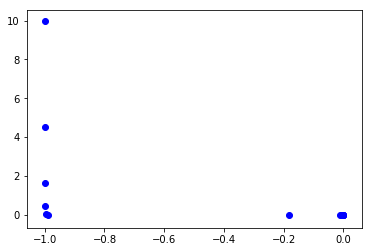

In [23]:
import matplotlib.pylab as plt
%matplotlib inline
eps = 10**-14
UGM(np.array([-1,10]), L, f, g, eps, eps/2, cut=10, beta=4)